Model Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# For data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# For classification model
# 'lr', 'rf', 'lightgbm', 'gbc', 'xgboost'
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

# For deep learning model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC

# For evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

/Users/kb/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
!gdown 1yXC_IuIDyb73qpUTw5LfxYP8ag7N2Kr-

/Users/kb/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yXC_IuIDyb73qpUTw5LfxYP8ag7N2Kr-
To: /Volumes/TOBY/01 | 學校-臺大健管所/04-研究/Predict Healthcare Utilization and Medical Expenditure Among Individuals Aged Population Using Machine Learning Techniques and SHARE Data_20241107/Code/Final/final_cleaned.csv
100%|██████████████████████████████████████| 26.5M/26.5M [00:02<00:00, 10.9MB/s]


In [4]:
!gdown 111qCWGjsz35fNvPPgRSQZQOuV6HGMeEi

/Users/kb/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=111qCWGjsz35fNvPPgRSQZQOuV6HGMeEi
To: /Volumes/TOBY/01 | 學校-臺大健管所/04-研究/Predict Healthcare Utilization and Medical Expenditure Among Individuals Aged Population Using Machine Learning Techniques and SHARE Data_20241107/Code/Final/country_eu.csv
100%|████████████████████████████████████████| 155k/155k [00:00<00:00, 53.0MB/s]


In [5]:
data = pd.read_csv("final_cleaned.csv")
country_data = pd.read_csv("country_eu.csv")

In [6]:
country_data = country_data.rename(columns={'country': 'country_eu'})

In [7]:
data = pd.concat([country_data, data], axis=1)
data

country_eu       mergeid  age  country  gender  edu_lv  marital  \
0              11  AT-000787-01   58        5       0       2        1   
1              11  AT-001492-01   70        5       1       1        1   
2              11  AT-001492-02   71        5       0       1        1   
3              11  AT-001719-01   60        5       0       1        1   
4              11  AT-001881-02   98        5       0       0        1   
...           ...           ...  ...      ...     ...     ...      ...   
51715          14  SK-992332-01   76        5       0       1        1   
51716          14  SK-992332-02   73        5       1       1        1   
51717          14  SK-995042-01   63        5       1       1        1   
51718          14  SK-995042-02   66        5       0       1        1   
51719          14  SK-996004-01   60        5       1       1        3   

       migration  citizen  religion  region  residence_type  network_size  \
0              0        1         0       0               1             7   
1              0        1         1       0               2             4   
2              0        1         1       0               2             4   
3              1        0         1       0               1             4   
4              0        1         1       1               1             3   
...          ...      ...       ...     ...             ...           ...   
51715          0        1         1       1               1             1   
51716          0        1         1       1               1             1   
51717          0        1         1       0               2             4   
51718          0        1         0       0               2             4   
51719          0        1         1       0               1             4   

       integration  closeness  network_satisfaction  children  grandchildren  \
0                4       4.00                    10         0              0   
1                4       4.00                    10         6             13   
2                4       3.25                     9         6             13   
3                4       3.75                     9         6              9   
4                2       4.00                    10         2              5   
...            ...        ...                   ...       ...            ...   
51715            2       3.00                     8         2              4   
51716            2       3.00                     7         2              4   
51717            4       4.00                    10         3              4   
51718            4       4.00                     9         3              4   
51719            2       3.00                     7         3              5   

      look_after_grand        home_own  mortgage  health_self  chronic  \
0       non_applicable               1       0.0            2        0   
1                    1               2       0.0            3        0   
2                    1  non_applicable       0.0            1        1   
3                    1               2       0.0            5        1   
4                    0               4       0.0            3        1   
...                ...             ...       ...          ...      ...   
51715                0               1       0.0            3        0   
51716                0               1       0.0            3        0   
51717                0               1       0.0            5        1   
51718                1               1       0.0            3        0   
51719                0               1       0.0            3        0   

       vision_d  vision_n  hearing  level_of_pain  glasses  hearing_aid  cane  \
0             2         1        2              0        1            3     0   
1             3         3        3              2        1            1     0   
2             3         2        3              2        1            1     0   
3             2    

In [8]:
# Drop the target variables of other papers
used_data1 = data.copy()
used_data2 = data.copy()
used_data = data.copy()
used_data1 = used_data1.drop(['mergeid','country','citizen','network_size','integration','closeness','network_satisfaction','grandchildren','look_after_grand','vision_d','glasses','walker','buggy','utensils','personal_alarm','bar','raised_toilet','incontinence','depression','pessimism','suicidality','guilt','sleep','interest','irritability','appetite','fatigue','concentration','enjoyment','tearfulness','adls','mobility','uppermo','lowermo','lgmuscle','grossmo','finemo','fall','date_day','memory','imword_recall','deword_recall','serial_7','verbal',
                  'dairy','legeggs','meat','hours_work','personal_care_hour','domestic_task_hour','meal_week','nursing_home_week','receive_help_freq','given_help_freq','activity_help','help_meet_need','long_term','bond_stock_funds','bank_account','value_house','value_business','value_car','oldage_pension','occupational_pension','disability_pension','unemployment_benefits','social_assistance','sickness_benefit','private_pensions','private_transfer','given_gift_250','given_gift_5000','receive_gift_250','receive_gift_5000','rent_expenditure','hh_cosumption','unafford_food',
                  'hh_real_asset','hh_gross_asset','hh_net_asset','hh_net_worth','employment','course','club','organization','read','games','card','companionship','leftout','isolated','lonely','extraversion','aggreeableness','conscientiousness','neuroticism','openess','forgo_cost','forgo_available','bmi','bmi_cate','overweight'], axis=1)
used_data2 = used_data2.drop(['mergeid','country','citizen','network_size','integration','closeness','network_satisfaction','grandchildren','look_after_grand','vision_d','glasses','walker','buggy','utensils','personal_alarm','bar','raised_toilet','incontinence','depression','pessimism','suicidality','guilt','sleep','interest','irritability','appetite','fatigue','concentration','enjoyment','tearfulness','adls','mobility','uppermo','lowermo','lgmuscle','grossmo','finemo','fall','date_day','memory','imword_recall','deword_recall','serial_7','verbal',
                  'dairy','legeggs','meat','hours_work','personal_care_hour','domestic_task_hour','meal_week','nursing_home_week','receive_help_freq','given_help_freq','activity_help','help_meet_need','long_term','bond_stock_funds','bank_account','value_house','value_business','value_car','oldage_pension','occupational_pension','disability_pension','unemployment_benefits','social_assistance','sickness_benefit','private_pensions','private_transfer','given_gift_250','given_gift_5000','receive_gift_250','receive_gift_5000','rent_expenditure','hh_cosumption','unafford_food',
                  'hh_real_asset','hh_gross_asset','hh_net_asset','hh_net_worth','employment','course','club','organization','read','games','card','companionship','leftout','isolated','lonely','extraversion','aggreeableness','conscientiousness','neuroticism','openess','forgo_cost','forgo_available','bmi','bmi_cate','overweight'], axis=1)

In [9]:
# 假設 DataFrame 為 used_data
# used_data = used_data.loc[used_data['mammogram'] != 'non_applicable']
used_data1 = used_data1[used_data1['mammogram'] != 'non_applicable']
used_data1

country_eu  age  gender  edu_lv  marital  migration  religion  region  \
1              11   70       1       1        1          0         1       0   
5              11   81       1       1        4          0         1       1   
8              11   87       1       1        1          0         1       0   
11             11   56       1       1        1          0         1       1   
12             11   90       1       0        4          0         1       1   
...           ...  ...     ...     ...      ...        ...       ...     ...   
51713          14   65       1       1        1          0         1       0   
51714          14   59       1       1        4          0         1       0   
51716          14   73       1       1        1          0         1       1   
51717          14   63       1       1        1          0         1       0   
51719          14   60       1       1        3          0         1       0   

       residence_type  children home_own  mortgage  health_self  chronic  \
1                   2         6        2       0.0            3        0   
5                   1         1        4       0.0            4        0   
8                   1         3        1   17000.0            3        0   
11                  1         2        1       0.0            2        1   
12                  1         4        4       0.0            4        1   
...               ...       ...      ...       ...          ...      ...   
51713               2         3        1       0.0            1        0   
51714               2         2        1       0.0            3        0   
51716               1         2        1       0.0            3        0   
51717               2         3        1       0.0            5        1   
51719               1         3        1       0.0            3        0   

       vision_n  hearing  level_of_pain  hearing_aid  cane  manual_wheelchair  \
1             3        3              2            1     0                  0   
5             2        3              2            3     1                  0   
8             4        2              2            2     0                  0   
11            2        2              0            1     0                  0   
12            5        4              0            3     0                  0   
...         ...      ...            ...          ...   ...                ...   
51713         1        1              0            1     0                  0   
51714         3        3              2            1     0                  0   
51716         3        3              0            1     0                  0   
51717         5        1              0            1     1                  0   
51719         3        2              1            1     0                  0   

       eletric_wheelchair  heart  hypertension  cholesterol  stroke  diabetes  \
1                       0      0             1            1       0         0   
5                       0      0             1            0       0         0   
8                       0      0             0            0       0         0   
11                      0      0             0            0       0         0   
12                      0      1             1            0       0         0   
...                   ...    ...           ...          ...     ...       ...   
51713                   0      0             0            0       0         0   
51714                   0      0             1            1       0         0   
51716                   0      0             1            0       0         0   
51717                   0      1             0            0       0         0   
51719                   0      0             1            1       0         0   

       lung_disease  cancer  ulcer  parkinsons  cataracts  fracture  dementia  \
1                 0       0      0           0          1         0         0   
5                 1      

In [10]:
# definition of mammogram, colon

# mammogram
used_data1 = used_data1[
    (used_data1['gender'] == 1) &  
    (used_data1['age'] >= 45) &   
    (used_data1['age'] <= 74)]

#used_data1['mammogram'] = used_data1.apply(
#    lambda row: row['mammogram'] if (row['gender'] == 1 and 45 <= row['age'] <= 74) else 1,
#    axis=1)
#used_data1

# colon
# used_data2['colon'] = (
#      (used_data2['age'] >= 50) &  
#      (used_data2['age'] <= 60)   
#  ).astype(int)  # 將布林值轉為整數 (1 或 0)
# used_data2 = used_data2[(used_data2['age'] >= 50) & (used_data2['age'] <= 60)]
# used_data2
# 將 colon 欄位的值在年齡 50-60 內保持原值，其餘設為 1
used_data2['colon'] = used_data2.apply(
    lambda row: row['colon'] if 50 <= row['age'] <= 60 else 1,
    axis=1
)

# 如果仍需要篩選出年齡在 50-60 範圍內的行
#used_data2 = used_data2[(used_data2['age'] >= 50) & (used_data2['age'] <= 60)]

#used_data2

In [11]:
#derived_preventive_care (exclude 'mammogram')

vaccination = used_data1['vaccination']
eye_exam = used_data1['eye_exam']
colon = used_data1['colon']
dental = used_data1['dental']

# 定義條件：只要有一種檢查未做（值為0）就是 unmet (1)，全部都做了才是 met (0)
conditions = [
    (vaccination == 0) | (eye_exam == 0) | (colon == 0) | (dental == 0),  # 未完成的情況
    (vaccination == 1) & (eye_exam == 1) & (colon == 1) & (dental == 1)  # 全部完成的情況
]
choices = [1, 0]  # 1 表示 unmet，0 表示 met

# 根據條件新增或更新 'preventive_care' 欄位
used_data1['preventive_care'] = np.select(conditions, choices, default=np.nan)

In [12]:
# derived_income
used_data1['income'] = used_data1['income_work']+ used_data1['income_self_work'] + used_data1['income_house']
# 刪除原本的變數
used_data1.drop(columns=['income_work', 'income_self_work', 'income_house'], inplace=True)

In [13]:
#derived_wheelchair

manual_wheelchair = used_data1['manual_wheelchair']
eletric_wheelchair = used_data1['eletric_wheelchair']
conditions = [
    (manual_wheelchair == 1) | (eletric_wheelchair == 1),
    (manual_wheelchair == 0) & (eletric_wheelchair == 0)
]
choices = [1, 0]

#wheelchair: 若至少有一個條件符合設為1，完全不符合設為0
used_data1['wheelchair'] = np.select(conditions, choices, default=np.nan)
# 刪除原本的變數
used_data1.drop(columns=['manual_wheelchair', 'eletric_wheelchair'], inplace=True)

In [14]:
used_data2

country_eu  age  gender  edu_lv  marital  migration  religion  region  \
0              11   58       0       2        1          0         0       0   
1              11   70       1       1        1          0         1       0   
2              11   71       0       1        1          0         1       0   
3              11   60       0       1        1          1         1       0   
4              11   98       0       0        1          0         1       1   
...           ...  ...     ...     ...      ...        ...       ...     ...   
51715          14   76       0       1        1          0         1       1   
51716          14   73       1       1        1          0         1       1   
51717          14   63       1       1        1          0         1       0   
51718          14   66       0       1        1          0         0       0   
51719          14   60       1       1        3          0         1       0   

       residence_type  children        home_own  mortgage  health_self  \
0                   1         0               1       0.0            2   
1                   2         6               2       0.0            3   
2                   2         6  non_applicable       0.0            1   
3                   1         6               2       0.0            5   
4                   1         2               4       0.0            3   
...               ...       ...             ...       ...          ...   
51715               1         2               1       0.0            3   
51716               1         2               1       0.0            3   
51717               2         3               1       0.0            5   
51718               2         3               1       0.0            3   
51719               1         3               1       0.0            3   

       chronic  vision_n  hearing  level_of_pain  hearing_aid  cane  \
0            0         1        2              0            3     0   
1            0         3        3              2            1     0   
2            1         2        3              2            1     0   
3            1         2        2              3            1     0   
4            1         3        4              0            1     1   
...        ...       ...      ...            ...          ...   ...   
51715        0         3        3              0            1     0   
51716        0         3        3              0            1     0   
51717        1         5        1              0            1     1   
51718        0         4        2              0            1     0   
51719        0         3        2              1            1     0   

       manual_wheelchair  eletric_wheelchair  heart  hypertension  \
0                      0                   0      0             0   
1                      0                   0      0             1   
2                      0                   0      0             1   
3                      0                   0      1             0   
4                      0                   0      0             1   
...                  ...                 ...    ...           ...   
51715                  0                   0      0             1   
51716                  0                   0      0             1   
51717                  0                   0      1             0   
51718                  0                   0      0             1   
51719                  0                   0      0             1   

       cholesterol  stroke  diabetes  lung_disease  cancer  ulcer  parkinsons  \
0                0       0         0             1       0      0           0   
1                1       0         0             0       0      0           0   
2                1       0         0             0       0      0           0   
3                0       1         0             0       0      0           0   
4                1       0         1             0       0      0     

In [15]:
# Drop the target variables of other papers
target_vars = ['preventive_care', 'vaccination', 'eye_exam', 'mammogram', 'colon', 'dental']
######################################
target_var = 'mammogram'
######################################
other_target_vars = [var for var in target_vars if var != target_var]
used_data1 = used_data1.drop(other_target_vars, axis=1)
used_data1.shape

(20828, 67)

In [16]:
binary_categorical_candidates = [col for col in used_data1.columns
                                 if set(used_data1[col].dropna().unique()) == {1, 2}  # 必須同時包含 1 和 2
                                 and used_data1[col].dtype in ['int64', 'object']]  # 限制在整數或文字類型

In [17]:
binary_categorical_candidates

[]

In [18]:
for col in binary_categorical_candidates:
    used_data1[col] = used_data1[col].replace({1: 0, 2: 1})

In [19]:
# 找出唯一值數量超過 2，但小於 30 的整數或物件型變數
categorical_candidates = [col for col in used_data1.columns
                          if used_data1[col].dtype in ['int64', 'object']  # 限制在整數或文字類型
                          and used_data1[col].nunique() > 2  # 至少有 3 種不同的值
                          and used_data1[col].nunique() < 30]  # 避免高維類別變數 (可以調整)
excluded_columns = {'satisfied_life', 'inpatient', 'number_social', 'children', 'age'}
categorical_candidates = [col for col in categorical_candidates if col not in excluded_columns]
print("可能是類別變數的欄位:", categorical_candidates)

可能是類別變數的欄位: ['country_eu', 'edu_lv', 'marital', 'residence_type', 'home_own', 'health_self', 'vision_n', 'hearing', 'level_of_pain', 'hearing_aid', 'drinking', 'smoking', 'fritsveg', 'health_literacy', 'satisfied_insurance', 'nursing_home', 'job', 'paidwork', 'other_job']


In [20]:
# 針對類別變數作one-hot encoding
used_data1 = pd.get_dummies(used_data1, columns=categorical_candidates, dtype=int)

In [21]:
used_data1

age  gender  migration  religion  region  children  mortgage  chronic  \
1       70       1          0         1       0         6       0.0        0   
11      56       1          0         1       1         2       0.0        1   
13      57       1          0         1       1         3       0.0        0   
18      70       1          0         1       0         4       0.0        1   
19      67       1          0         1       1         1    3000.0        1   
...    ...     ...        ...       ...     ...       ...       ...      ...   
51713   65       1          0         1       0         3       0.0        0   
51714   59       1          0         1       0         2       0.0        0   
51716   73       1          0         1       1         2       0.0        0   
51717   63       1          0         1       0         3       0.0        1   
51719   60       1          0         1       0         3       0.0        0   

       cane  heart  hypertension  cholesterol  stroke  diabetes  lung_disease  \
1         0      0             1            1       0         0             0   
11        0      0             0            0       0         0             0   
13        0      0             0            0       0         0             0   
18        0      0             1            0       0         0             1   
19        1      0             0            0       0         0             0   
...     ...    ...           ...          ...     ...       ...           ...   
51713     0      0             0            0       0         0             0   
51714     0      0             1            1       0         0             0   
51716     0      0             1            0       0         0             0   
51717     1      1             0            0       0         0             0   
51719     0      0             1            1       0         0             0   

       cancer  ulcer  parkinsons  cataracts  fracture  dementia  psycho  \
1           0      0           0          1         0         0       0   
11          0      0           0          0         0         0       0   
13          0      0           0          0         0         0       0   
18          0      0           0          0         0         0       0   
19          0      0           0          1         0         0       0   
...       ...    ...         ...        ...       ...       ...     ...   
51713       0      0           0          0         0         0       0   
51714       0      0           0          0         0         0       0   
51716       0      0           0          0         0         0       0   
51717       1      0           0          0         0         0       0   
51719       0      0           0          0         0         0       0   

       arthritis  kidney  eurod_categ  limit_activity limit_work  iadls  \
1              0       0            0               0          0      0   
11             0       0            0               1          1      0   
13             0       0            1               0          0      0   
18             1       0            1               1          0      0   
19             1       0            1               1          0      1   
...          ...     ...          ...             ...        ...    ...   
51713          0       0            0               0          0      0   
51714          0       0            1               0          0      0   
51716          0       0            0               0          0      0   
51717          0       0            1               1          1      1   
51719          0       0            0               0          0      0   

       inactivity  outpatient mammogram  inpatient  other_facility  medicine  \
1               0           7         1          0               0         1   
11              0           4         1          0               0         0   
13              0           0  

In [22]:
# Split the data into train and test
X = used_data1.drop(target_var, axis=1)
y = used_data1[target_var]
X = X.astype('float32')
y = y.astype('float32')

In [23]:
#Rename the columns
used_data1 = pd.DataFrame(used_data1, columns=['hh_income', 'edu_lv_0', 'edu_lv_1', 'edu_lv_2', 'marital_1', 'marital_2', 'marital_3', 'marital_4', 'eurod_categ', 'residence_type_1', 'residence_type_2', 'residence_type_3', 'residence_type_4', 'home_own_1', 'home_own_2', 'home_own_3', 'home_own_4', 'health_self_1', 'health_self_2', 'health_self_3', 'health_self_4', 'health_self_5', 'vision_n_1', 'vision_n_2', 'vision_n_3', 'vision_n_4', 'vision_n_5', 
                                               'hearing_aid_1', 'hearing_aid_2', 'hearing_aid_3', 'limit_work_0', 'limit_work_1', 'drinking_1', 'drinking_2', 'drinking_3', 'smoking_1', 'smoking_2', 'smoking_3', 'fritsveg_1', 'fritsveg_2',	'fritsveg_3', 'fritsveg_4', 'fritsveg_5', 'hearing_1', 'hearing_2', 'hearing_3', 'hearing_4', 'hearing_5', 'level_of_pain_0', 'level_of_pain_1', 'level_of_pain_2', 'level_of_pain_3', 
                                               'health_literacy_1', 'health_literacy_2', 'health_literacy_3', 'health_literacy_4', 'health_literacy_5', 'satisfied_insurance_1', 'satisfied_insurance_2', 'satisfied_insurance_3', 'satisfied_insurance_4',	'nursing_home_0', 'nursing_home_1',	'nursing_home_2', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'paidwork_0', 'paidwork_1', 'other_job_0', 'other_job_1'])

# Rename specific columns
used_data1 = used_data1.rename(columns={'hh_income': 'household income', 'edu_lv_0': 'lowe education', 'edu_lv_1': 'medium education', 'edu_lv_2': 'high education', 'eurod_categ': 'eurod12', 'marital_1': 'married',	'marital_2': 'never married', 'marital_3': 'divorced', 'marital_4': 'widowed', 'residence_type_1': 'family house', 'residence_type_2': 'building', 'residence_type_3': 'residential home', 'residence_type_4': 'nursing home', 'home_own_1': 'owns home', 'home_own_2': 'rents home', 'home_own_3': 'social or public housing', 'home_own_4': 'other residential arrangements', 'health_self_1': 'self-report health: excellent', 'health_self_2': 'self-report health: very good', 'health_self_3': 'self-report health: good', 'health_self_4': 'self-report health: fair', 'health_self_5': 'self-report health: poor', 'vision_n_1': 'near vision: excellent', 'vision_n_2': 'near vision: very good', 'vision_n_3': 'near vision: good', 'vision_n_4': 'near vision: fair', 'vision_n_5': 'near vision: poor', 
                                        'hearing_aid_1': 'dont_have hearing aid', 'hearing_aid_2': 'have hearing aid, but dont wear', 'hearing_aid_3': 'have, and wear hearing aid', 'limit_work_0': 'not limited work', 'limit_work_1': 'limited work', 'drinking_1': 'nondrinkers', 'drinking_2': 'usual-drinkers', 'drinking_3': 'frequent-drinkers', 'smoking_1': 'non smoker', 'smoking_2': 'ex- smoker', 'smoking_3': 'current smoker', 'fritsveg_1': 'fruitveg_everyday', 'fritsveg_2': 'fruitveg_3-6 times a week',	'fritsveg_3': 'fruitveg_twice a week', 'fritsveg_4': 'fruitveg_once a week', 'fritsveg_5': 'fruitveg_less than once a week', 'hearing_1': 'Excellent hearing', 'hearing_2': 'Very good hearing', 'hearing_3': 'Good Hearing', 'hearing_4': 'Fair hearing', 'hearing_5': 'Poor hearing', 'level_of_pain_0': 'No pain', 'level_of_pain_1': 'Mild pain', 'level_of_pain_2': 'Moderate pain', 'level_of_pain_3': 'Severe pain', 'health_literacy_1': 'Excellent health literacy', 'health_literacy_2': 'Very good health literacy', 'health_literacy_3': 'Good health literacy', 'health_literacy_4': 'Fair health literacy', 'health_literacy_5': 'Poor health literacy',
                                        'satisfied_insurance_1': 'very satisfied with insurance', 'satisfied_insurance_2': 'somewhat satisfied with insurance', 'satisfied_insurance_3': 'somewhat dissatisfied with insurance', 'satisfied_insurance_4': 'very dissatisfied with insurance', 'nursing_home_0': 'Nursing home_termporarily', 'nursing_home_1': 'Nursing home_permanently',	'nursing_home_2': 'Not live nursing home', 'job_1': 'Retired', 'job_2': 'Employed/ Self-employed', 'job_3': 'Unemployed', 'job_4': 'Permanently sick or disabled cant work', 'job_5': 'Homemaker', 'job_6': 'Other work status', 'paidwork_0': 'No paidwork', 'paidwork_1': 'paid work', 'other_job_0': 'no other job', 'other_job_1': 'other job'})

In [24]:
# 定義模型
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, force_row_wise=True, verbose=-1)
}

Feature Importance

In [25]:
country_groups = {
    'Overall': slice(None),
    'Low income': X['economic_status'] == 0,
    'High income': X['economic_status'] == 1,
    'Low education': X['edu_lv_0'] == 1,
    'Medium education': X['edu_lv_1'] == 1,
    'High education': X['edu_lv_2'] == 1,
    'Croatia': X['country_eu_47'] == 1,
    'Belgium': X['country_eu_23'] == 1,
    'Estonia': X['country_eu_35'] == 1,
    'Germany': X['country_eu_12'] == 1,
    'Italy': X['country_eu_16'] == 1,
    'Australia': X['country_eu_11'] == 1,
    'Czech Republic': X['country_eu_28'] == 1,
    'Greece': X['country_eu_19'] == 1,
    'France': X['country_eu_17'] == 1,
    'Denmark': X['country_eu_18'] == 1,
    'Spain': X['country_eu_15'] == 1,
    'Switzerland': X['country_eu_20'] == 1,
    'Hungary': X['country_eu_32'] == 1,
    'Finland': X['country_eu_55'] == 1,
    'Latvia': X['country_eu_57'] == 1,
    'Lithuania': X['country_eu_48'] == 1,
}

Processing Overall...
Training Random Forest for Overall...
Feature importance table saved as: mammogram_feature_importance_Overall_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Overall_Random Forest.png


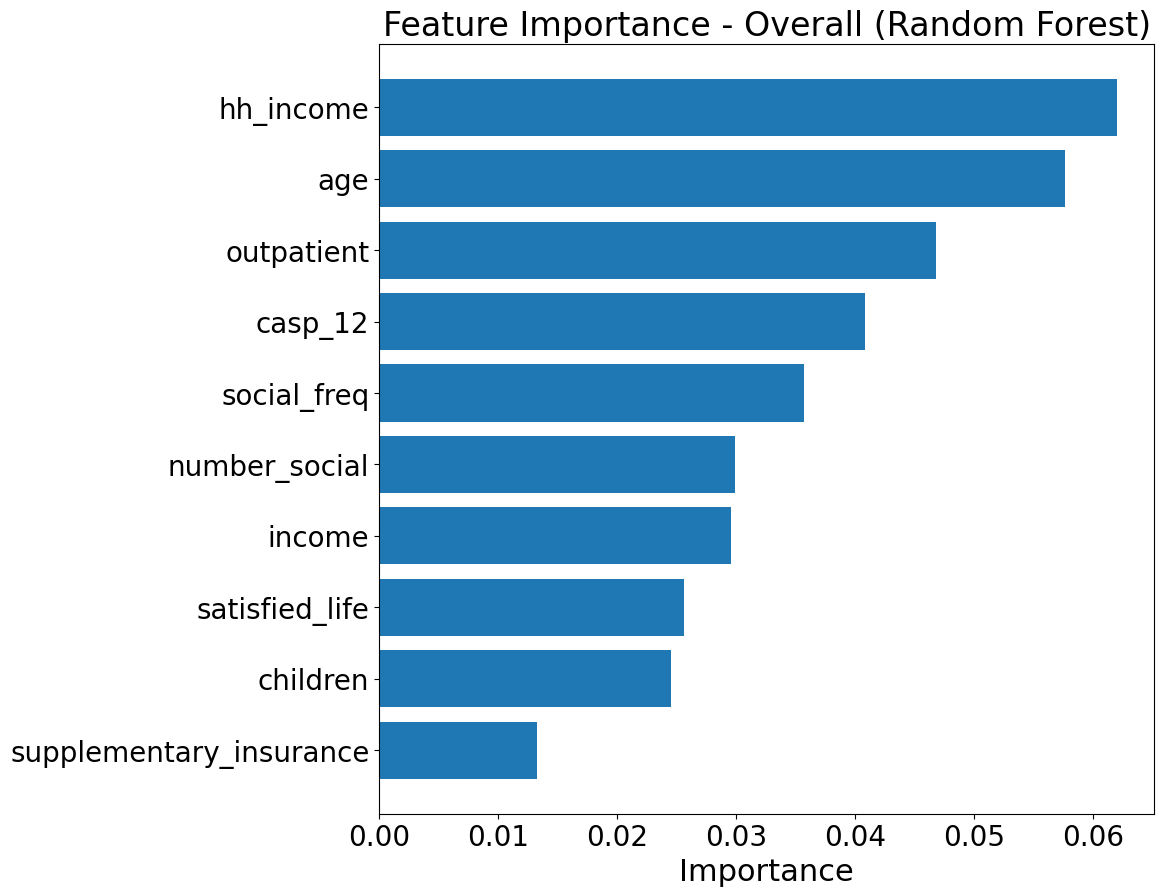

Training XGBoost for Overall...
Feature importance table saved as: mammogram_feature_importance_Overall_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Overall_XGBoost.png


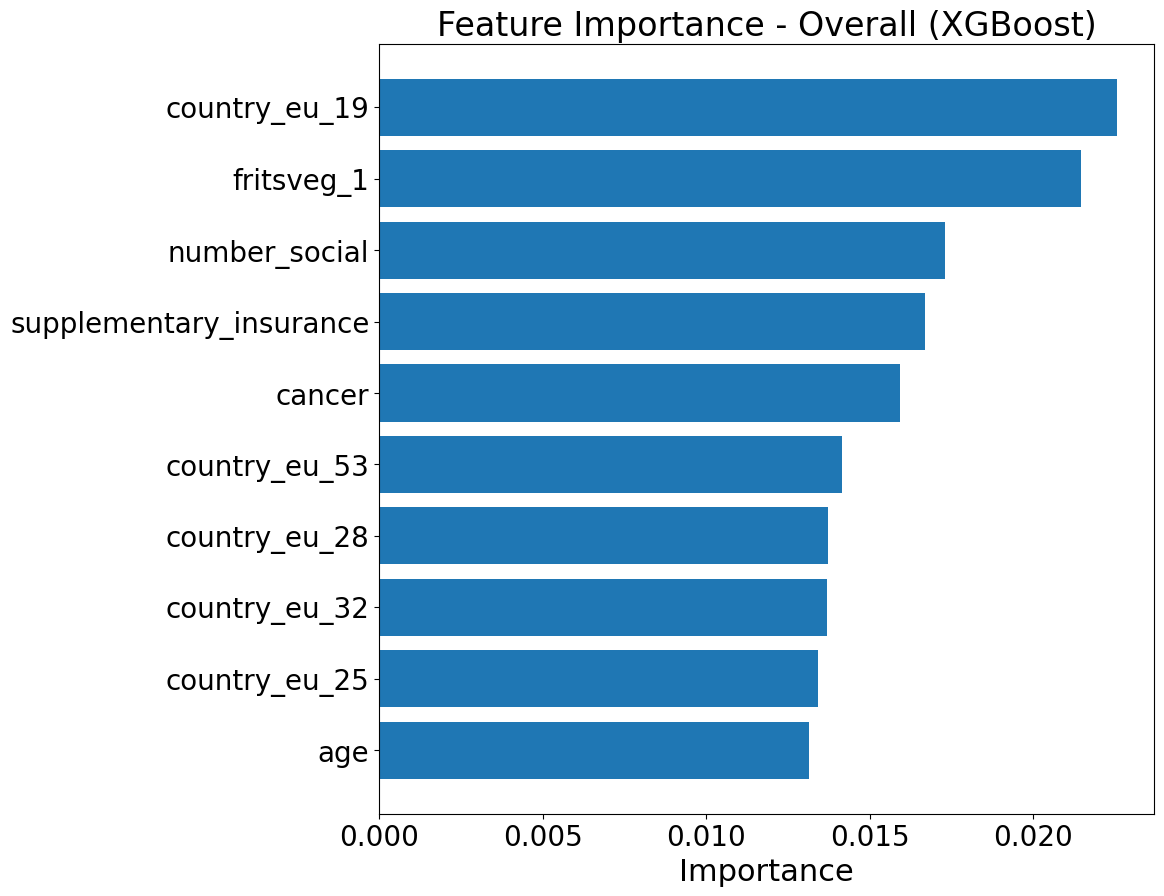

Training Gradient Boosting for Overall...
Feature importance table saved as: mammogram_feature_importance_Overall_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Overall_Gradient Boosting.png


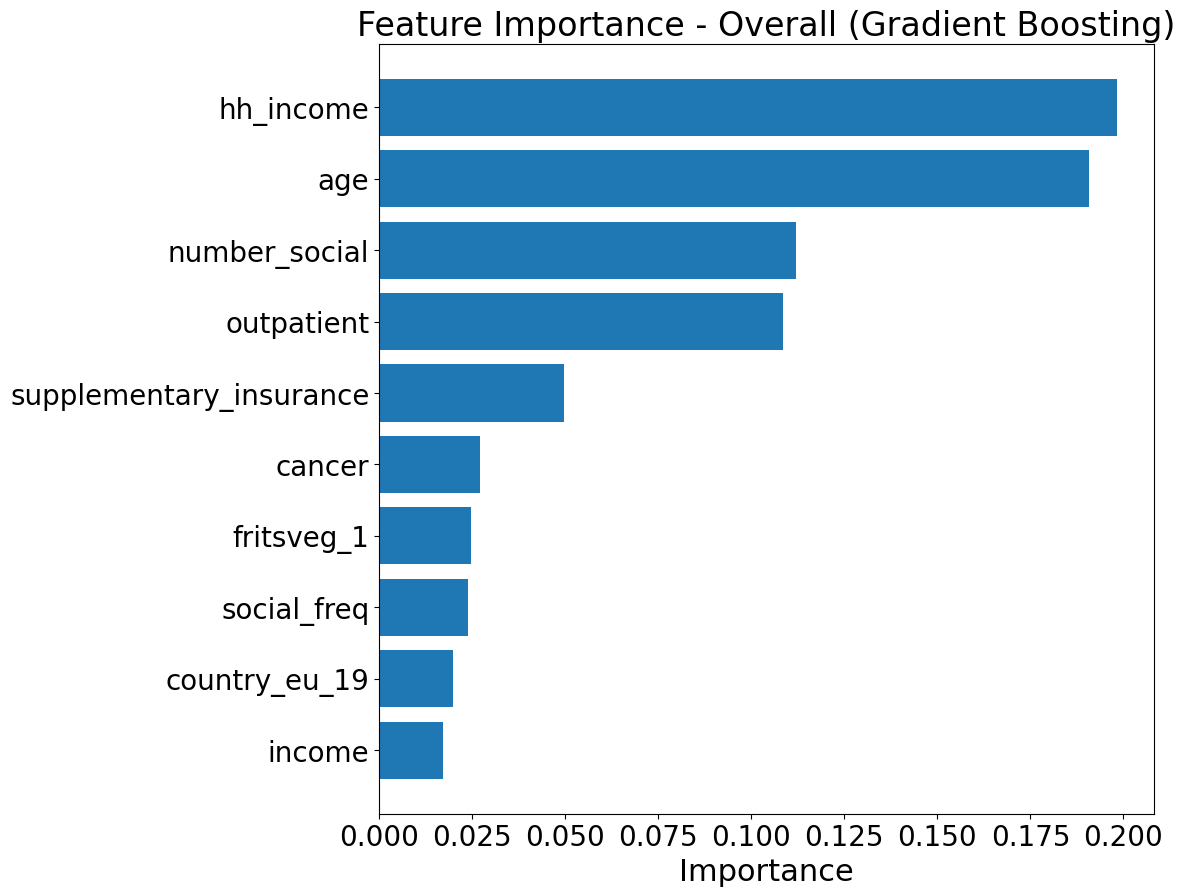

Training LightGBM for Overall...
Feature importance table saved as: mammogram_feature_importance_Overall_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Overall_LightGBM.png


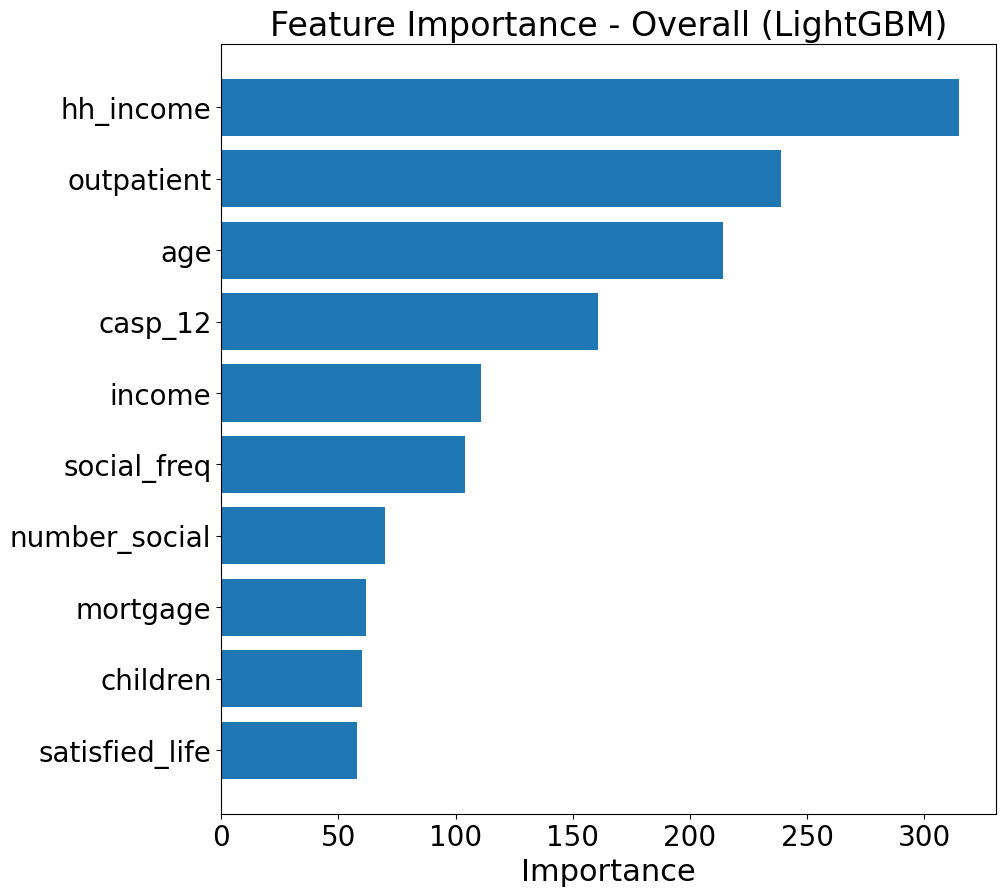

Processing Low income...
Training Random Forest for Low income...
Feature importance table saved as: mammogram_feature_importance_Low income_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Low income_Random Forest.png


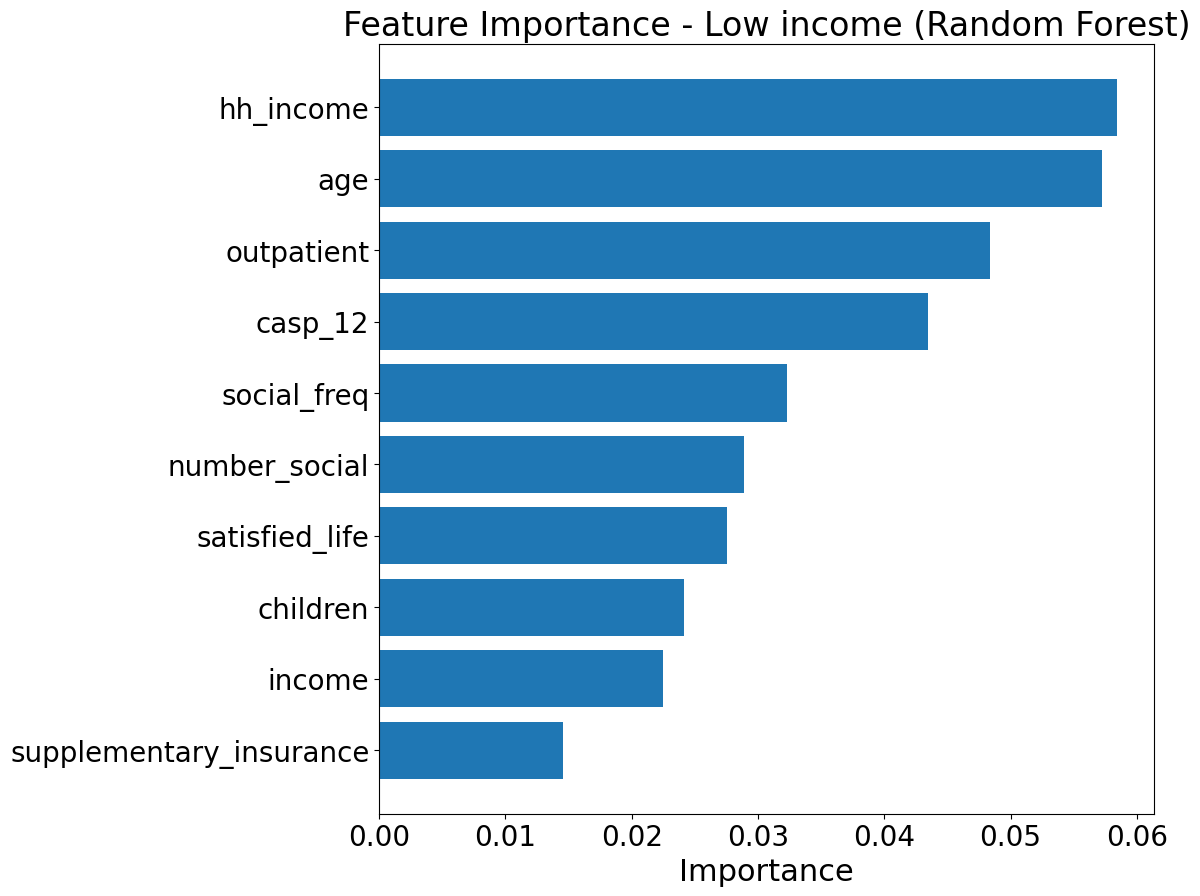

Training XGBoost for Low income...
Feature importance table saved as: mammogram_feature_importance_Low income_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Low income_XGBoost.png


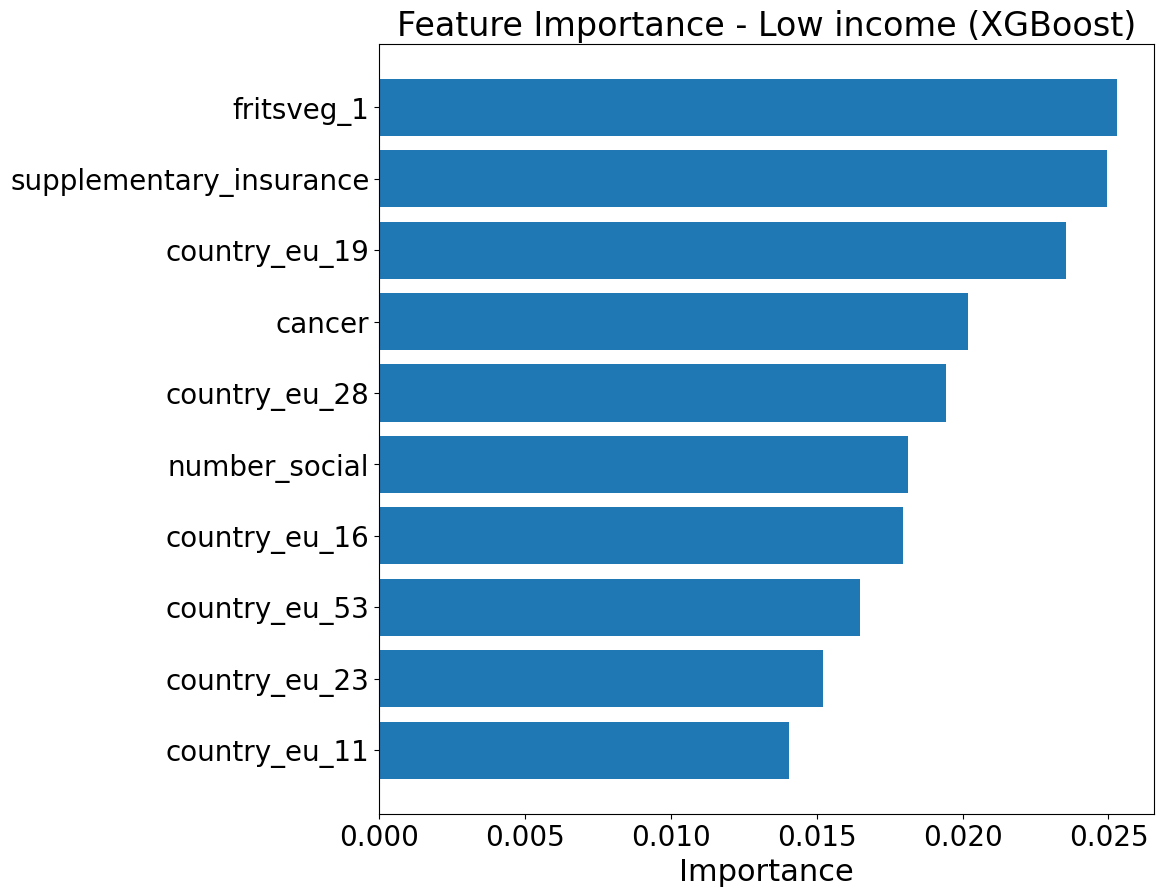

Training Gradient Boosting for Low income...
Feature importance table saved as: mammogram_feature_importance_Low income_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Low income_Gradient Boosting.png


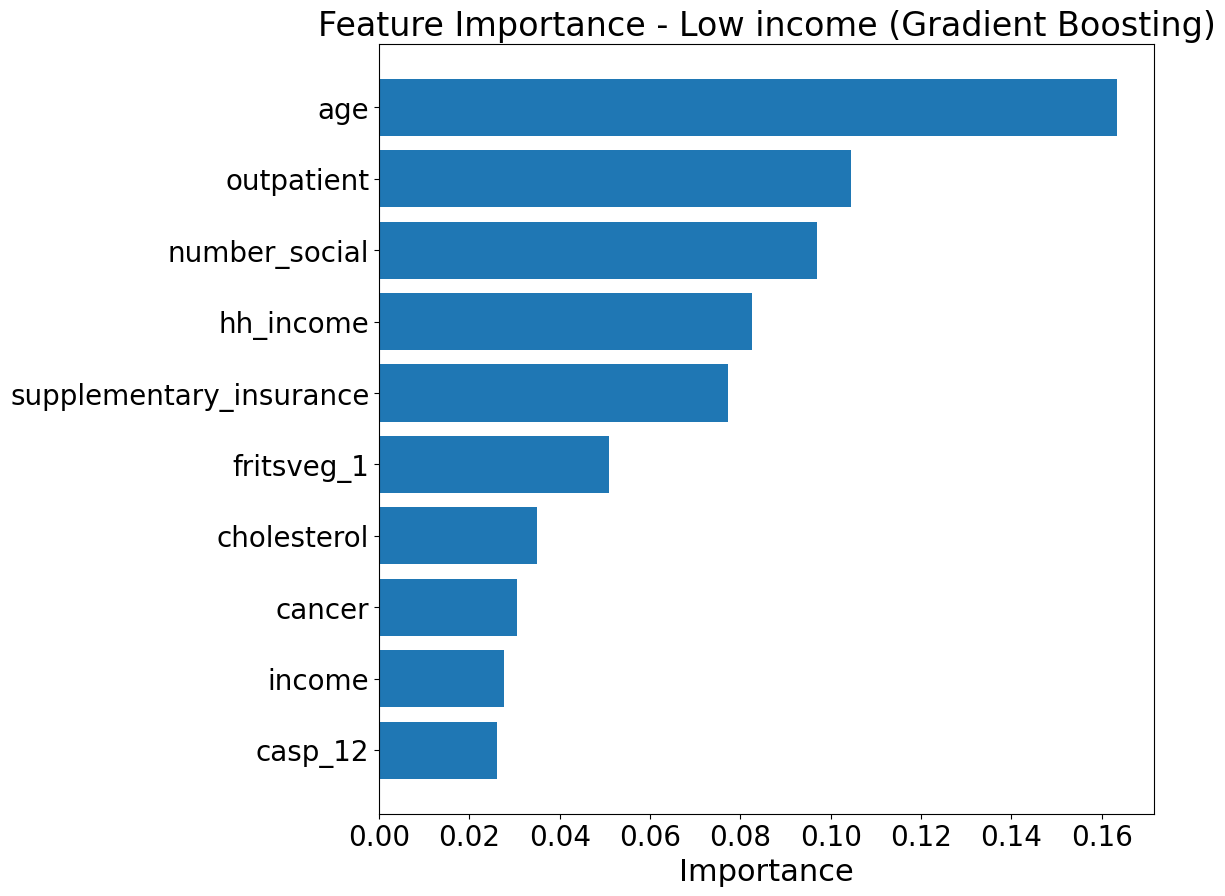

Training LightGBM for Low income...
Feature importance table saved as: mammogram_feature_importance_Low income_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Low income_LightGBM.png


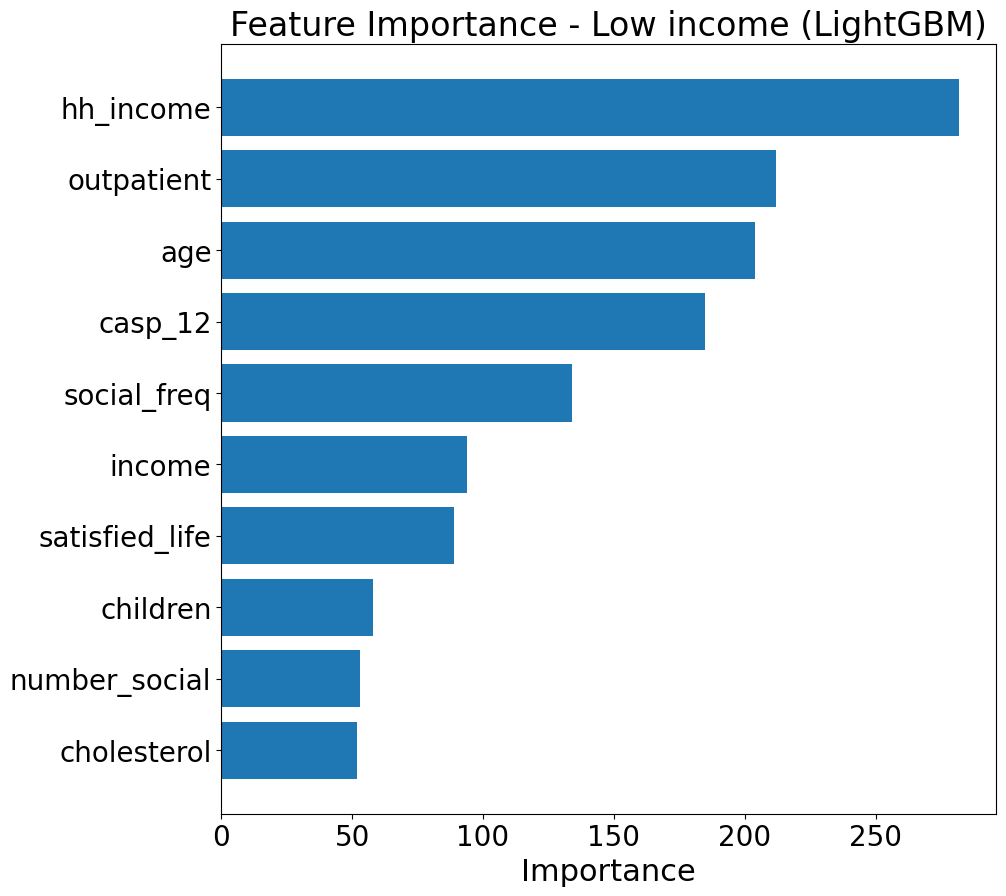

Processing High income...
Training Random Forest for High income...
Feature importance table saved as: mammogram_feature_importance_High income_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_High income_Random Forest.png


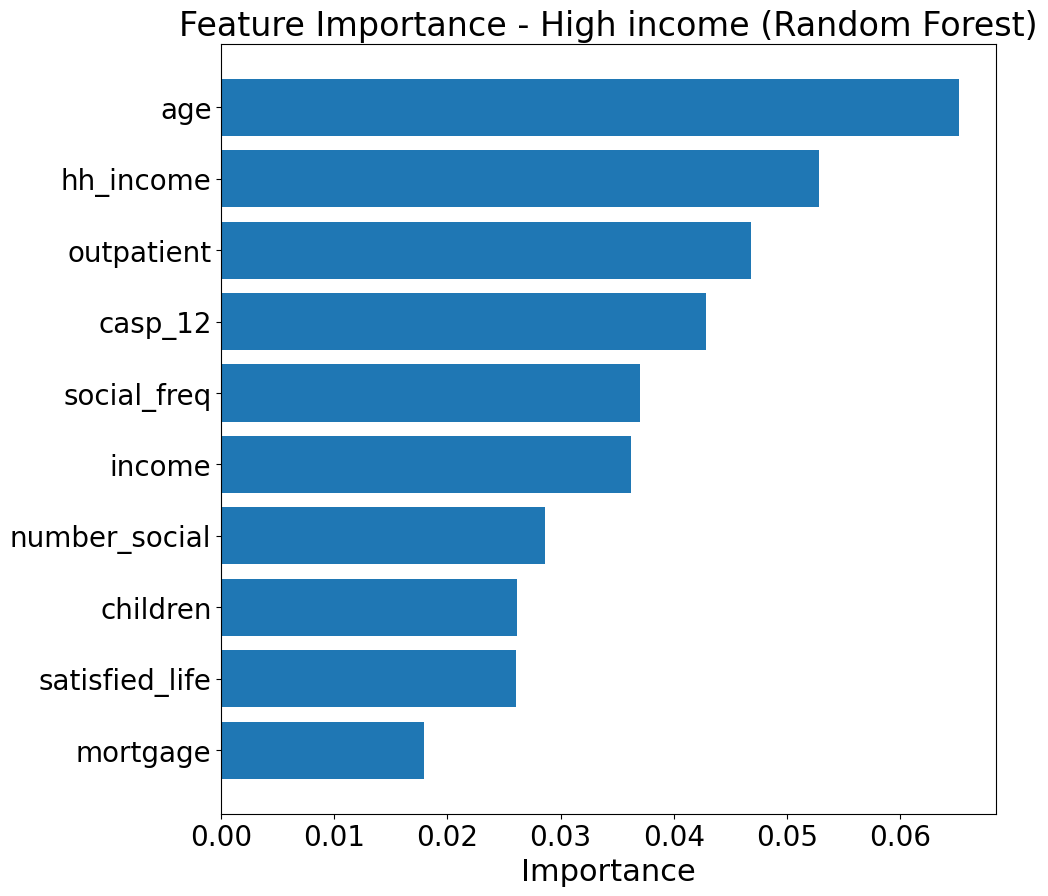

Training XGBoost for High income...
Feature importance table saved as: mammogram_feature_importance_High income_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_High income_XGBoost.png


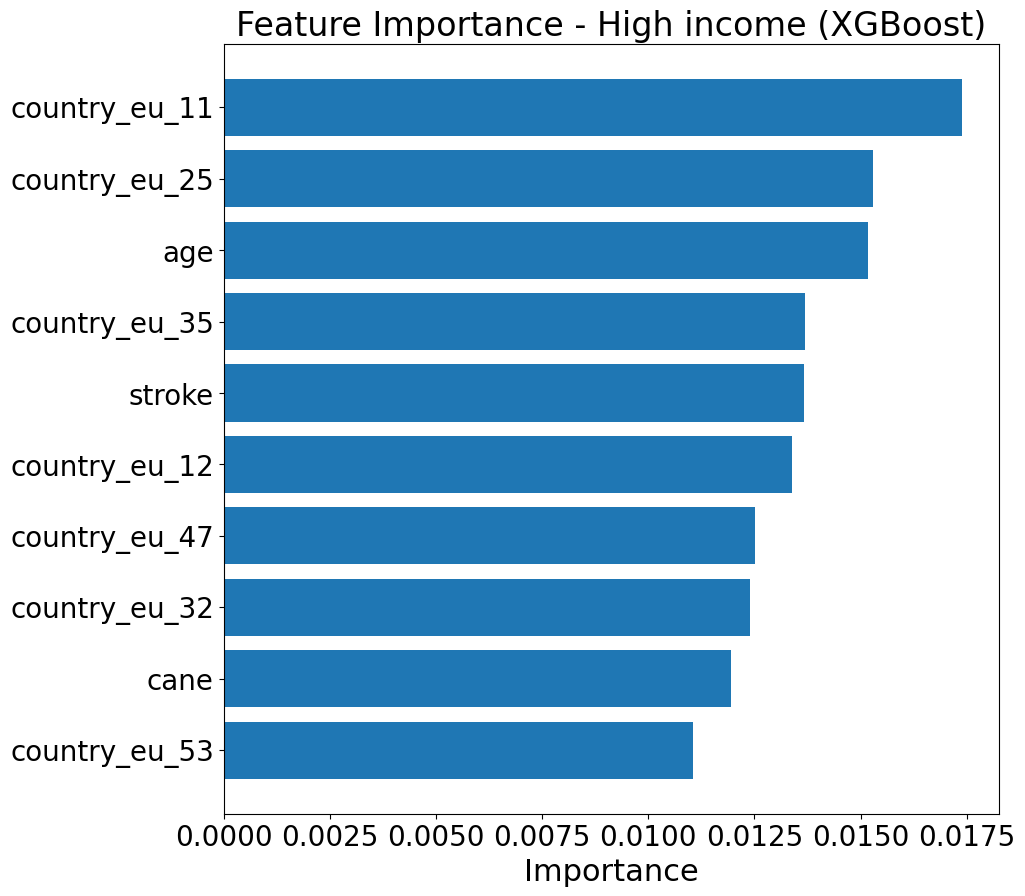

Training Gradient Boosting for High income...
Feature importance table saved as: mammogram_feature_importance_High income_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_High income_Gradient Boosting.png


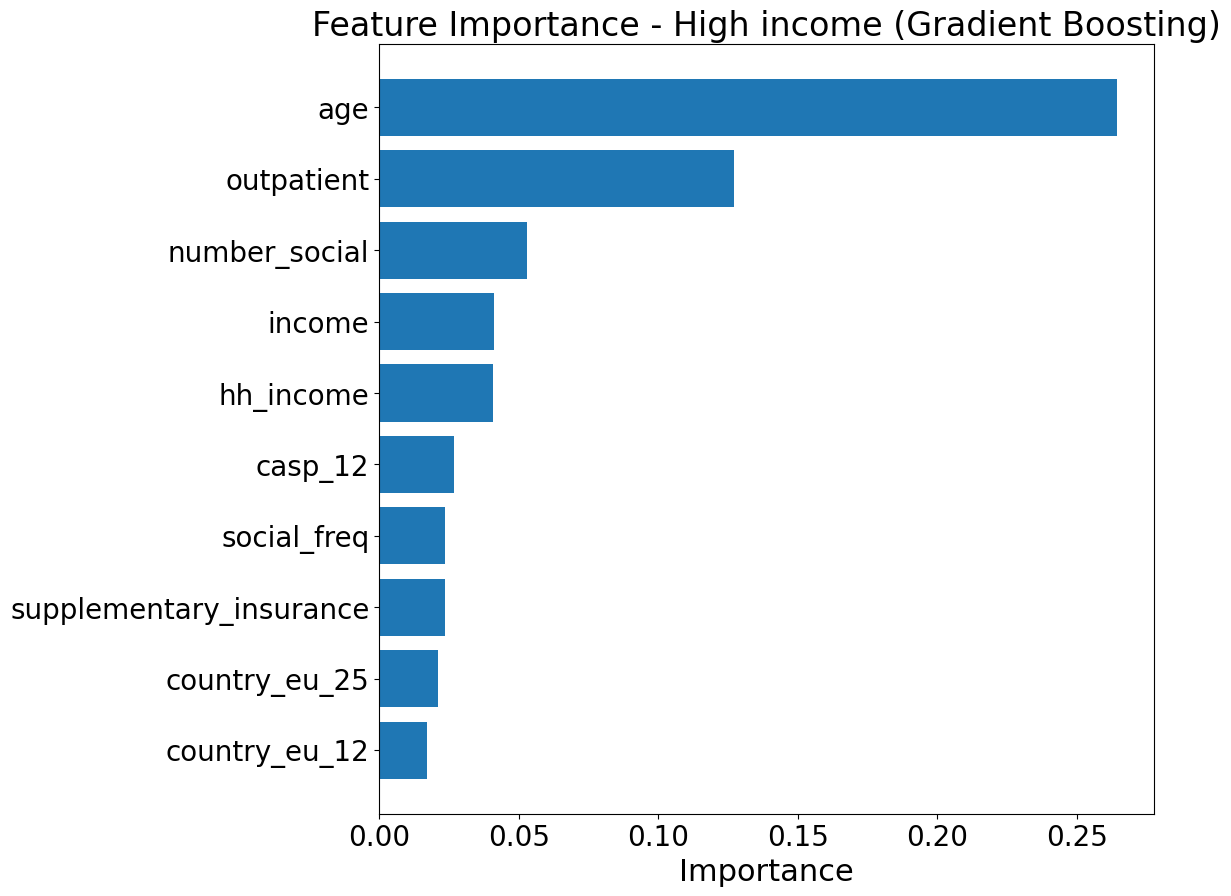

Training LightGBM for High income...
Feature importance table saved as: mammogram_feature_importance_High income_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_High income_LightGBM.png


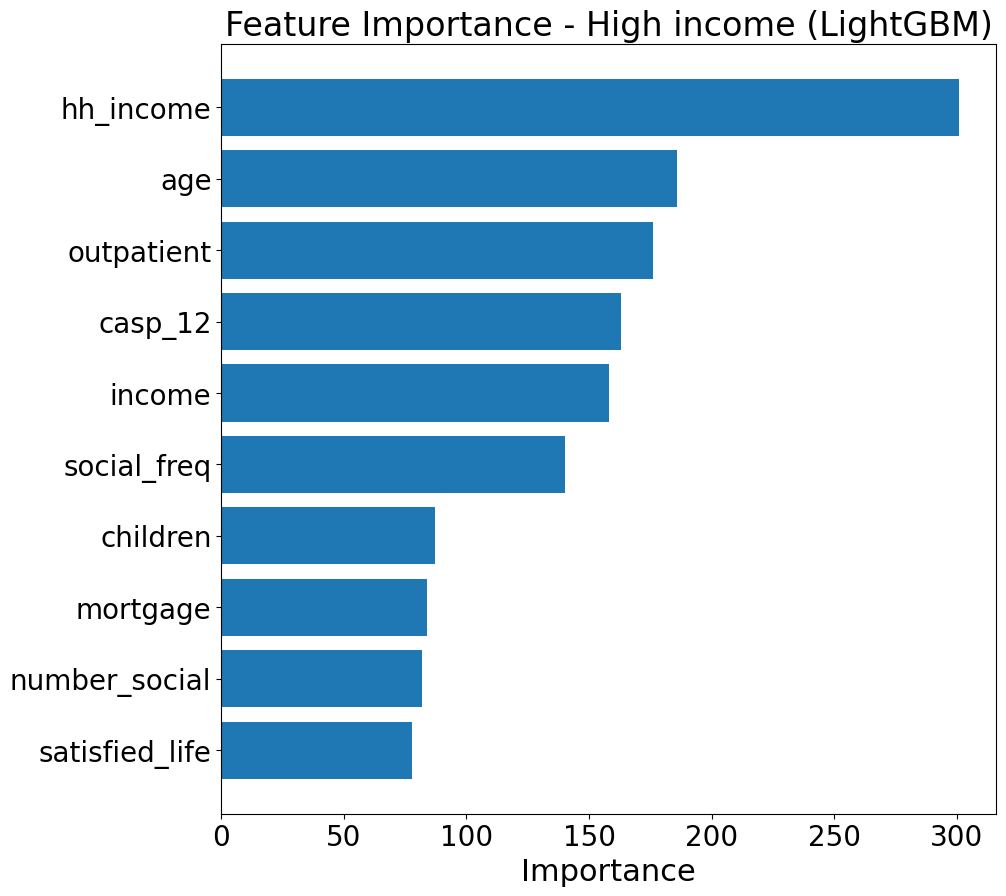

Processing Low education...
Training Random Forest for Low education...
Feature importance table saved as: mammogram_feature_importance_Low education_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Low education_Random Forest.png


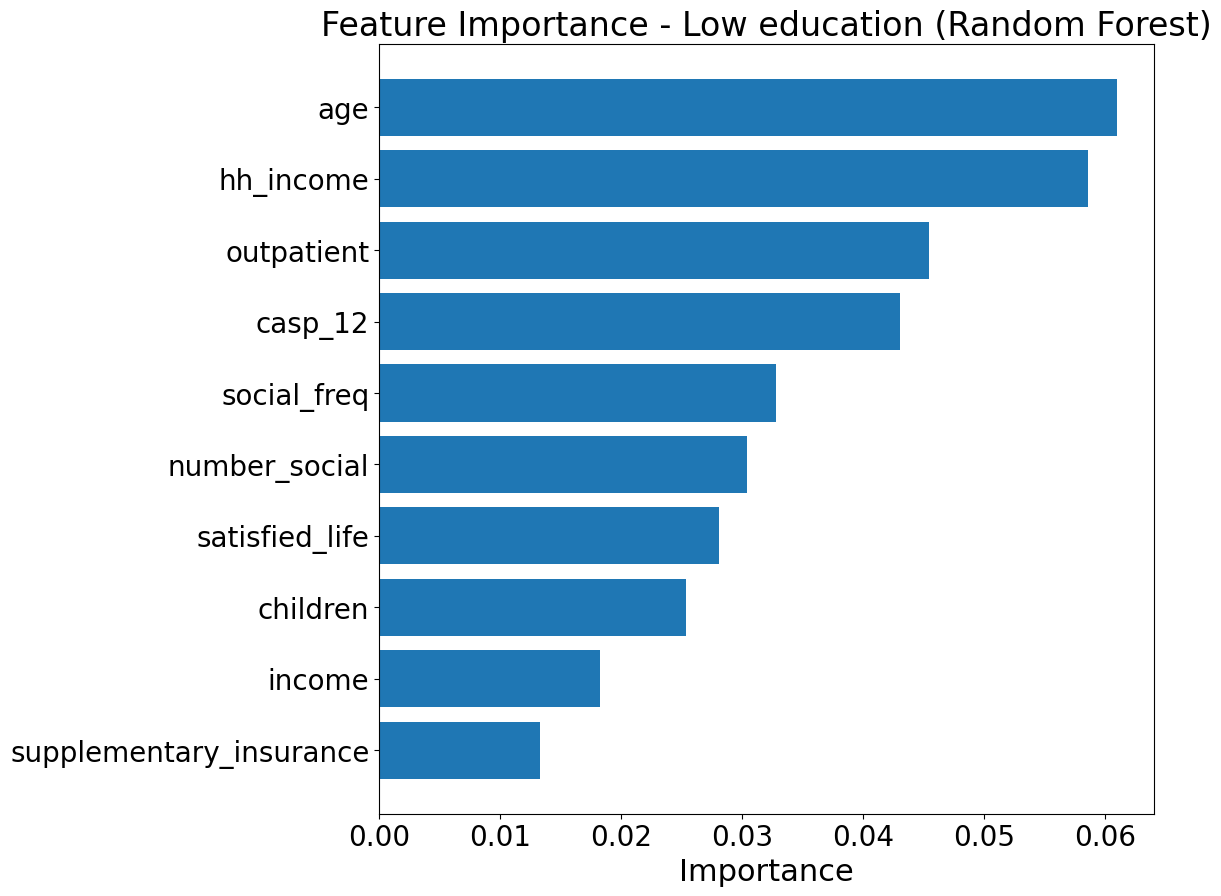

Training XGBoost for Low education...
Feature importance table saved as: mammogram_feature_importance_Low education_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Low education_XGBoost.png


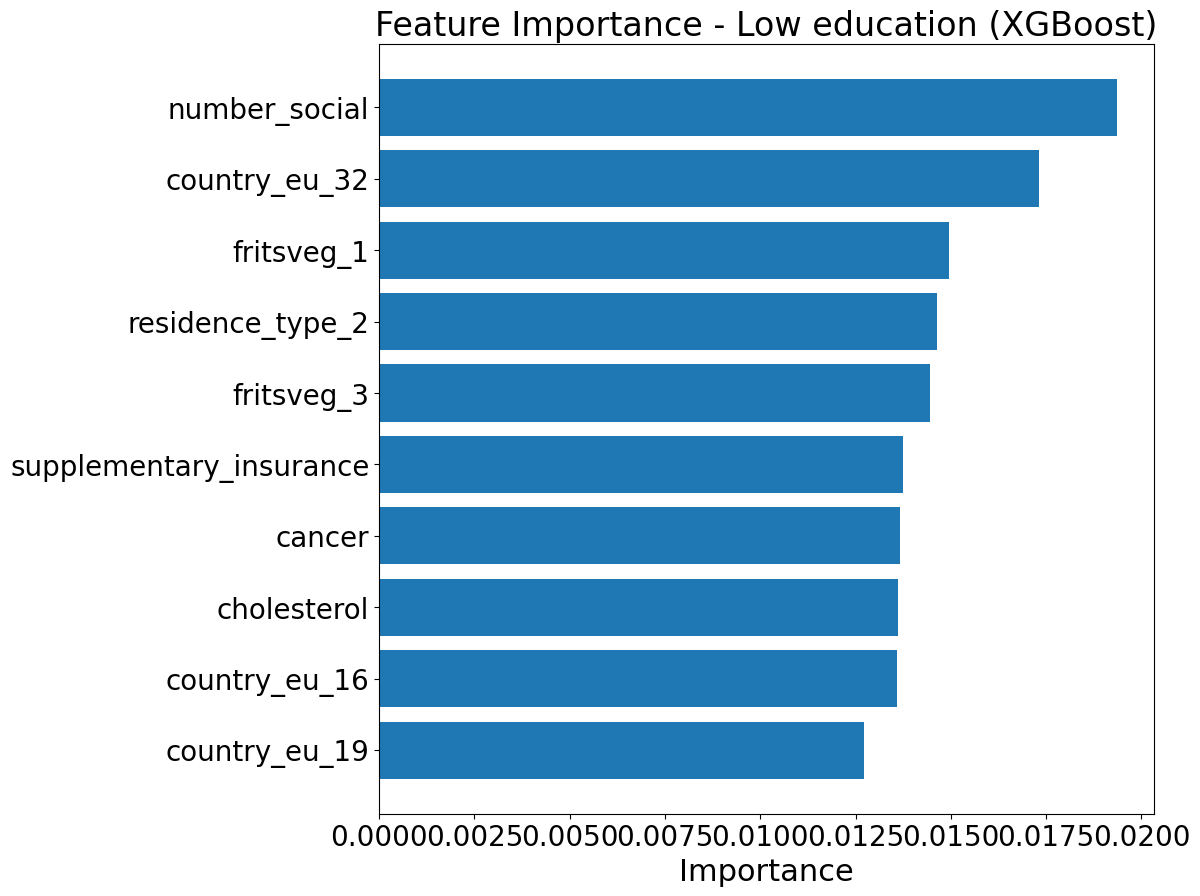

Training Gradient Boosting for Low education...
Feature importance table saved as: mammogram_feature_importance_Low education_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Low education_Gradient Boosting.png


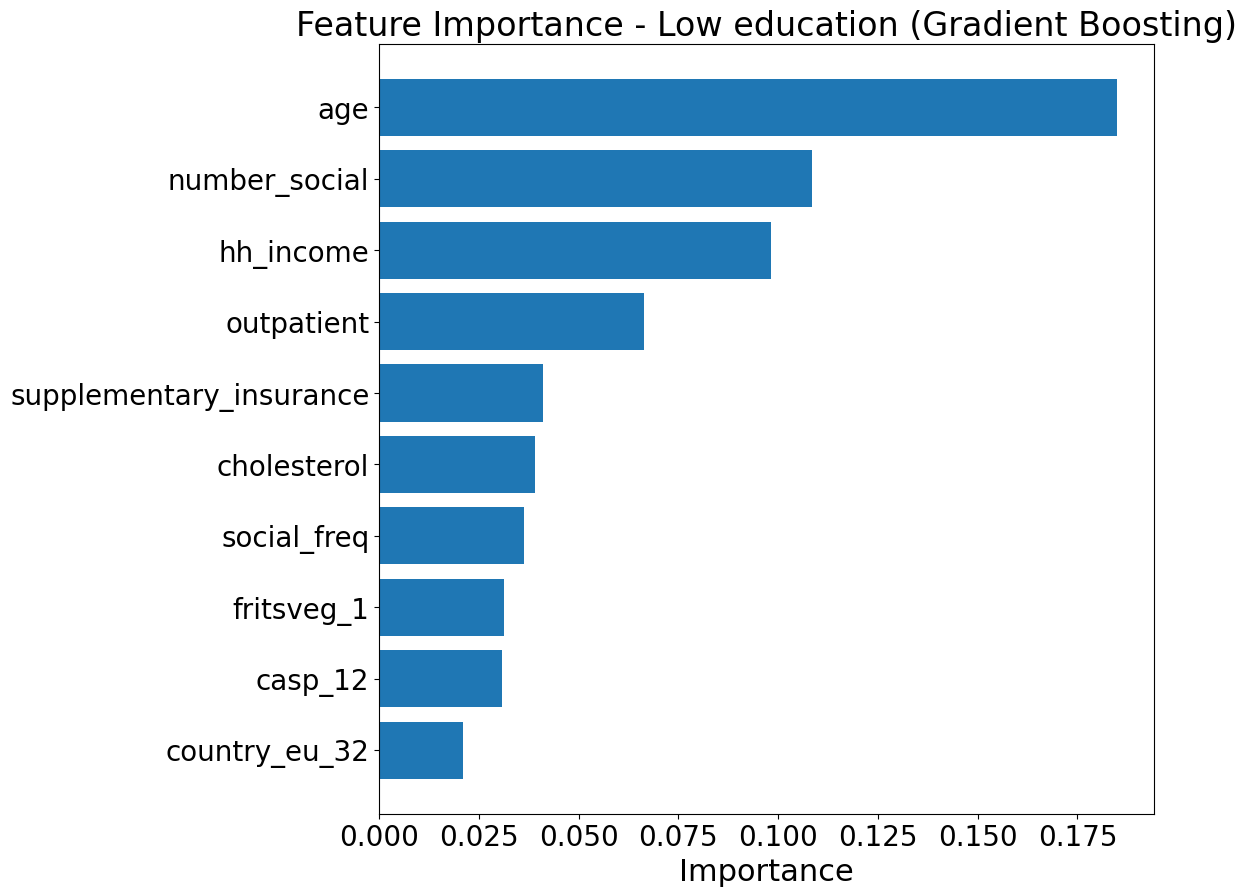

Training LightGBM for Low education...
Feature importance table saved as: mammogram_feature_importance_Low education_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Low education_LightGBM.png


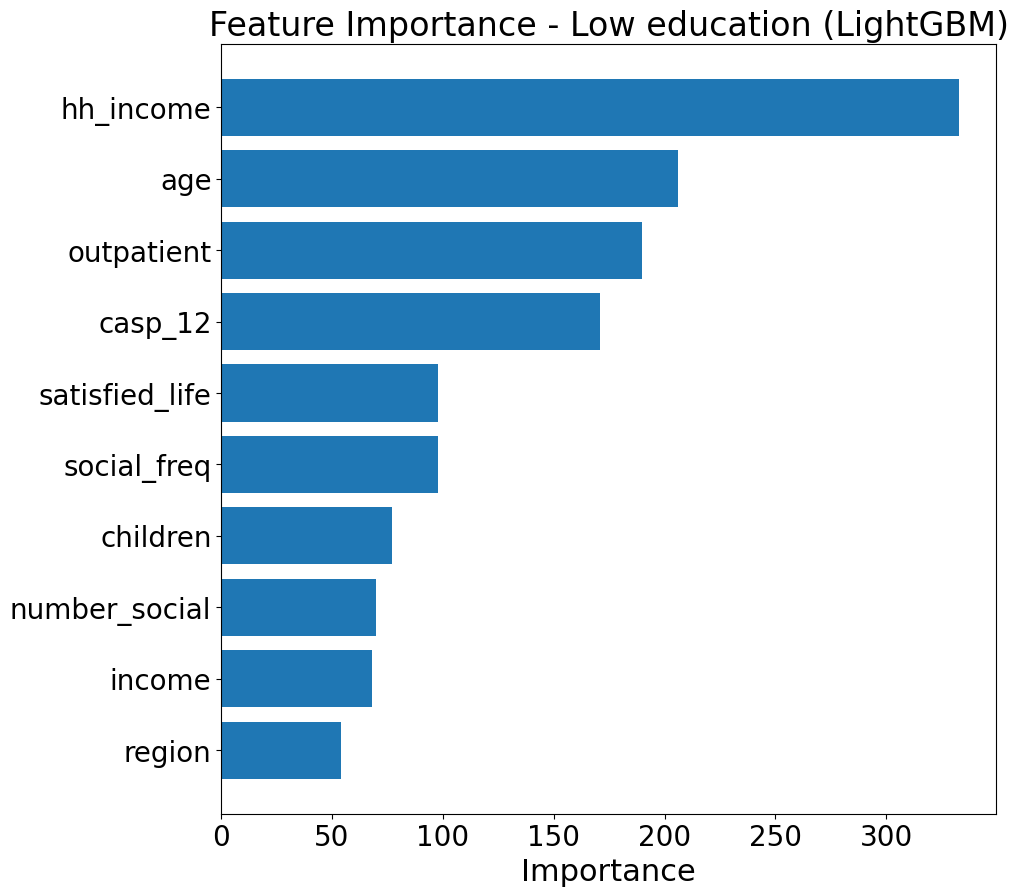

Processing Medium education...
Training Random Forest for Medium education...
Feature importance table saved as: mammogram_feature_importance_Medium education_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Medium education_Random Forest.png


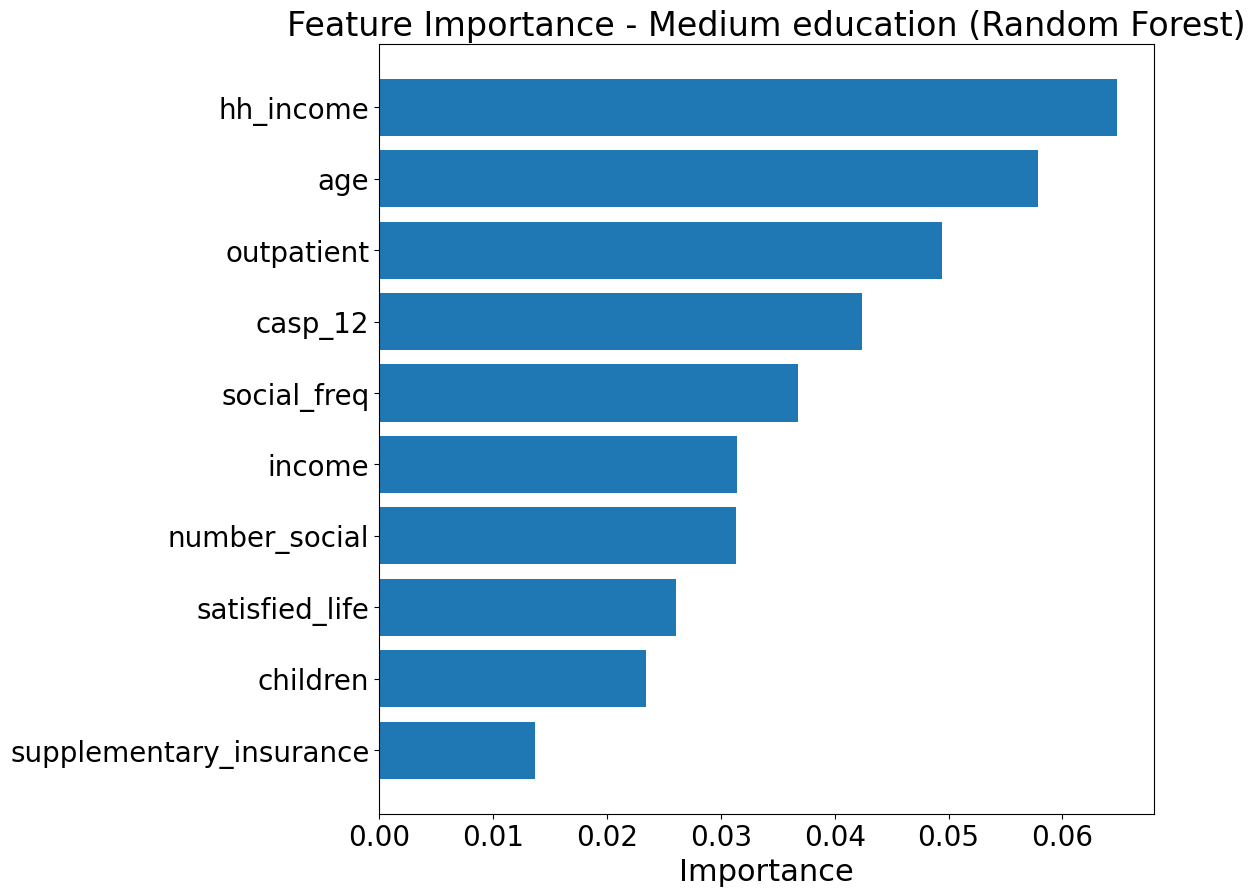

Training XGBoost for Medium education...
Feature importance table saved as: mammogram_feature_importance_Medium education_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Medium education_XGBoost.png


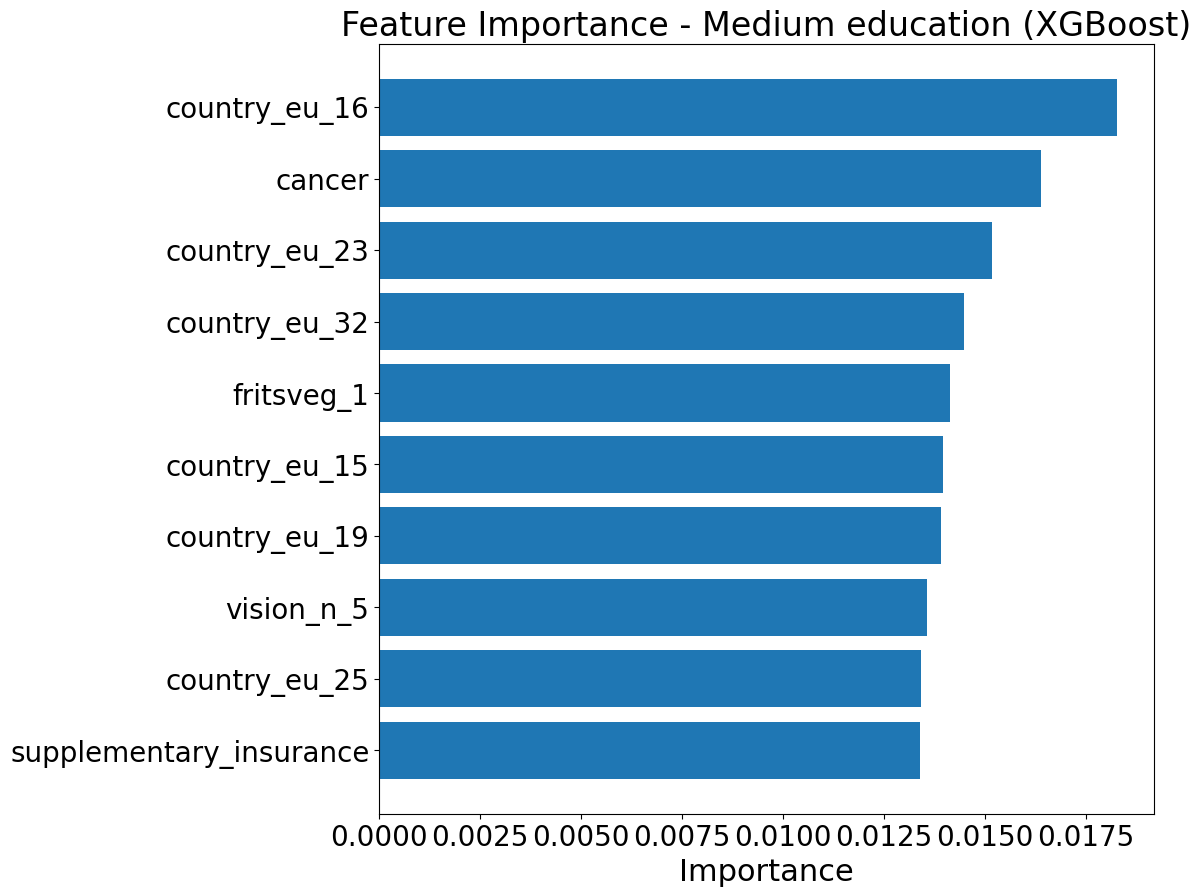

Training Gradient Boosting for Medium education...
Feature importance table saved as: mammogram_feature_importance_Medium education_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Medium education_Gradient Boosting.png


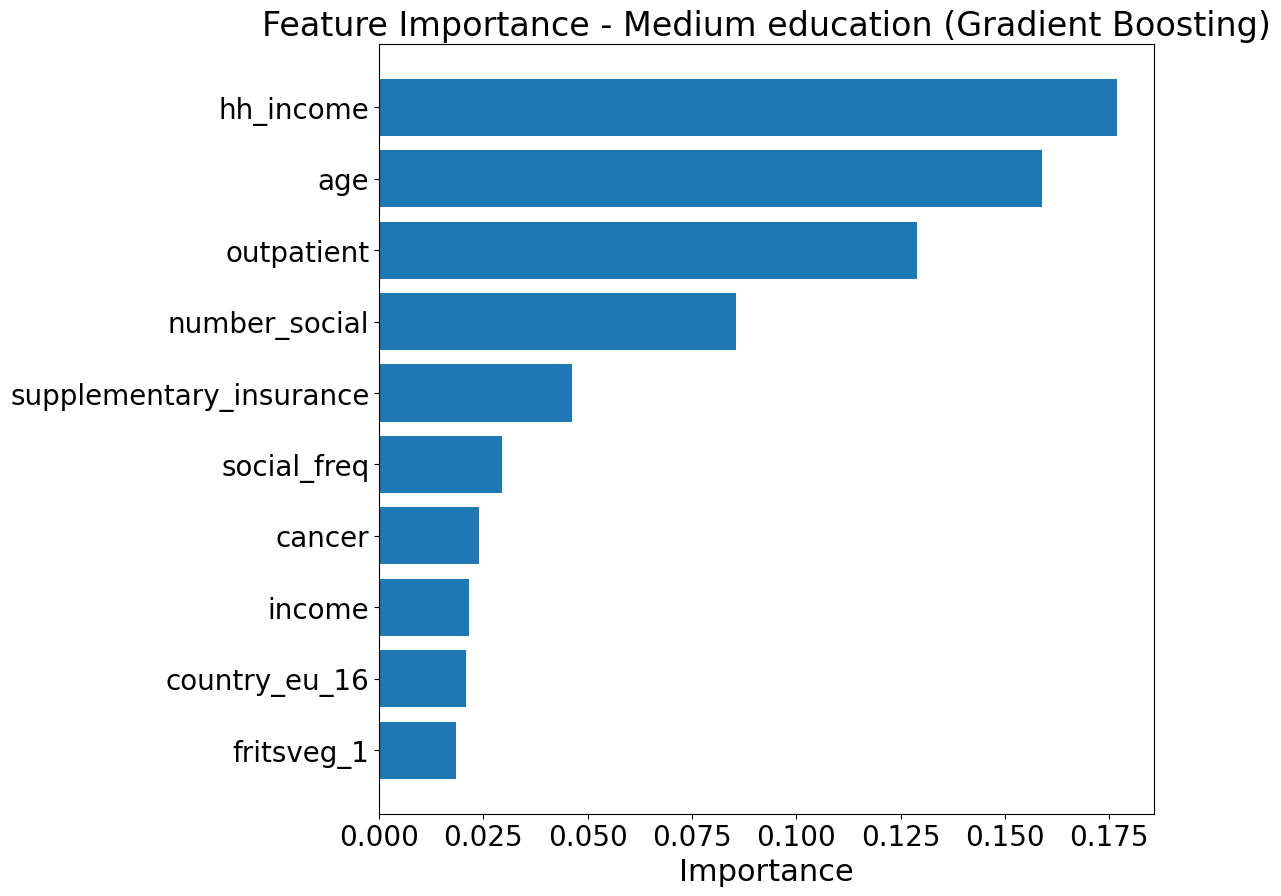

Training LightGBM for Medium education...
Feature importance table saved as: mammogram_feature_importance_Medium education_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Medium education_LightGBM.png


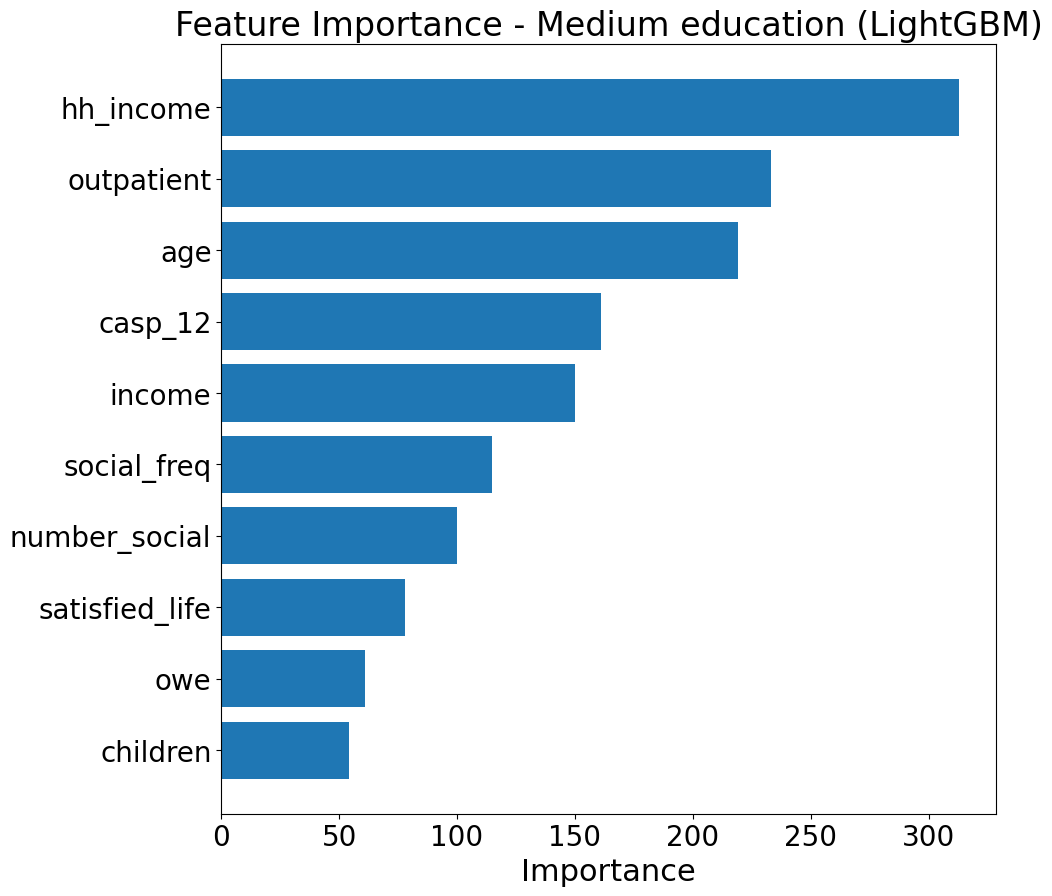

Processing High education...
Training Random Forest for High education...
Feature importance table saved as: mammogram_feature_importance_High education_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_High education_Random Forest.png


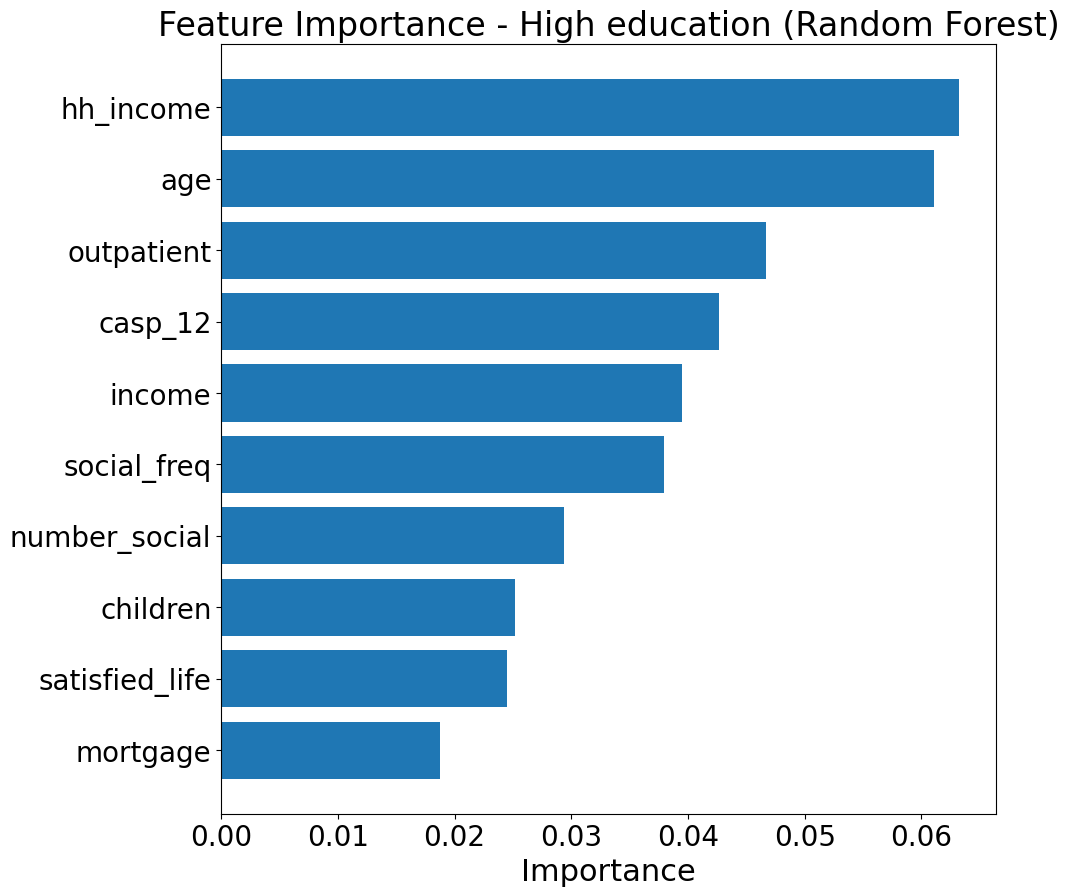

Training XGBoost for High education...
Feature importance table saved as: mammogram_feature_importance_High education_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_High education_XGBoost.png


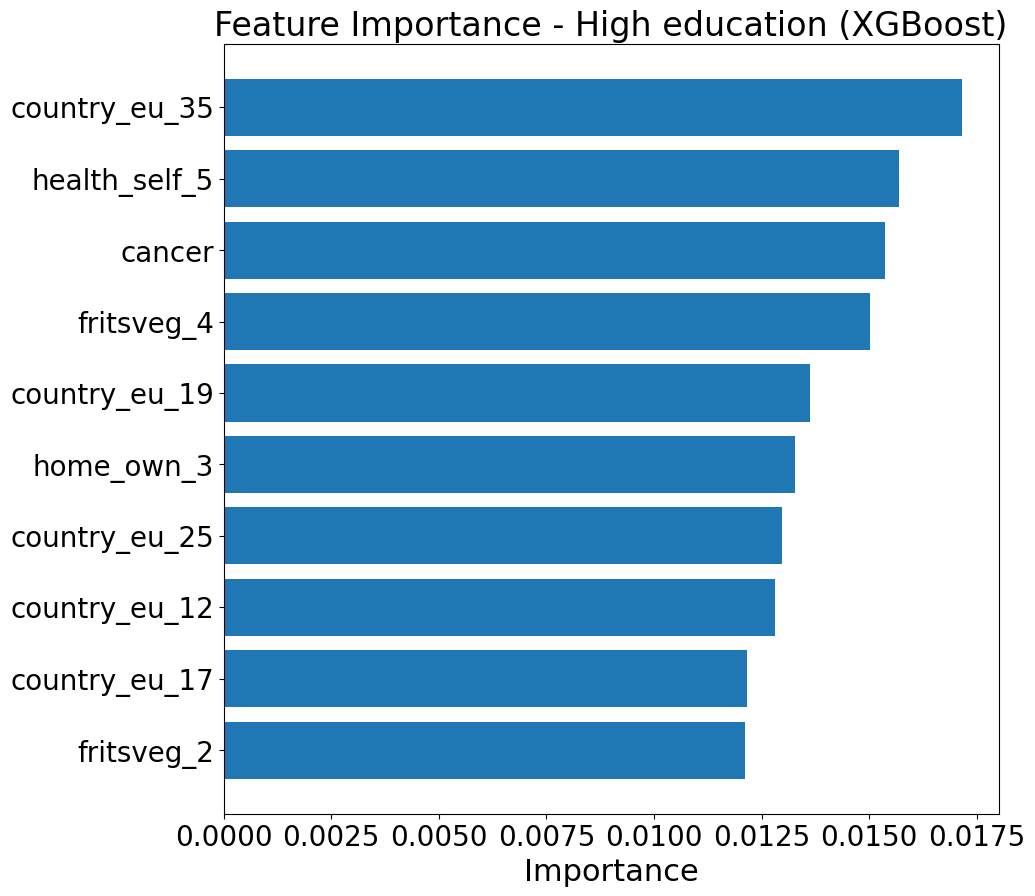

Training Gradient Boosting for High education...
Feature importance table saved as: mammogram_feature_importance_High education_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_High education_Gradient Boosting.png


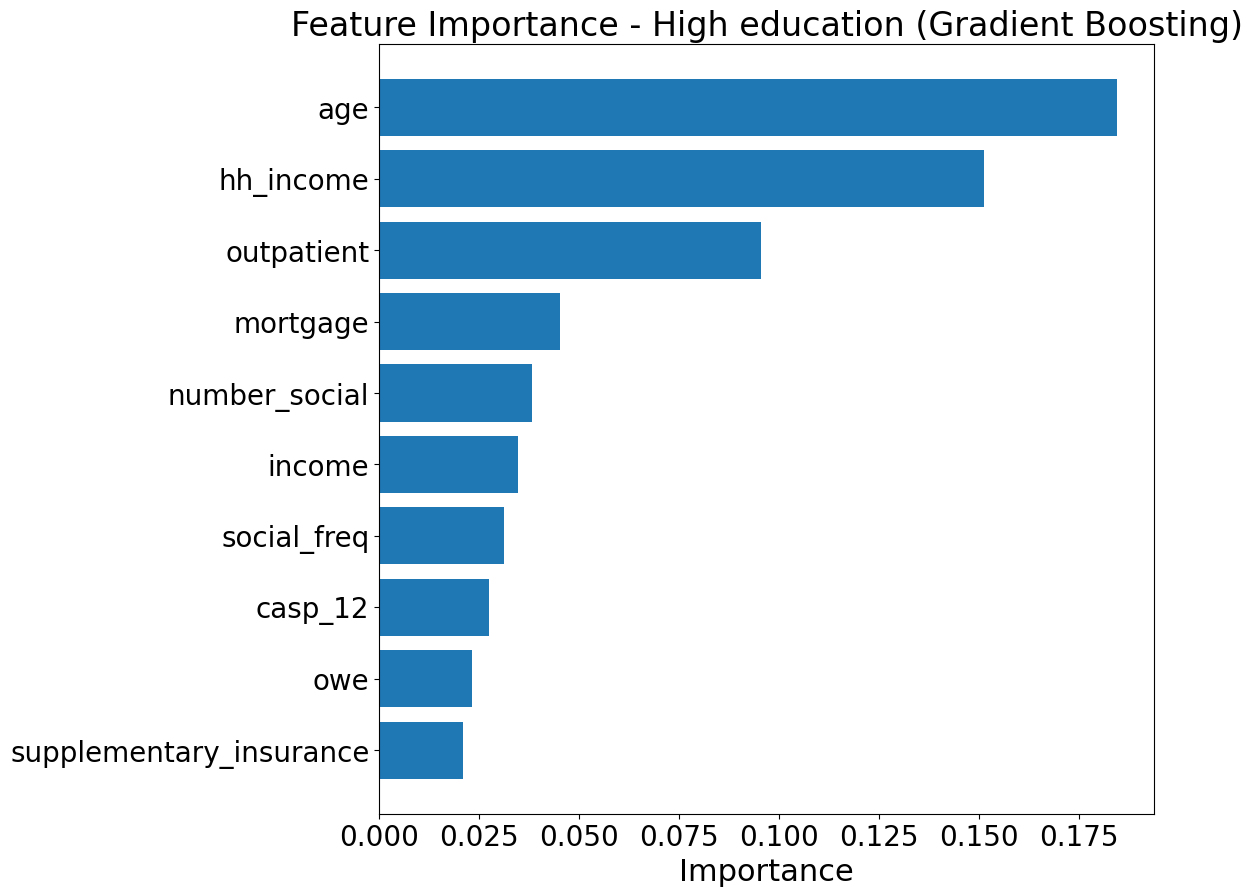

Training LightGBM for High education...
Feature importance table saved as: mammogram_feature_importance_High education_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_High education_LightGBM.png


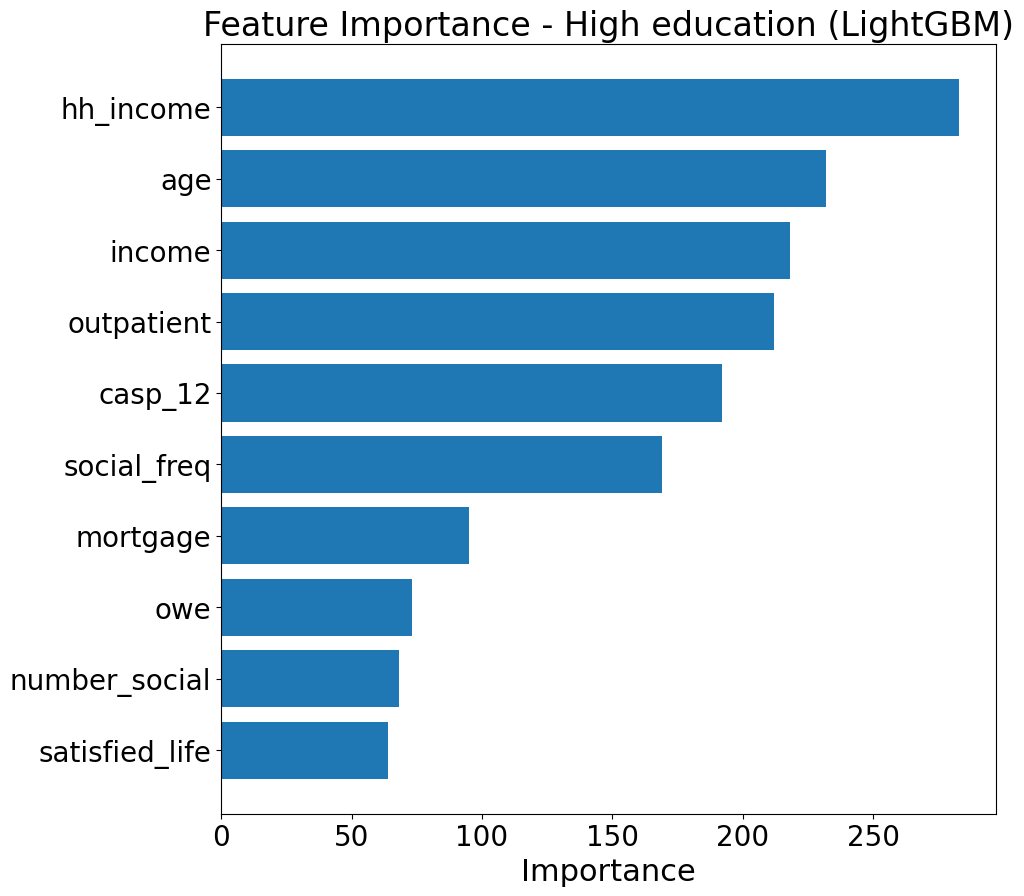

Processing Croatia...
Training Random Forest for Croatia...
Feature importance table saved as: mammogram_feature_importance_Croatia_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Croatia_Random Forest.png


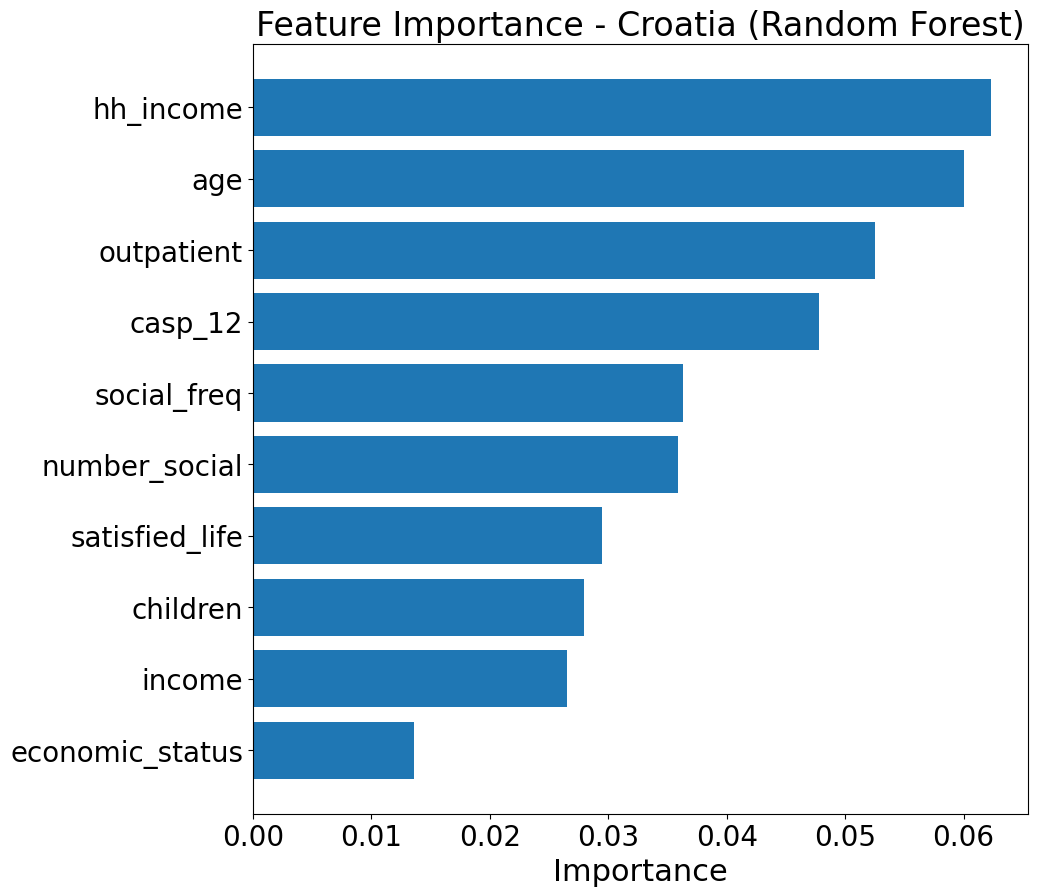

Training XGBoost for Croatia...
Feature importance table saved as: mammogram_feature_importance_Croatia_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Croatia_XGBoost.png


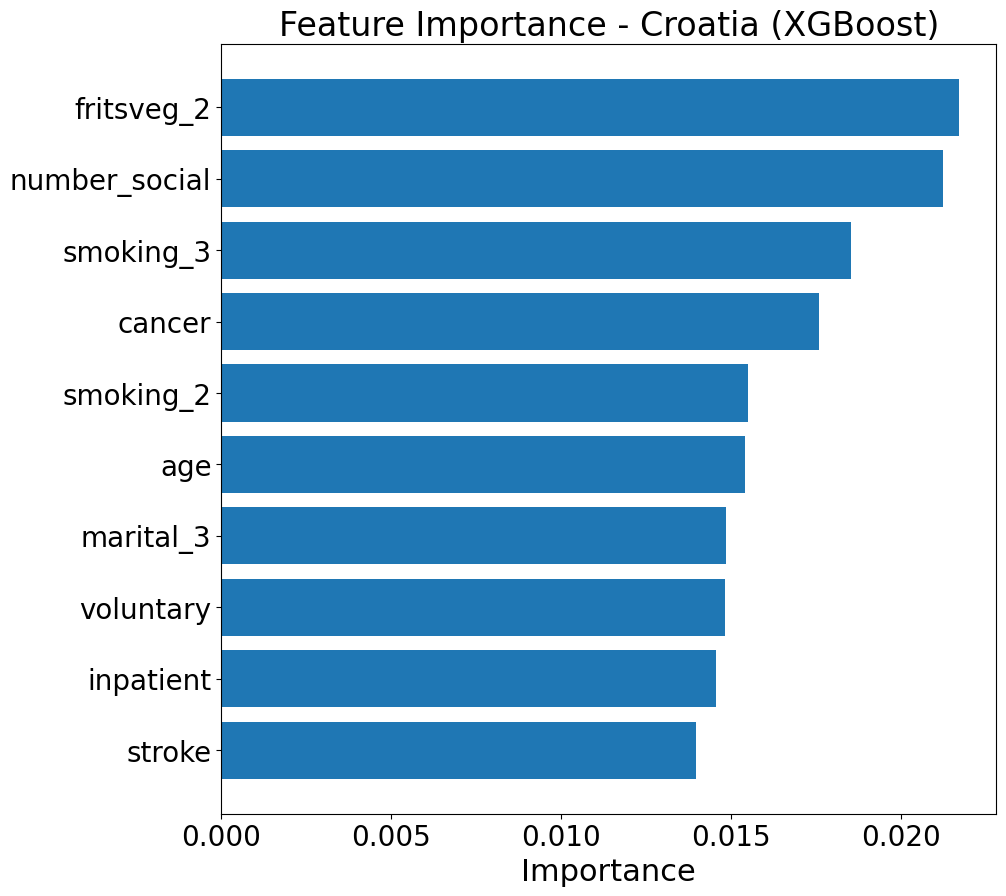

Training Gradient Boosting for Croatia...
Feature importance table saved as: mammogram_feature_importance_Croatia_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Croatia_Gradient Boosting.png


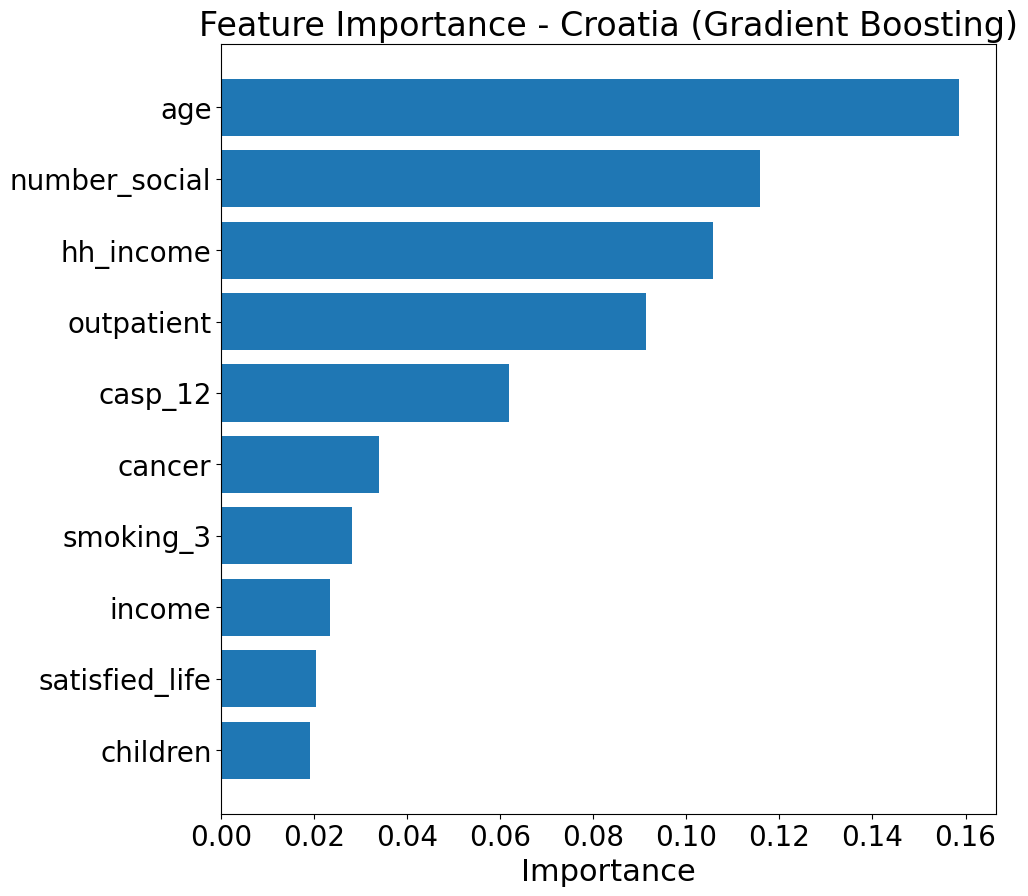

Training LightGBM for Croatia...
Feature importance table saved as: mammogram_feature_importance_Croatia_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Croatia_LightGBM.png


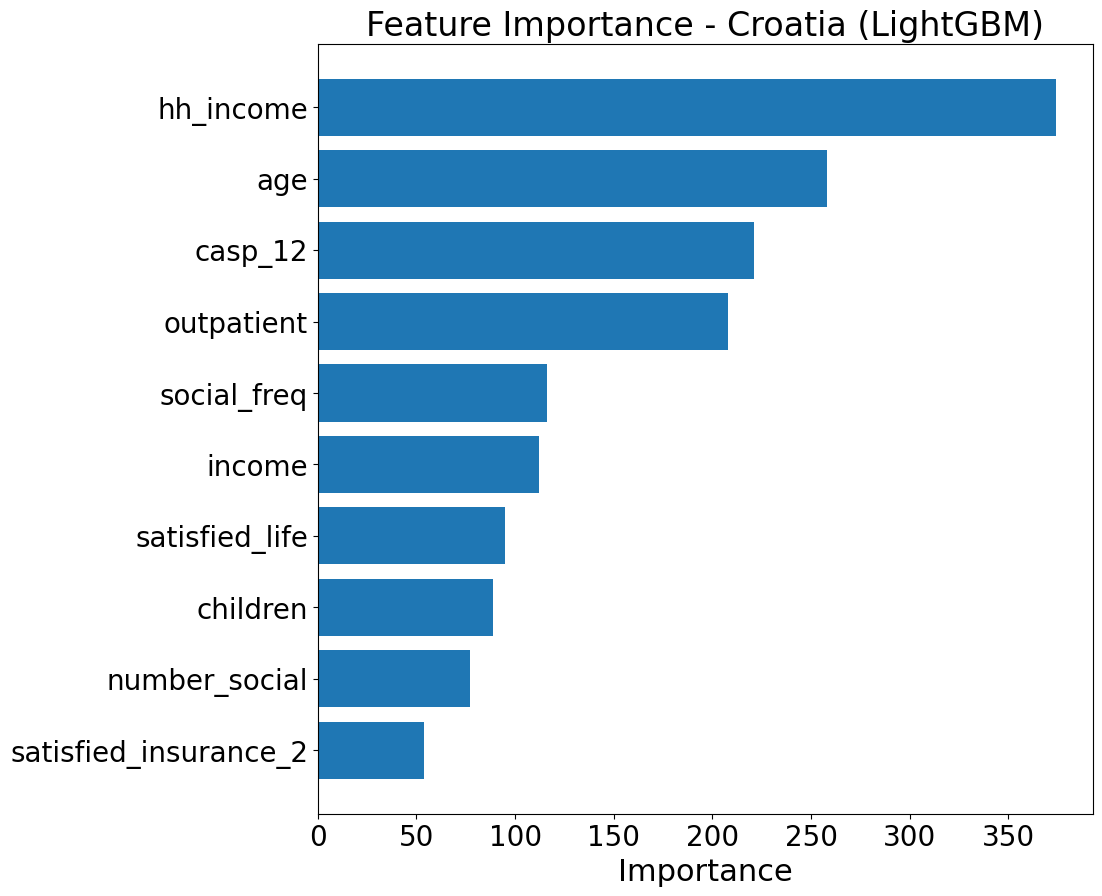

Processing Belgium...
Training Random Forest for Belgium...
Feature importance table saved as: mammogram_feature_importance_Belgium_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Belgium_Random Forest.png


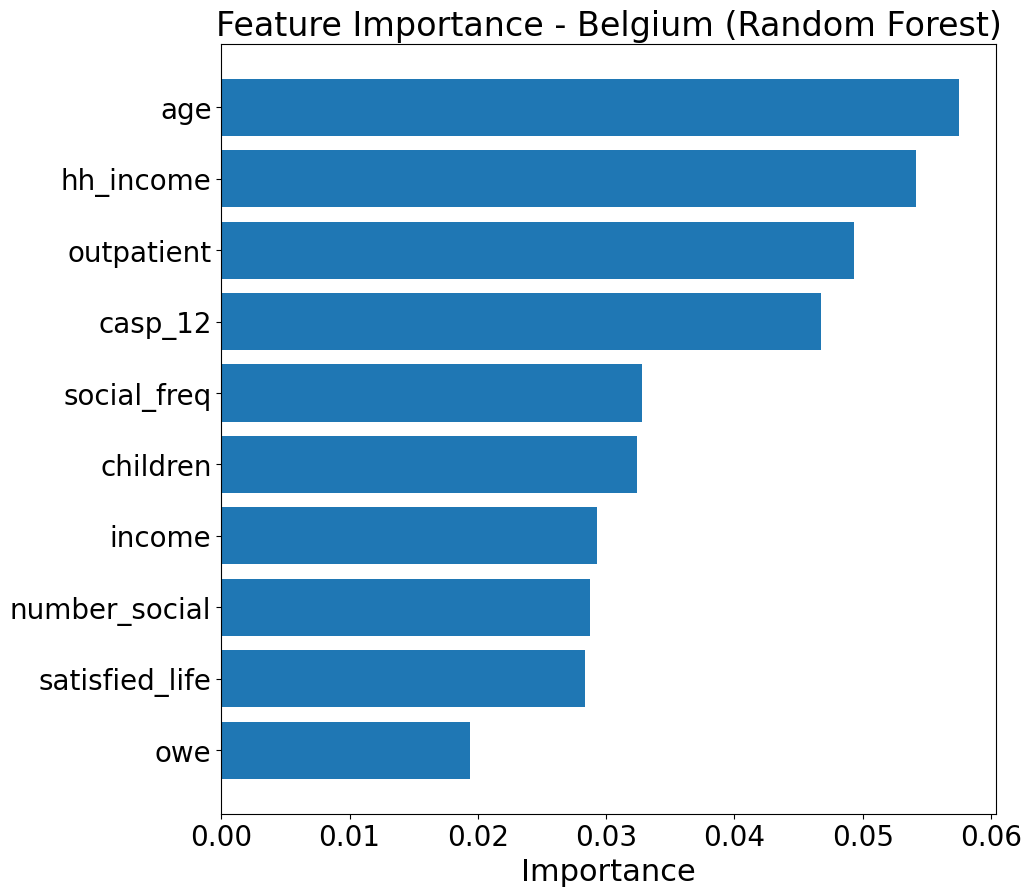

Training XGBoost for Belgium...
Feature importance table saved as: mammogram_feature_importance_Belgium_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Belgium_XGBoost.png


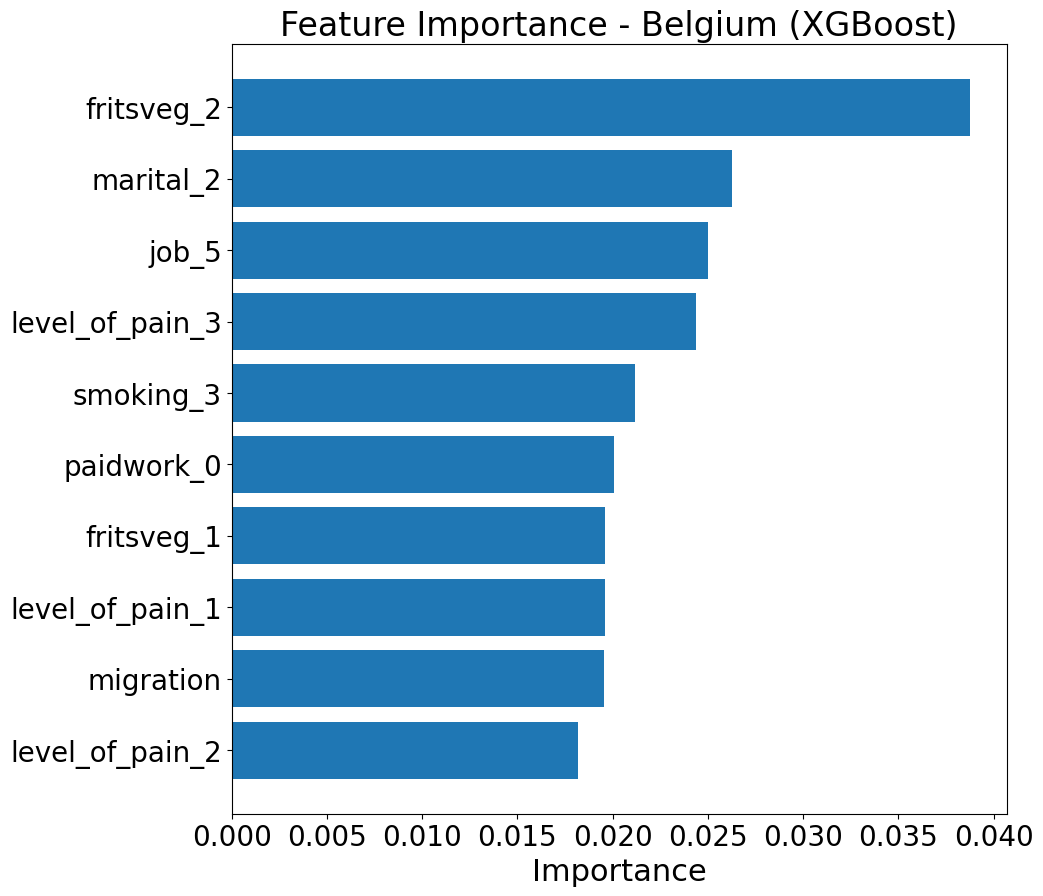

Training Gradient Boosting for Belgium...
Feature importance table saved as: mammogram_feature_importance_Belgium_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Belgium_Gradient Boosting.png


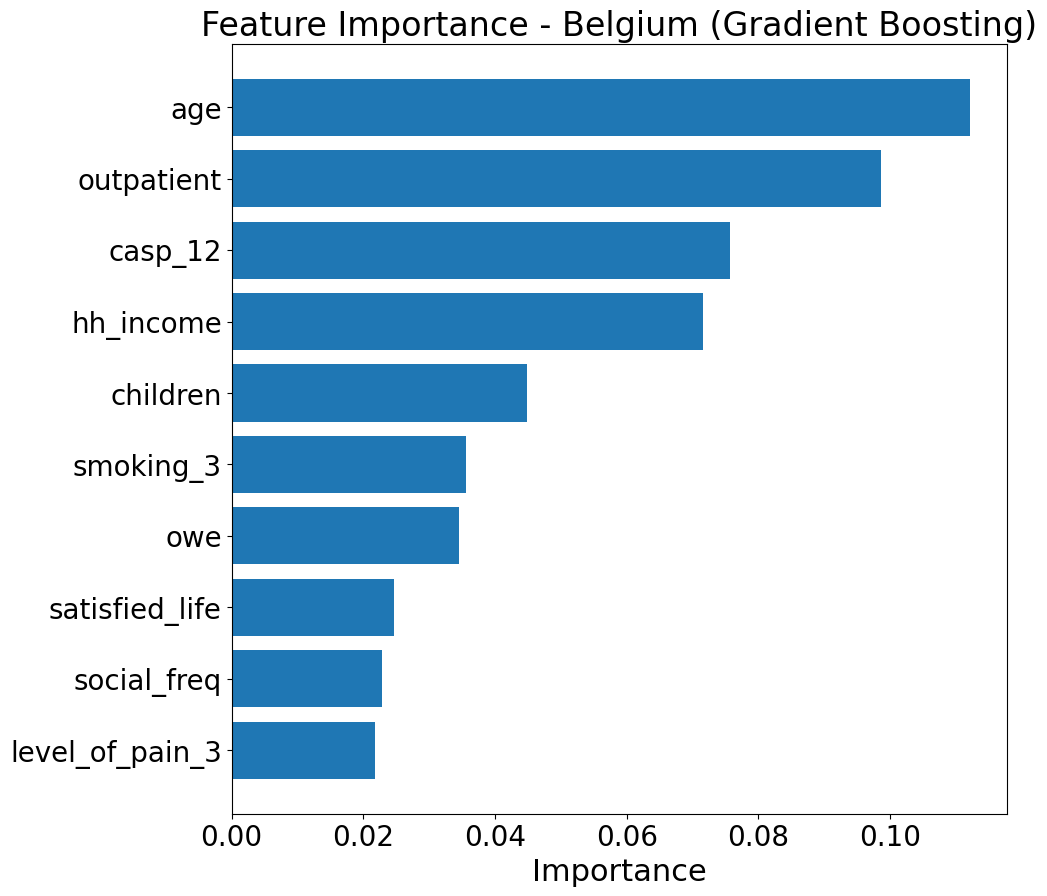

Training LightGBM for Belgium...
Feature importance table saved as: mammogram_feature_importance_Belgium_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Belgium_LightGBM.png


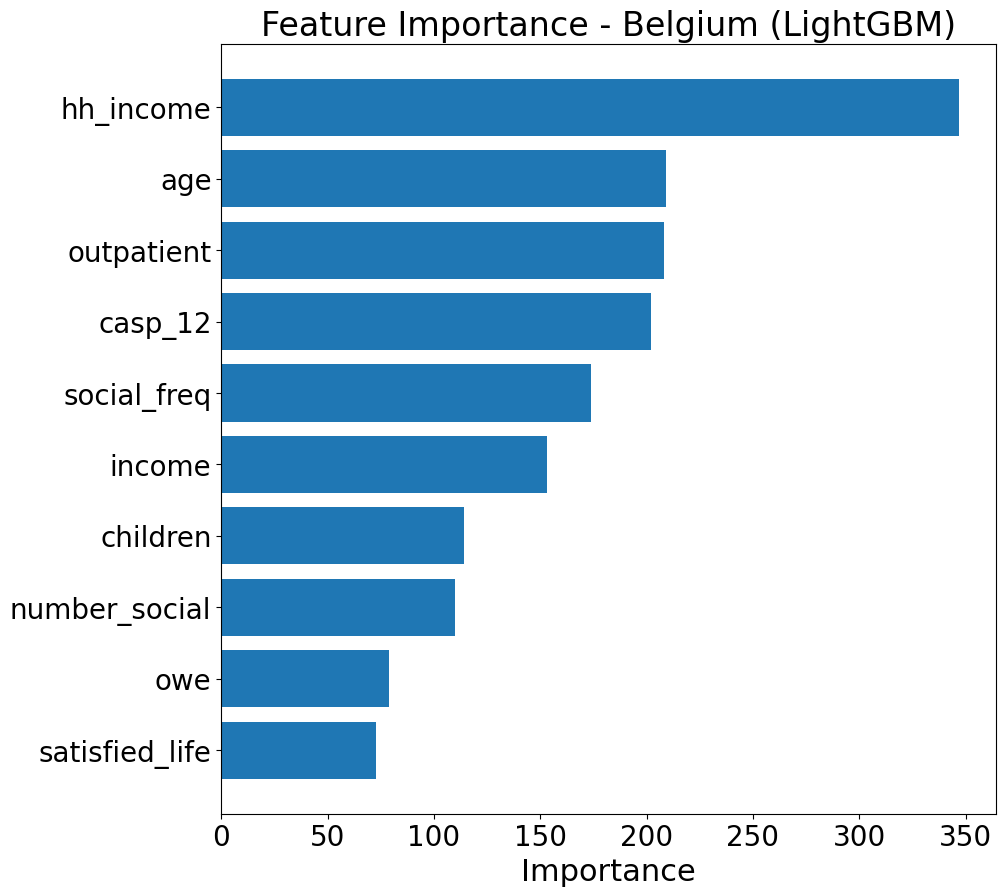

Processing Estonia...
Training Random Forest for Estonia...
Feature importance table saved as: mammogram_feature_importance_Estonia_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Estonia_Random Forest.png


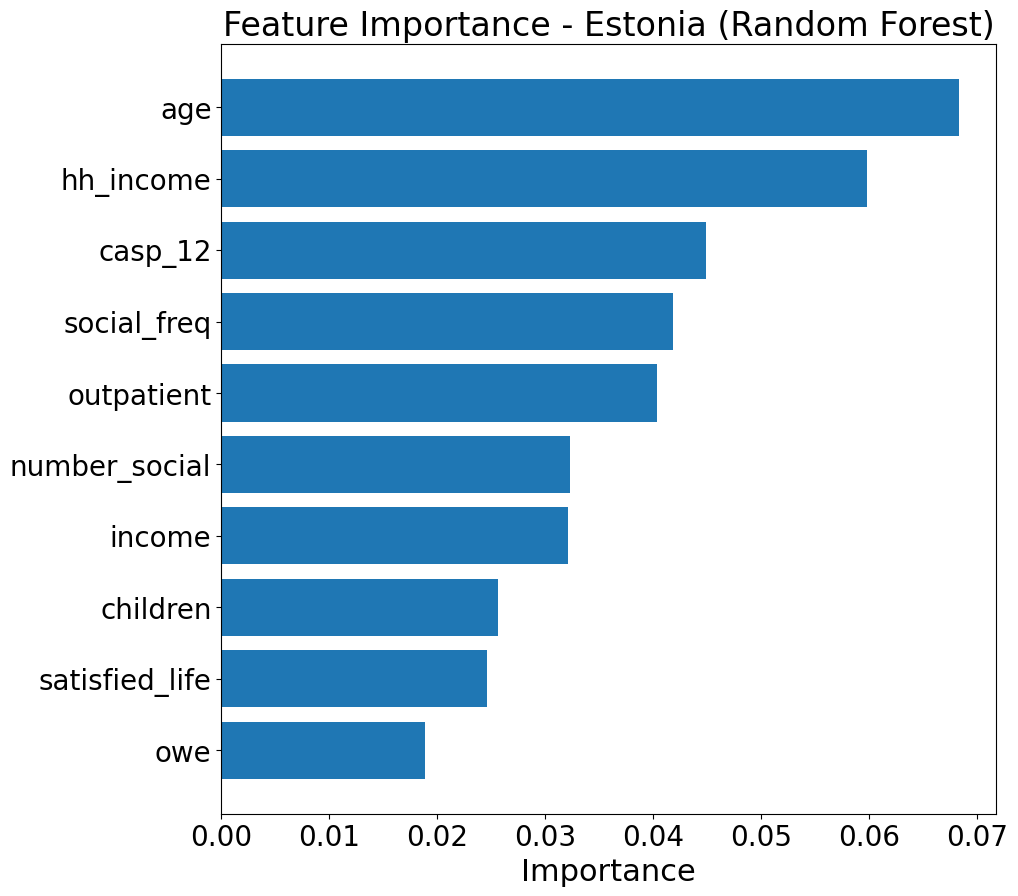

Training XGBoost for Estonia...
Feature importance table saved as: mammogram_feature_importance_Estonia_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Estonia_XGBoost.png


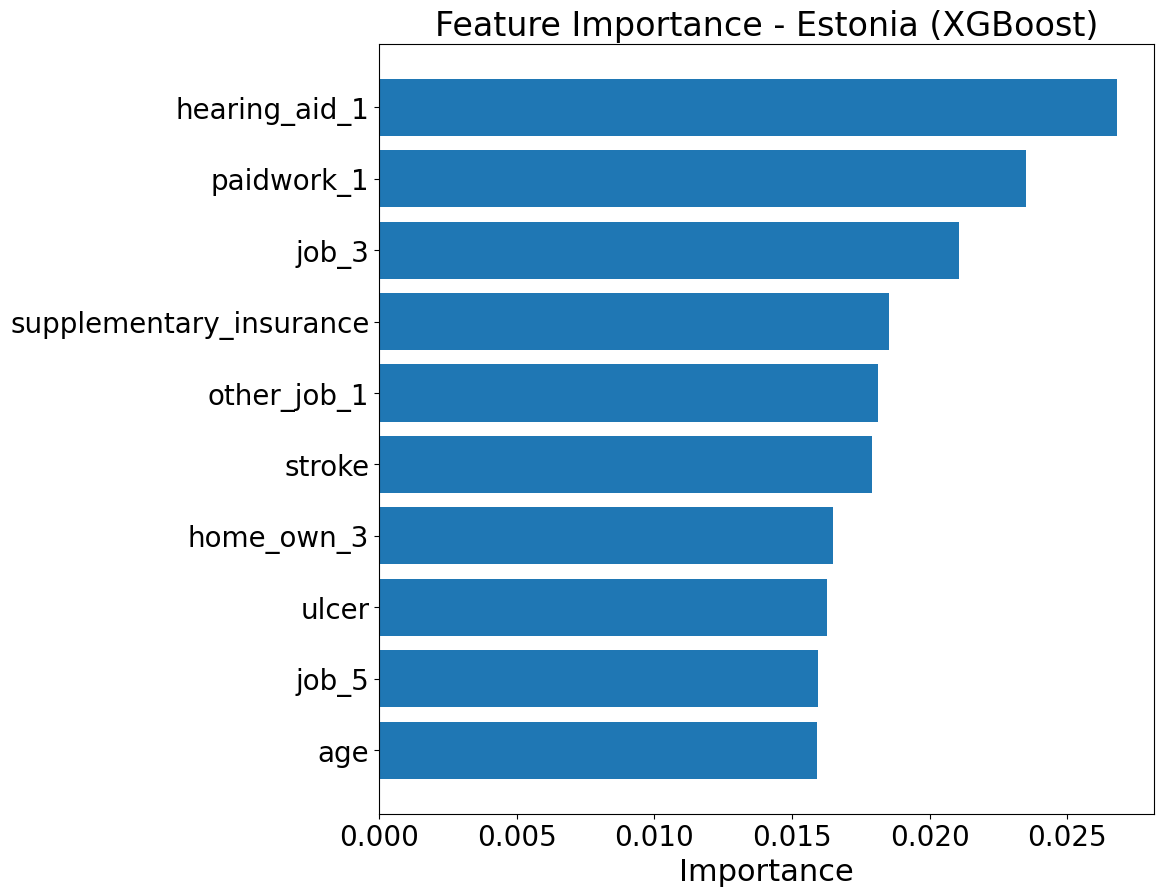

Training Gradient Boosting for Estonia...
Feature importance table saved as: mammogram_feature_importance_Estonia_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Estonia_Gradient Boosting.png


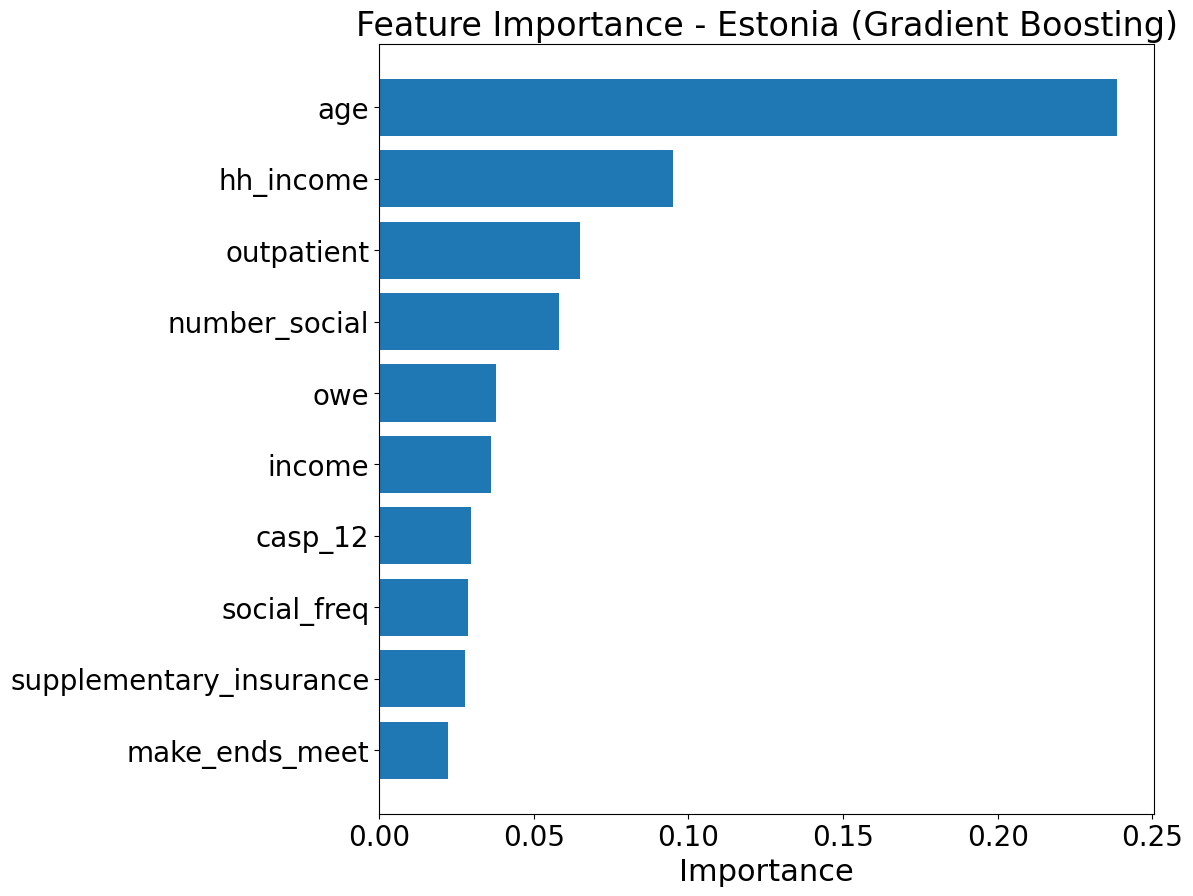

Training LightGBM for Estonia...
Feature importance table saved as: mammogram_feature_importance_Estonia_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Estonia_LightGBM.png


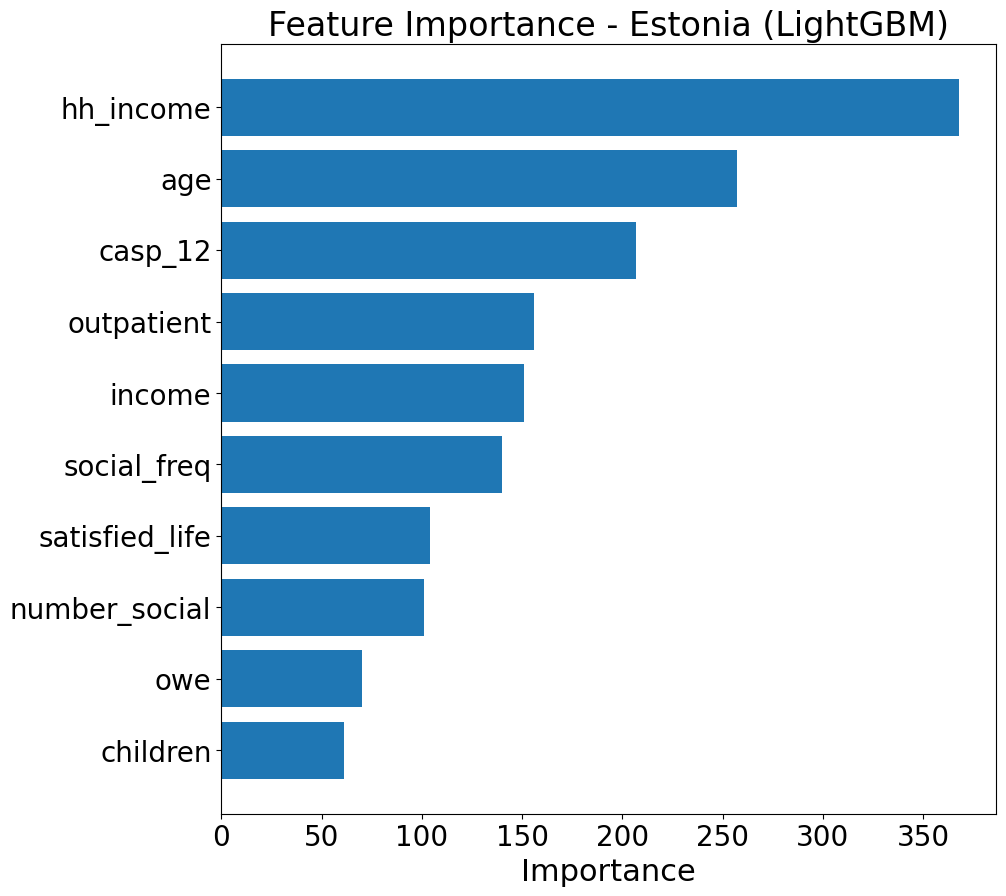

Processing Germany...
Training Random Forest for Germany...
Feature importance table saved as: mammogram_feature_importance_Germany_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Germany_Random Forest.png


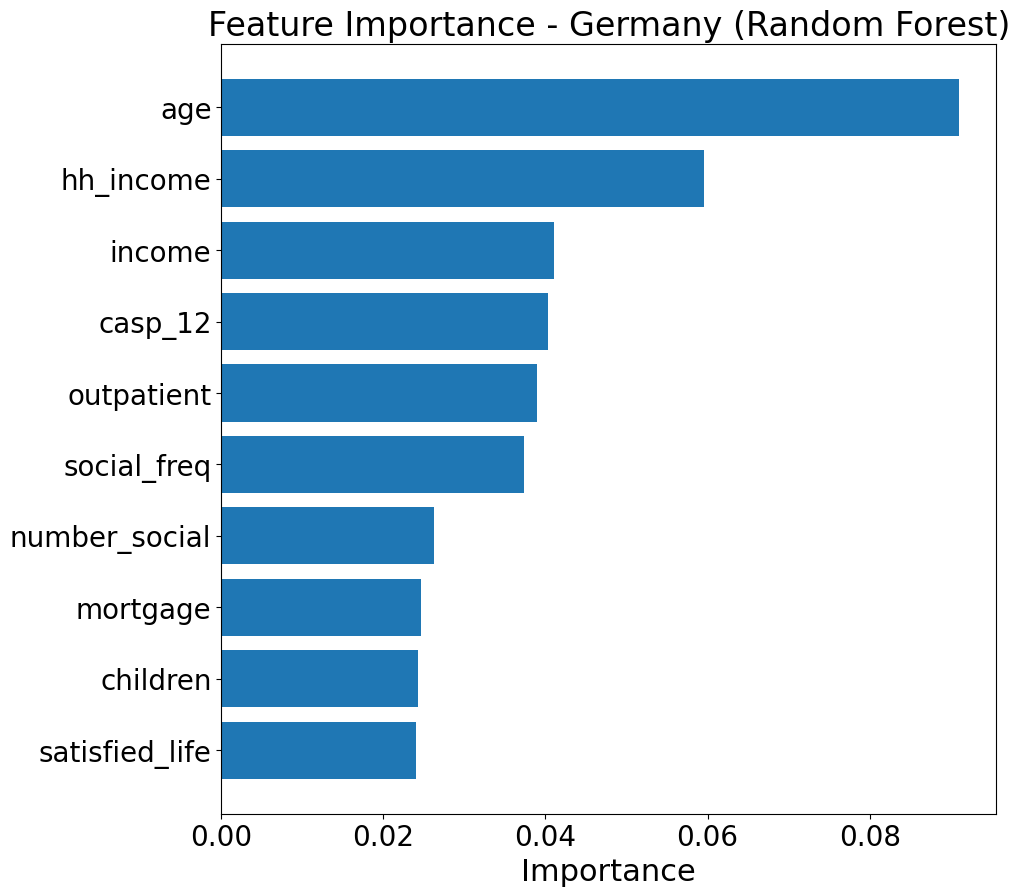

Training XGBoost for Germany...
Feature importance table saved as: mammogram_feature_importance_Germany_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Germany_XGBoost.png


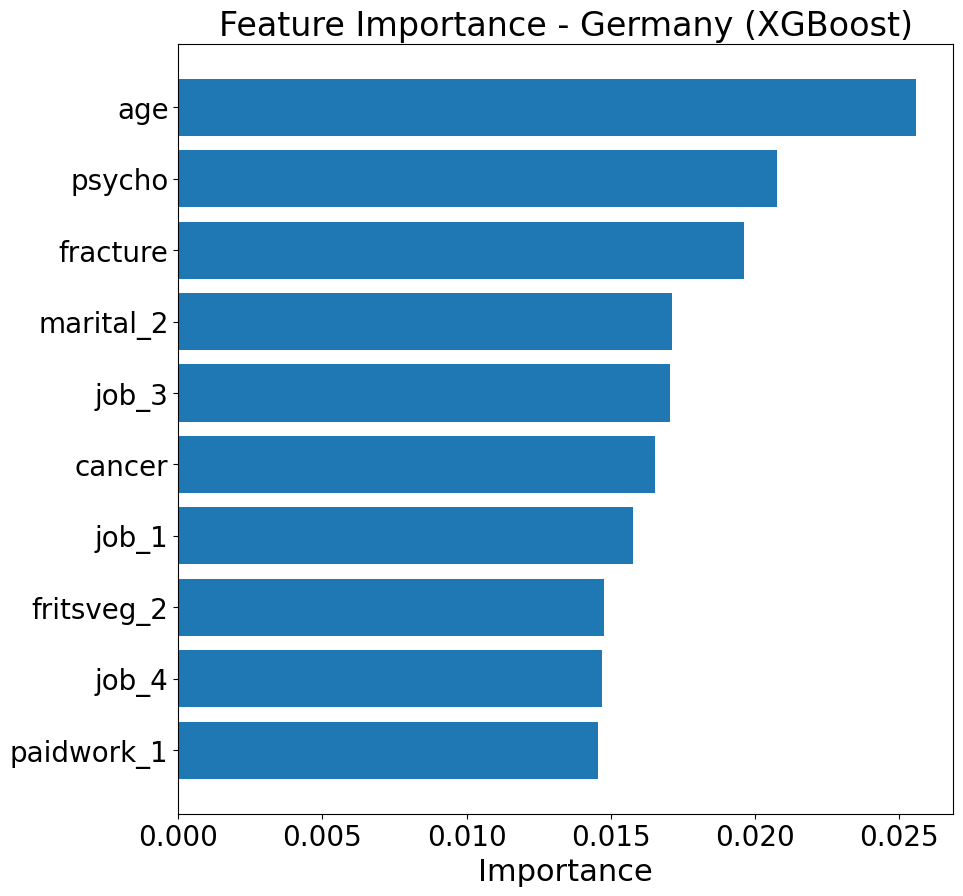

Training Gradient Boosting for Germany...
Feature importance table saved as: mammogram_feature_importance_Germany_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Germany_Gradient Boosting.png


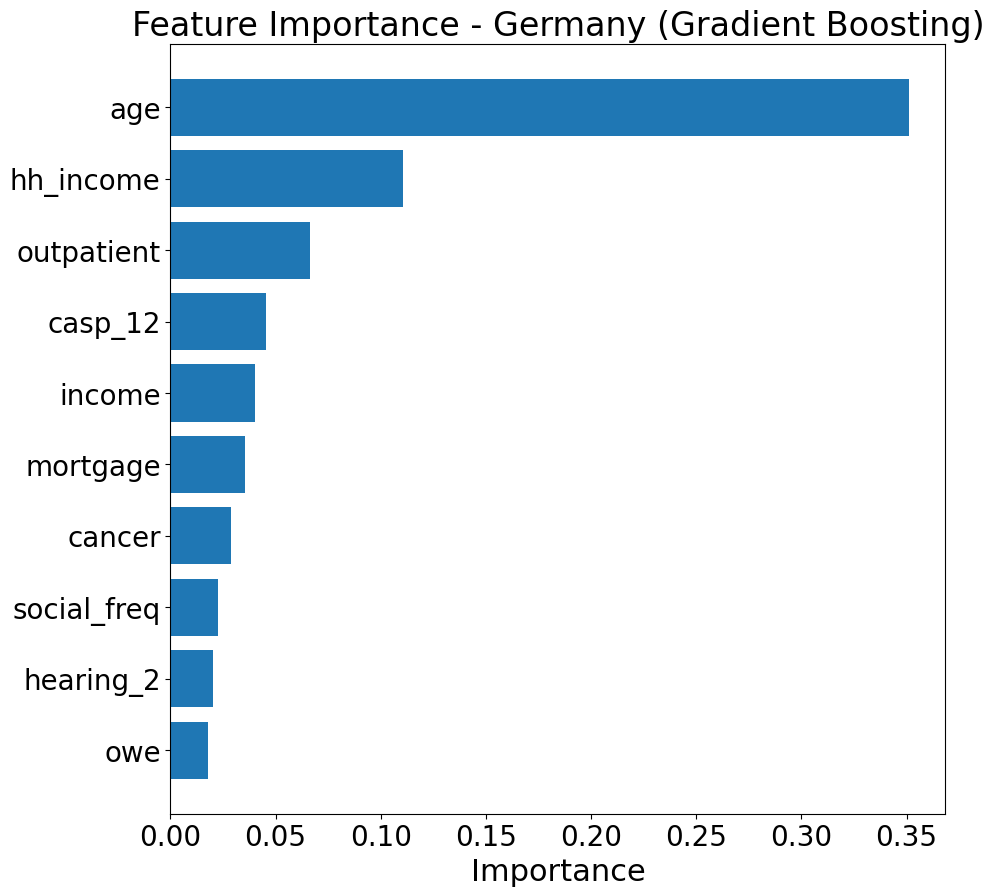

Training LightGBM for Germany...
Feature importance table saved as: mammogram_feature_importance_Germany_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Germany_LightGBM.png


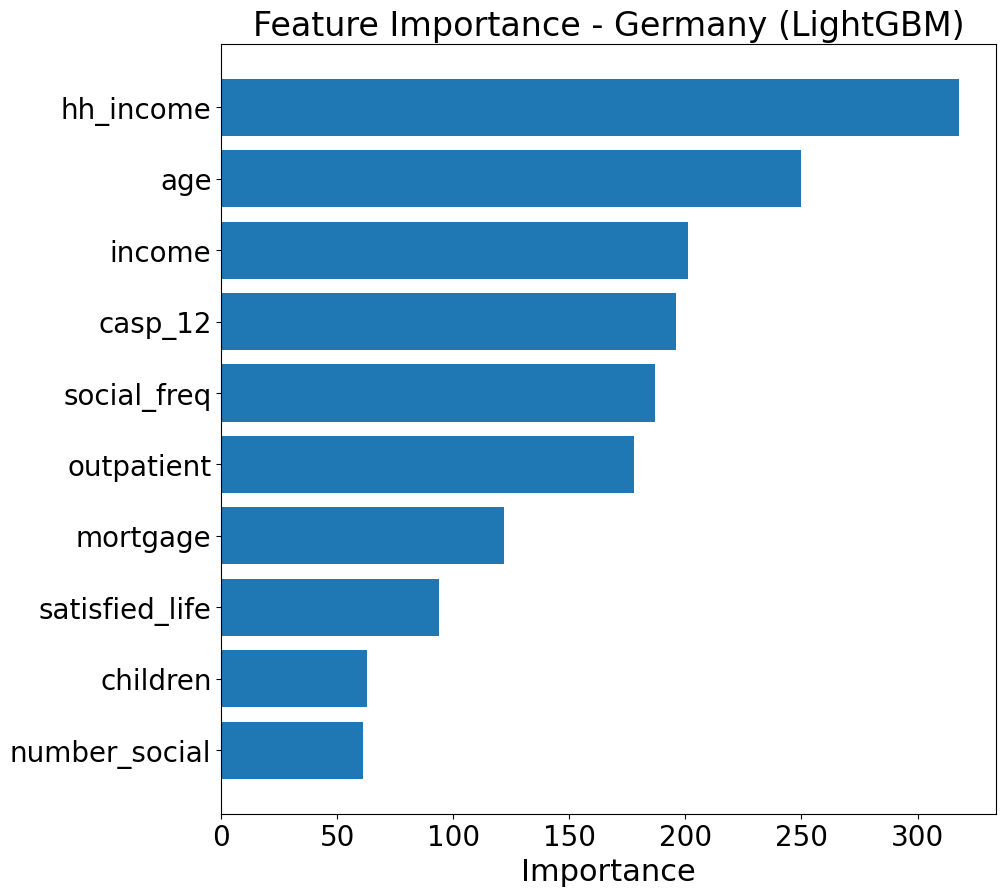

Processing Italy...
Training Random Forest for Italy...
Feature importance table saved as: mammogram_feature_importance_Italy_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Italy_Random Forest.png


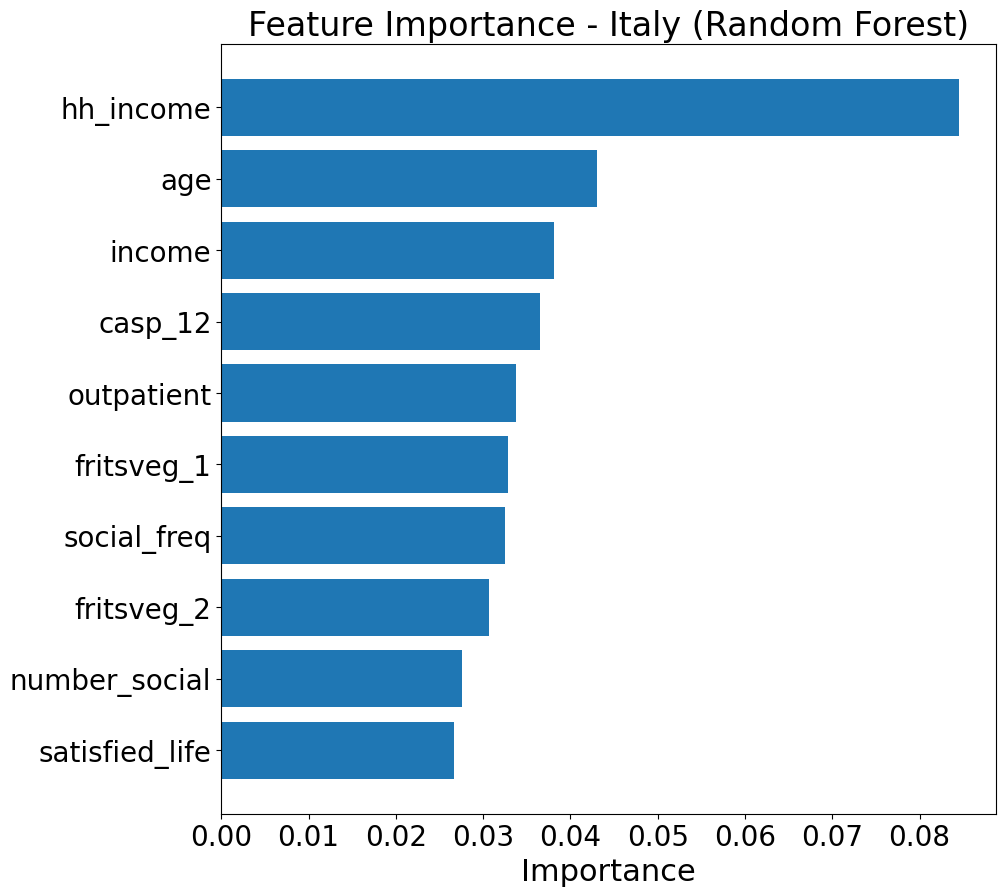

Training XGBoost for Italy...
Feature importance table saved as: mammogram_feature_importance_Italy_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Italy_XGBoost.png


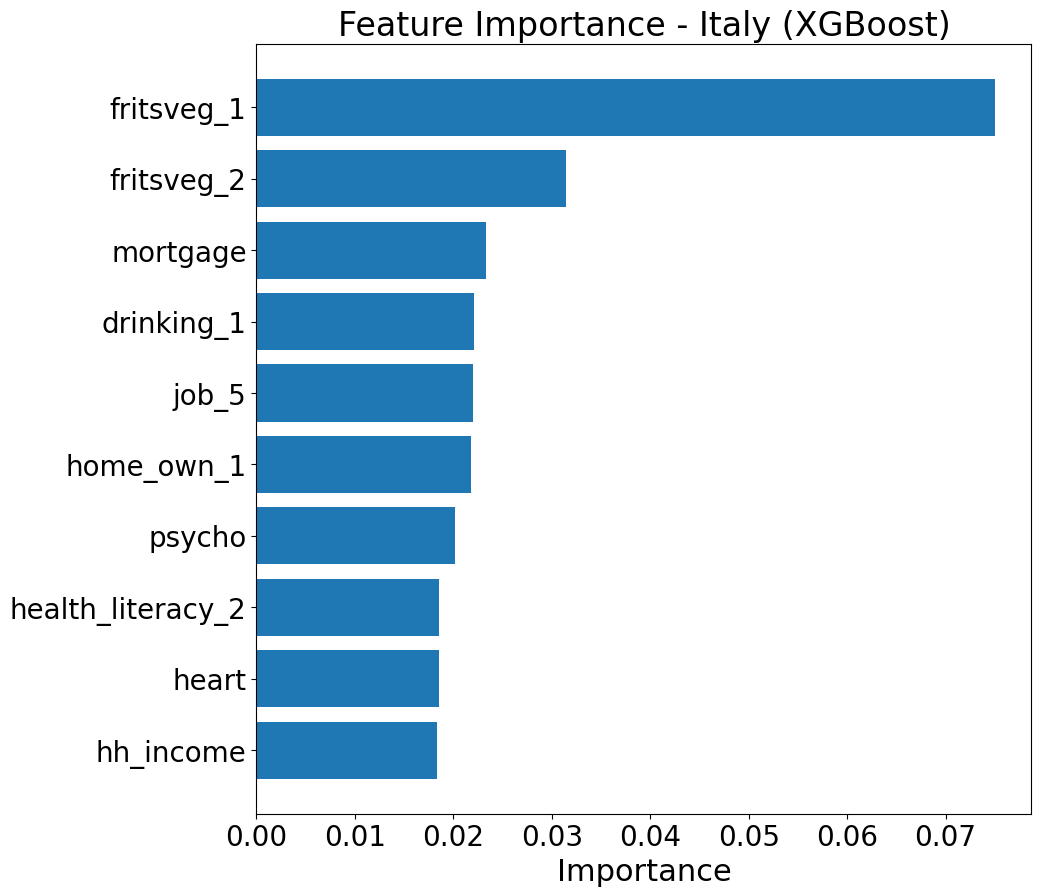

Training Gradient Boosting for Italy...
Feature importance table saved as: mammogram_feature_importance_Italy_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Italy_Gradient Boosting.png


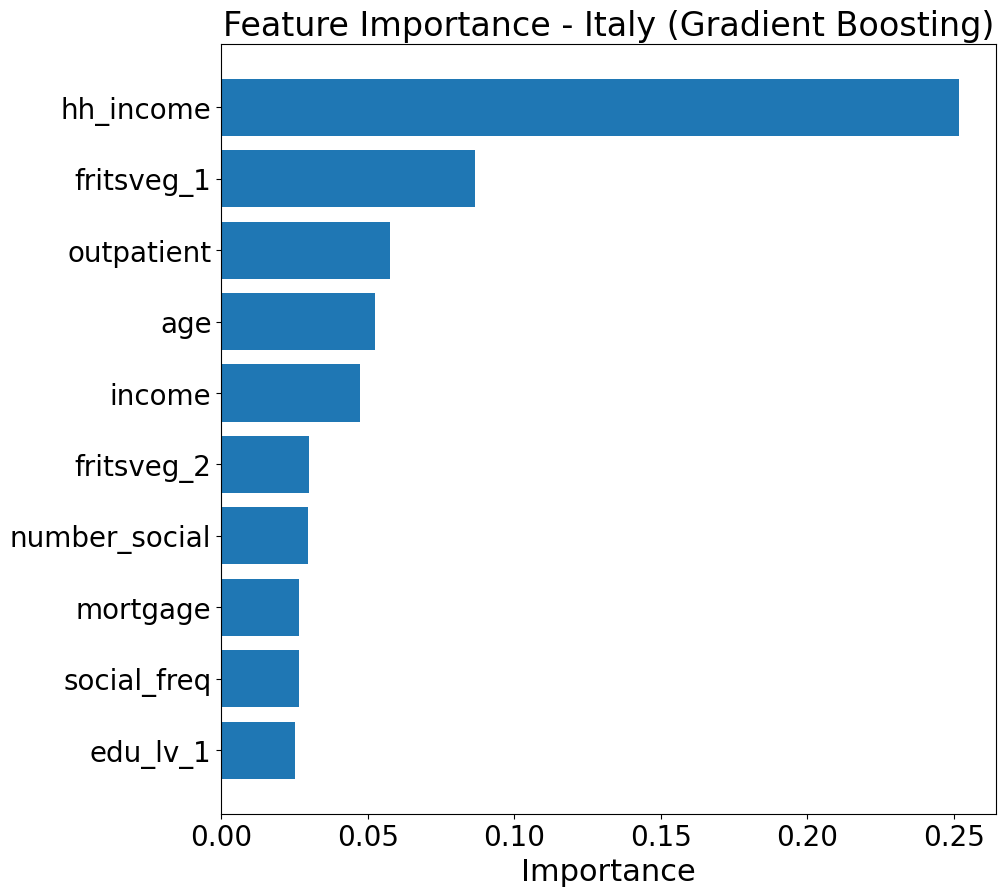

Training LightGBM for Italy...
Feature importance table saved as: mammogram_feature_importance_Italy_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Italy_LightGBM.png


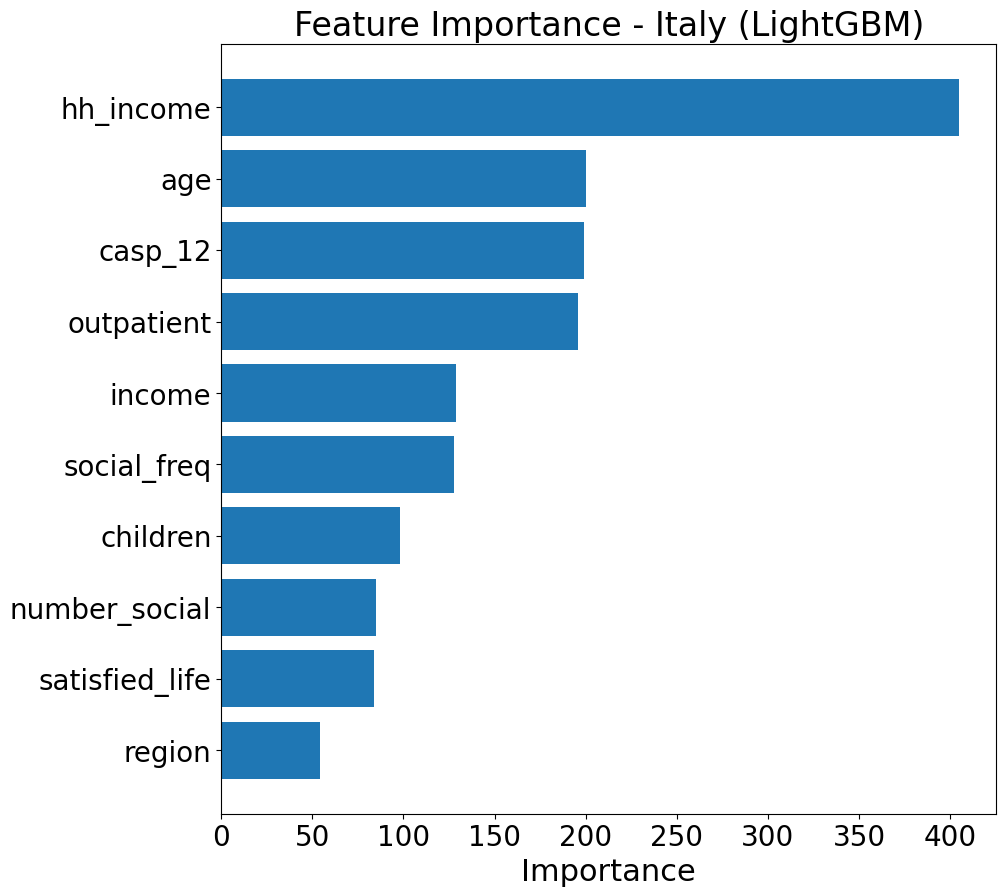

Processing Australia...
Training Random Forest for Australia...
Feature importance table saved as: mammogram_feature_importance_Australia_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Australia_Random Forest.png


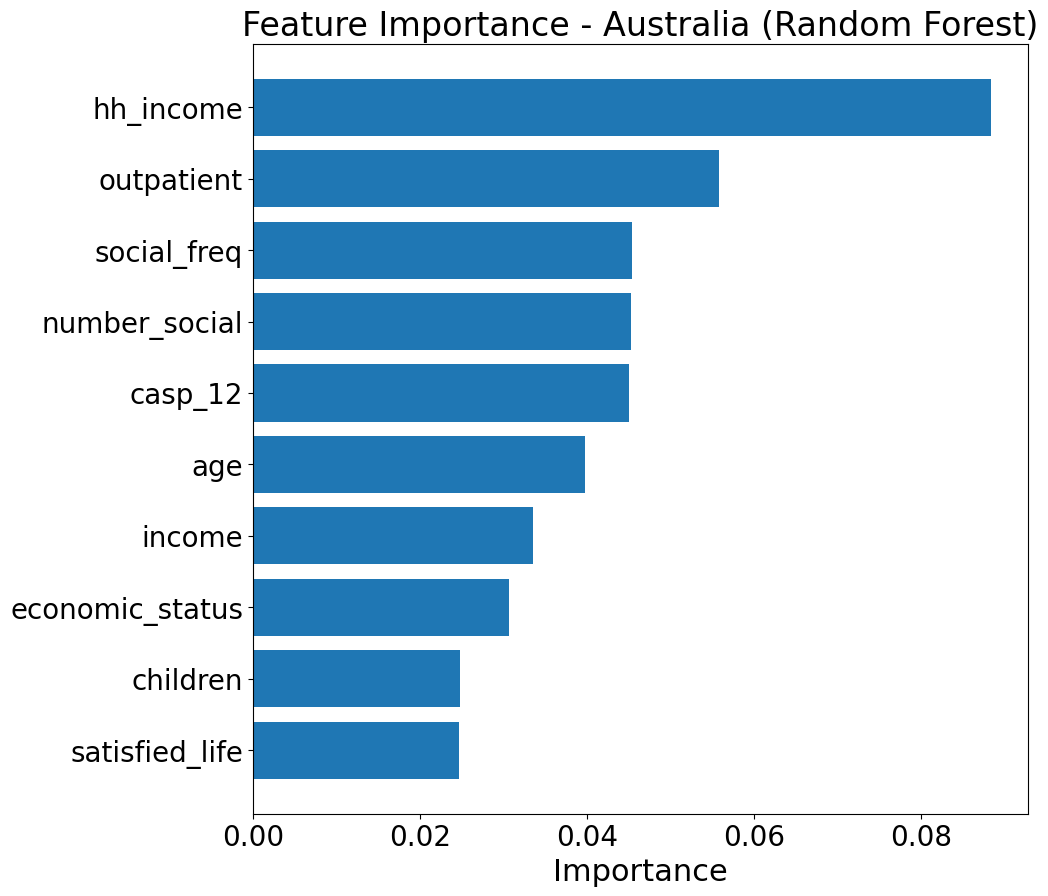

Training XGBoost for Australia...
Feature importance table saved as: mammogram_feature_importance_Australia_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Australia_XGBoost.png


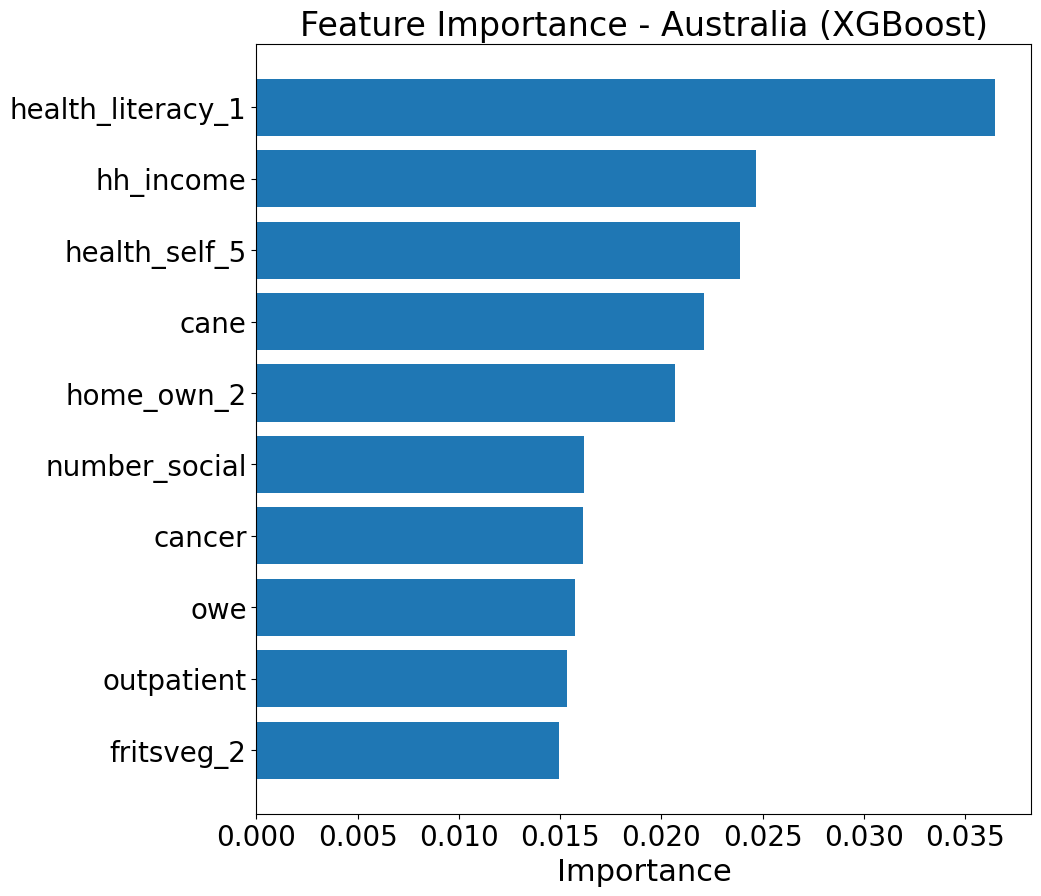

Training Gradient Boosting for Australia...
Feature importance table saved as: mammogram_feature_importance_Australia_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Australia_Gradient Boosting.png


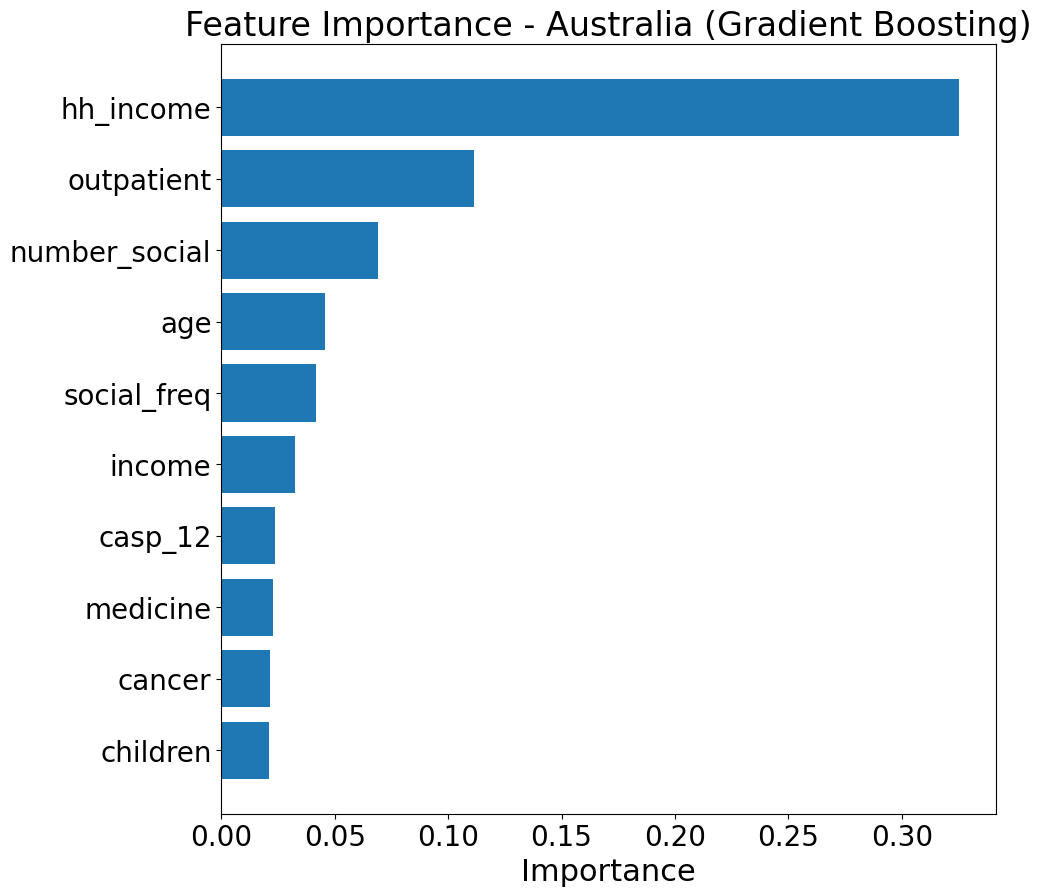

Training LightGBM for Australia...
Feature importance table saved as: mammogram_feature_importance_Australia_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Australia_LightGBM.png


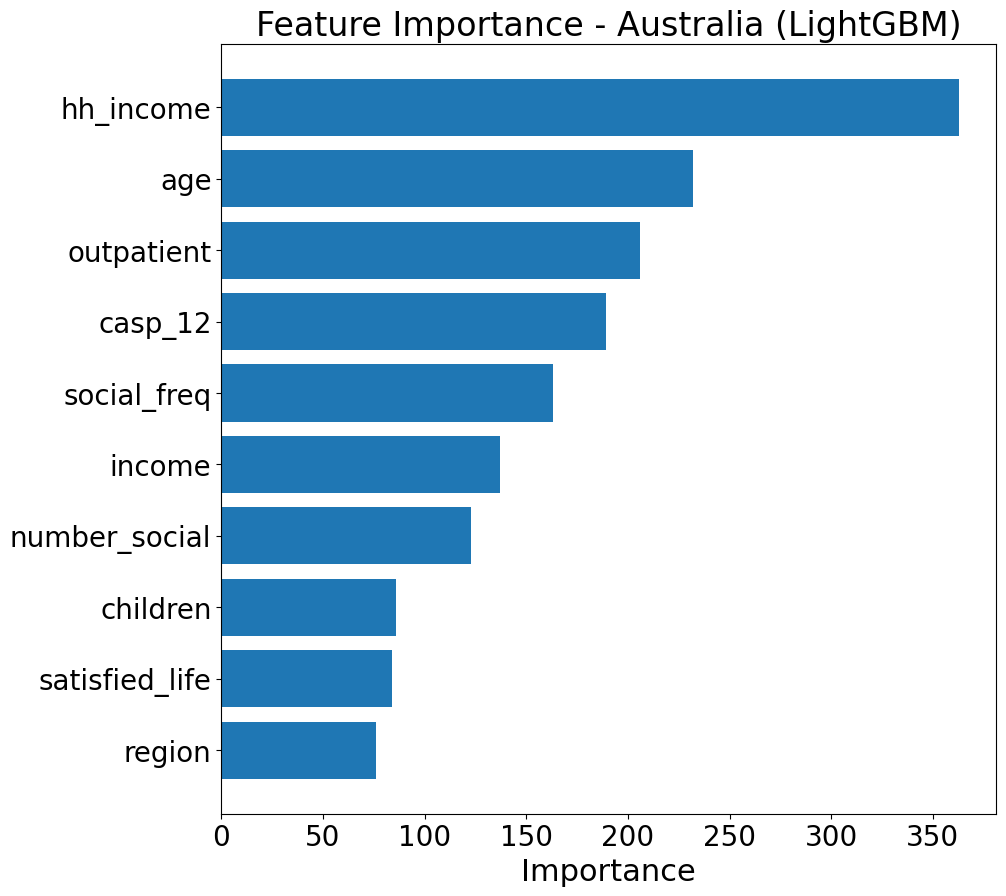

Processing Czech Republic...
Training Random Forest for Czech Republic...
Feature importance table saved as: mammogram_feature_importance_Czech Republic_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Czech Republic_Random Forest.png


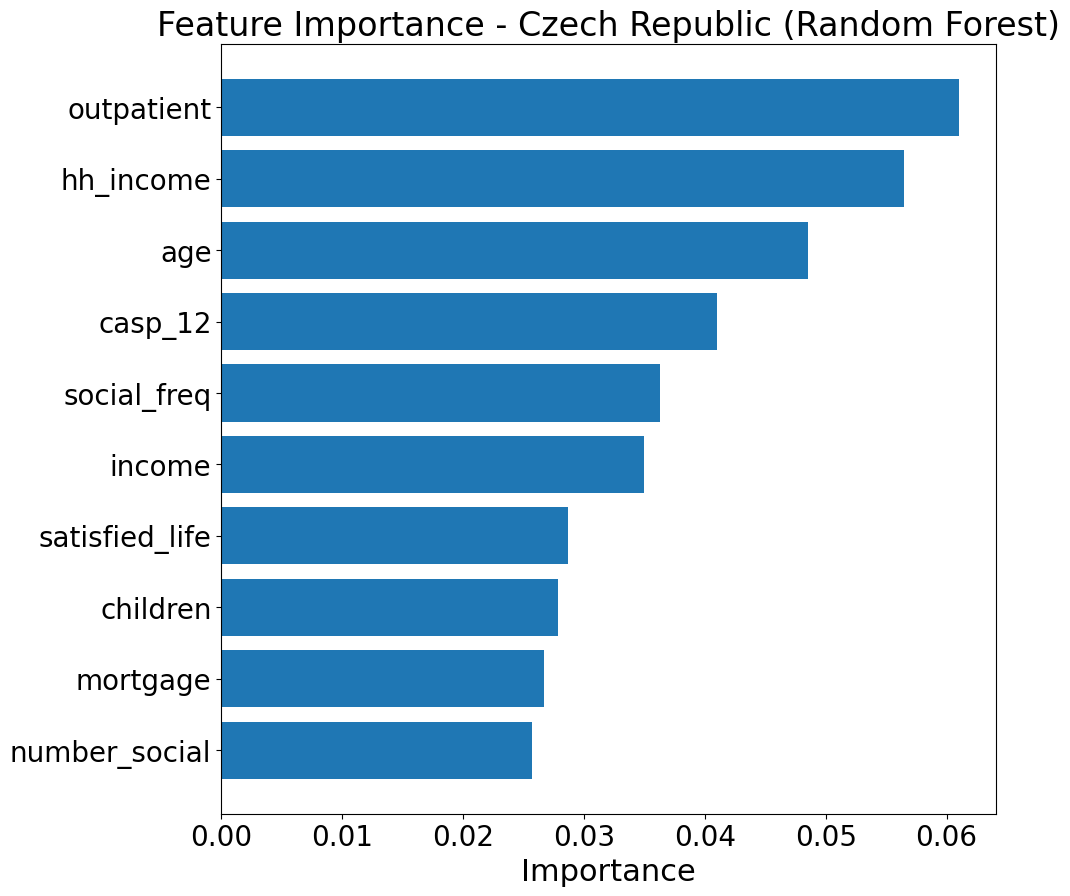

Training XGBoost for Czech Republic...
Feature importance table saved as: mammogram_feature_importance_Czech Republic_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Czech Republic_XGBoost.png


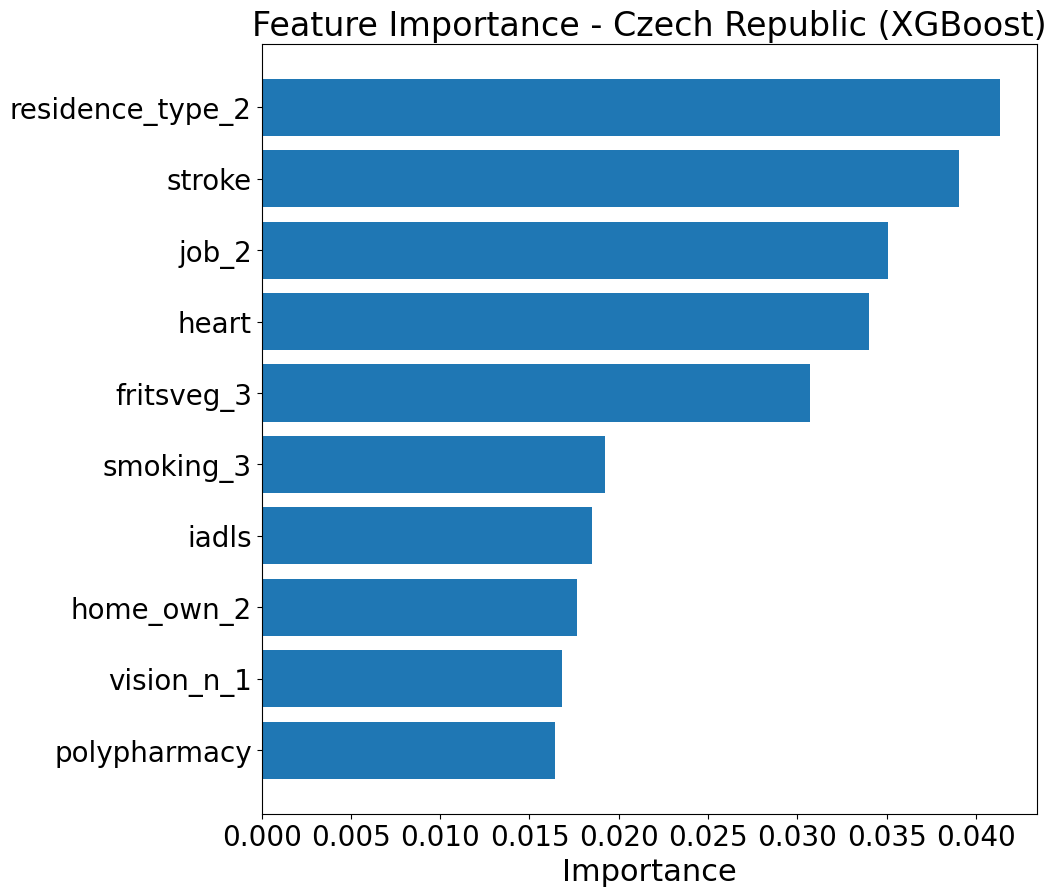

Training Gradient Boosting for Czech Republic...
Feature importance table saved as: mammogram_feature_importance_Czech Republic_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Czech Republic_Gradient Boosting.png


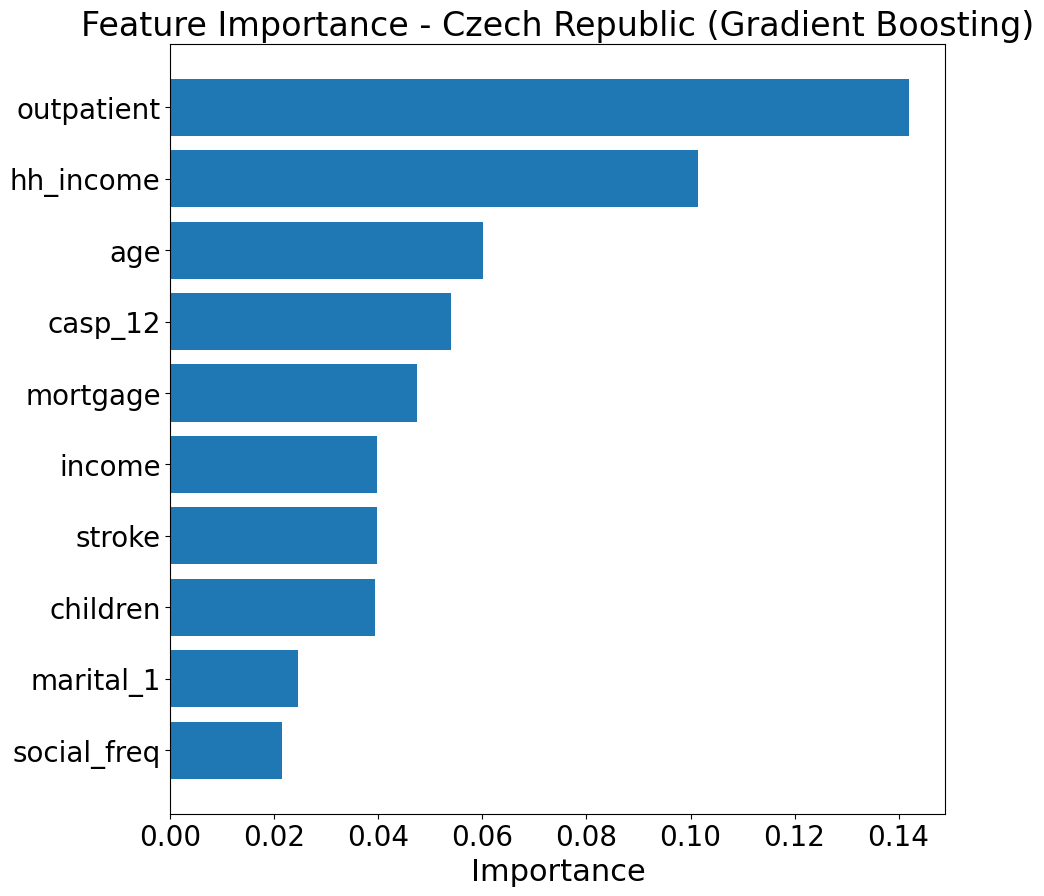

Training LightGBM for Czech Republic...
Feature importance table saved as: mammogram_feature_importance_Czech Republic_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Czech Republic_LightGBM.png


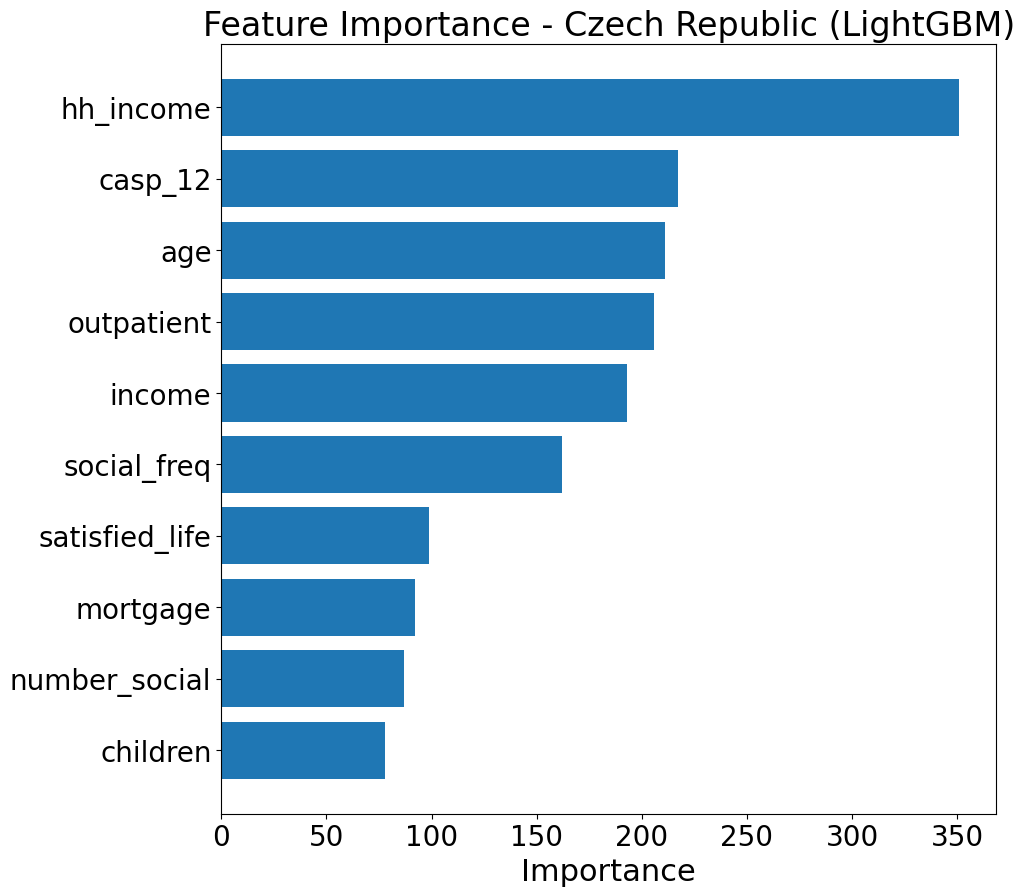

Processing Greece...
Training Random Forest for Greece...
Feature importance table saved as: mammogram_feature_importance_Greece_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Greece_Random Forest.png


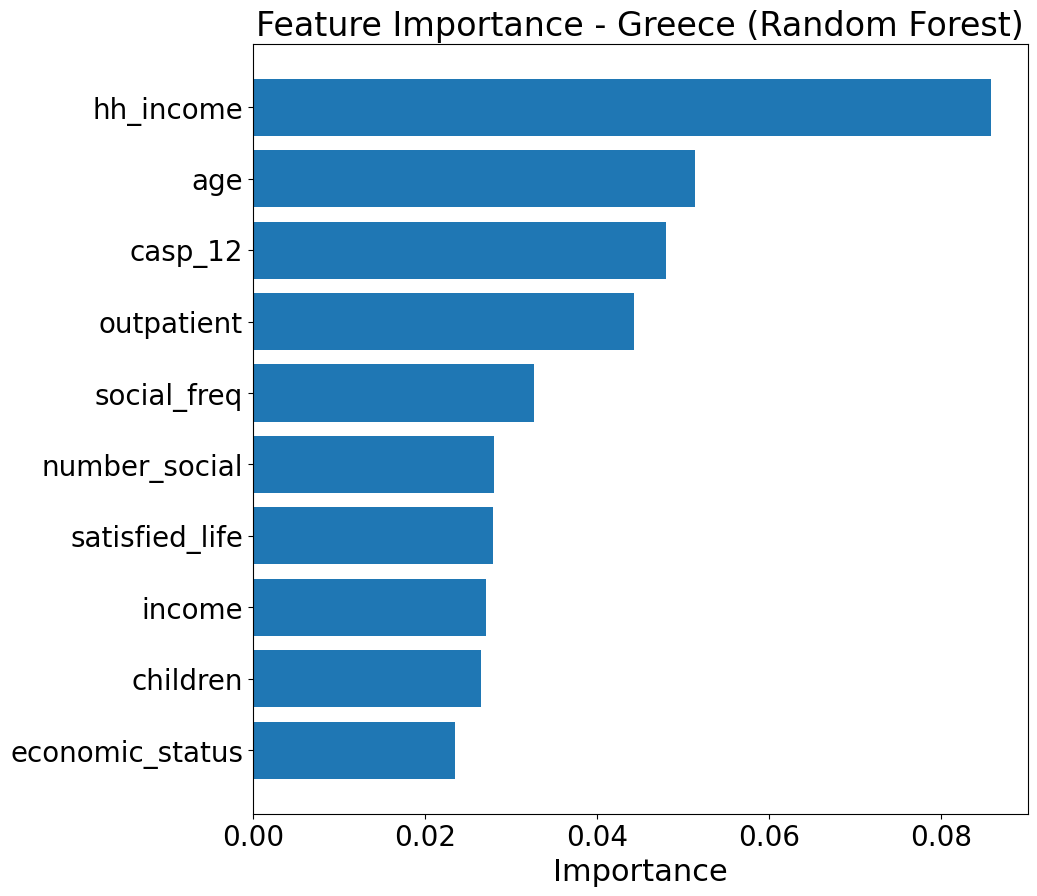

Training XGBoost for Greece...
Feature importance table saved as: mammogram_feature_importance_Greece_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Greece_XGBoost.png


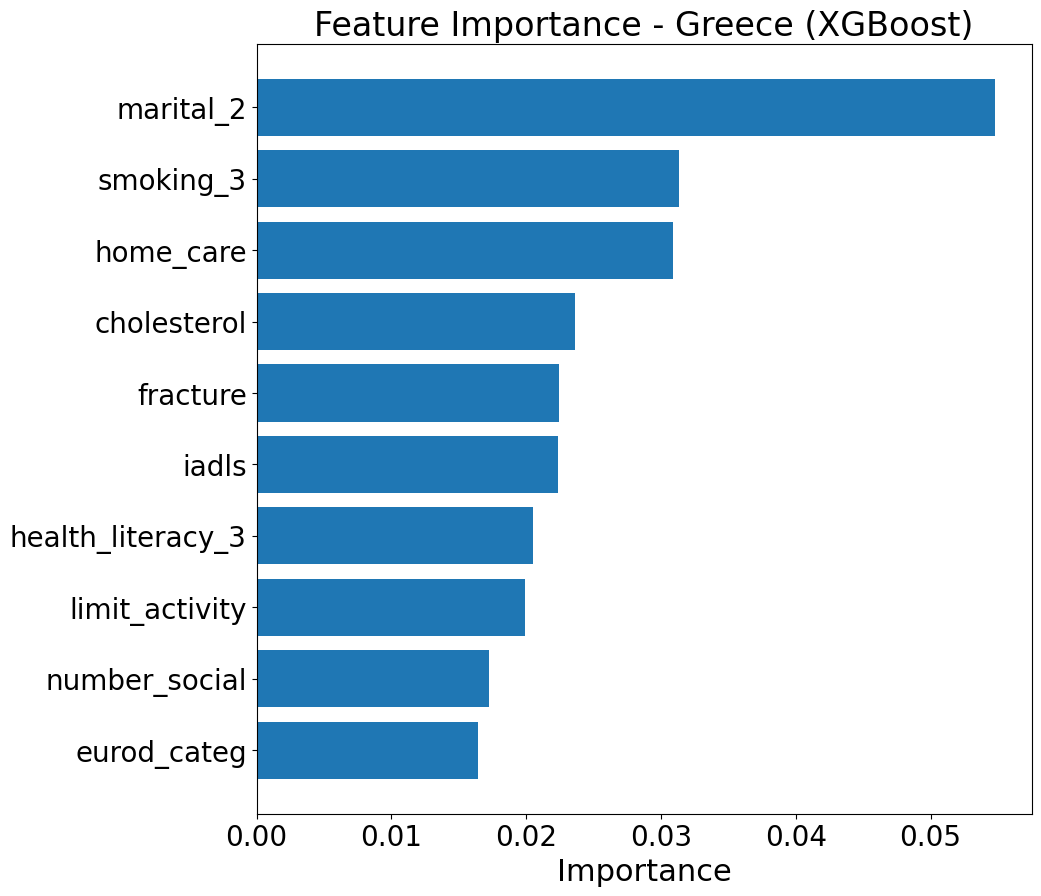

Training Gradient Boosting for Greece...
Feature importance table saved as: mammogram_feature_importance_Greece_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Greece_Gradient Boosting.png


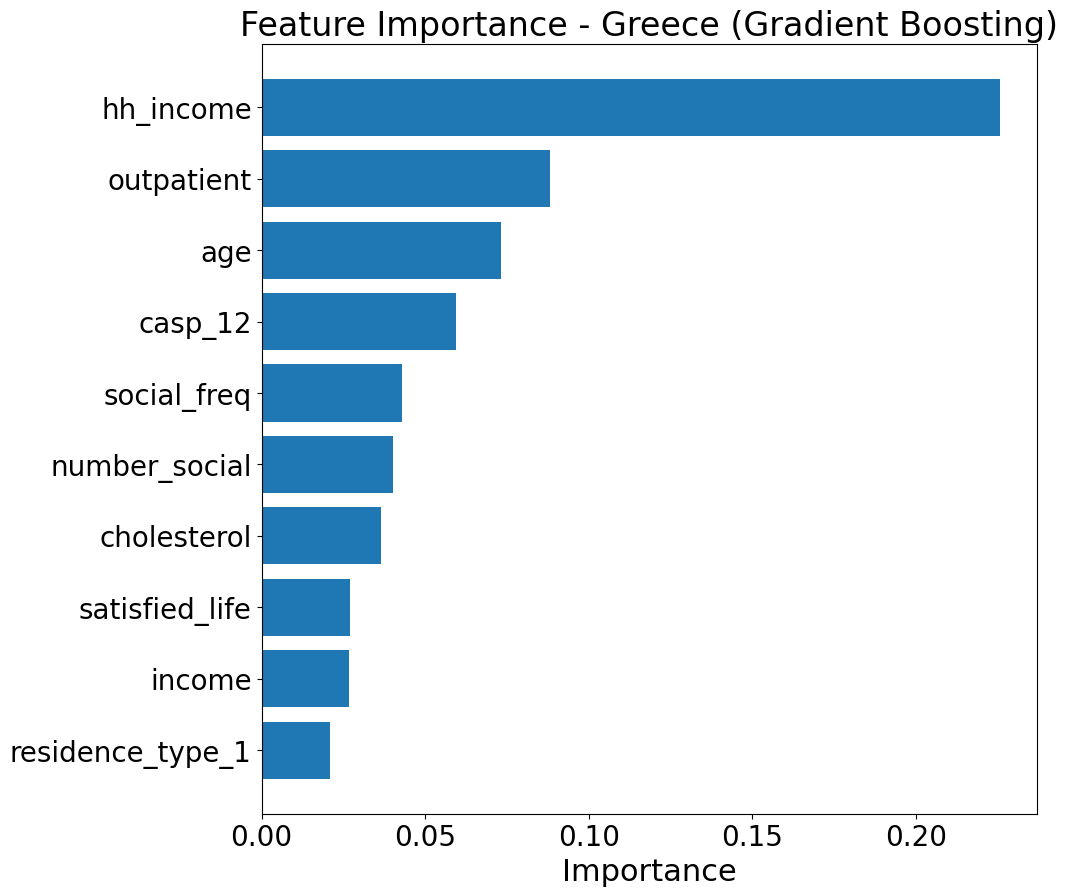

Training LightGBM for Greece...
Feature importance table saved as: mammogram_feature_importance_Greece_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Greece_LightGBM.png


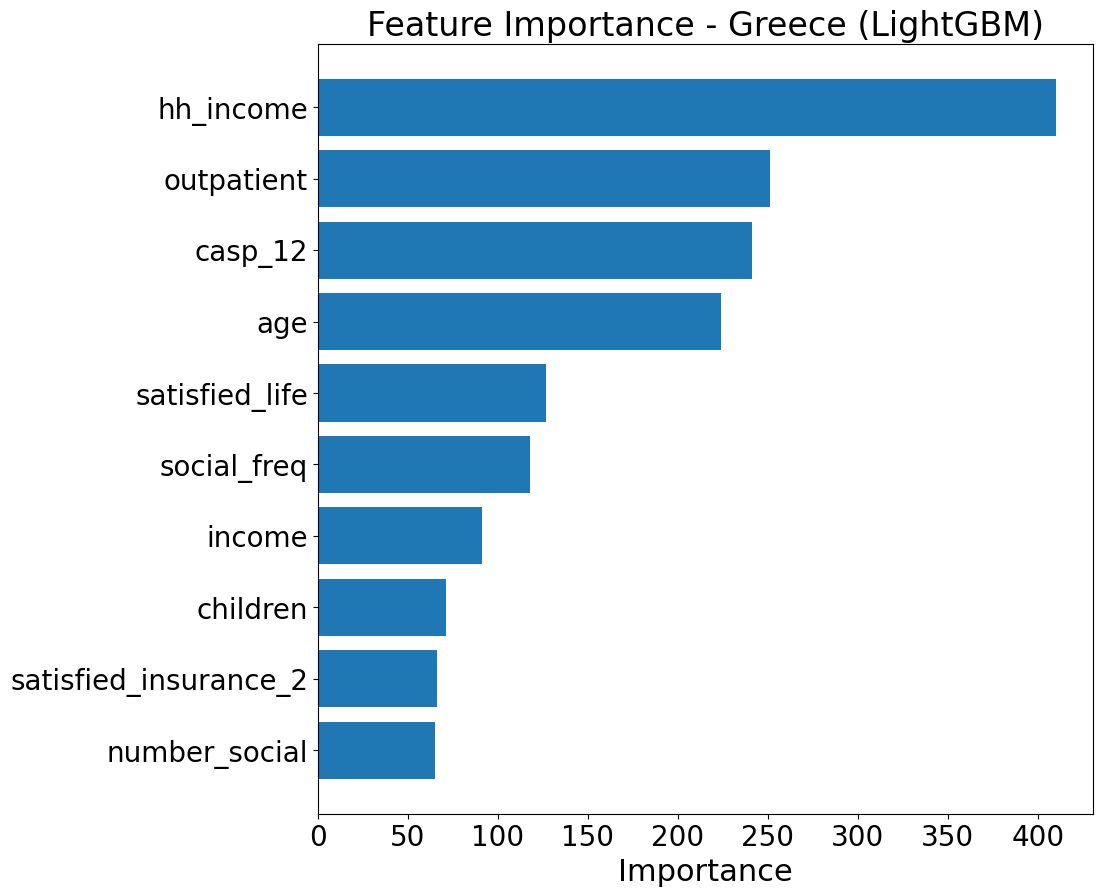

Processing France...
Training Random Forest for France...
Feature importance table saved as: mammogram_feature_importance_France_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_France_Random Forest.png


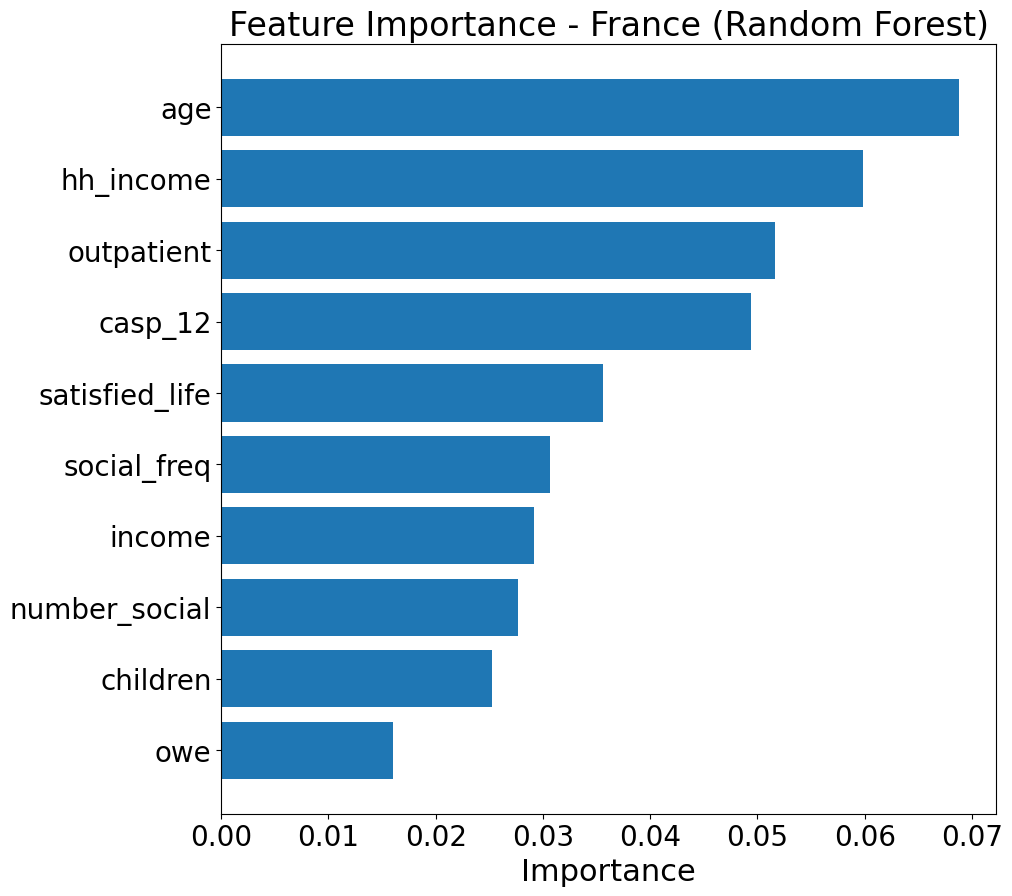

Training XGBoost for France...
Feature importance table saved as: mammogram_feature_importance_France_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_France_XGBoost.png


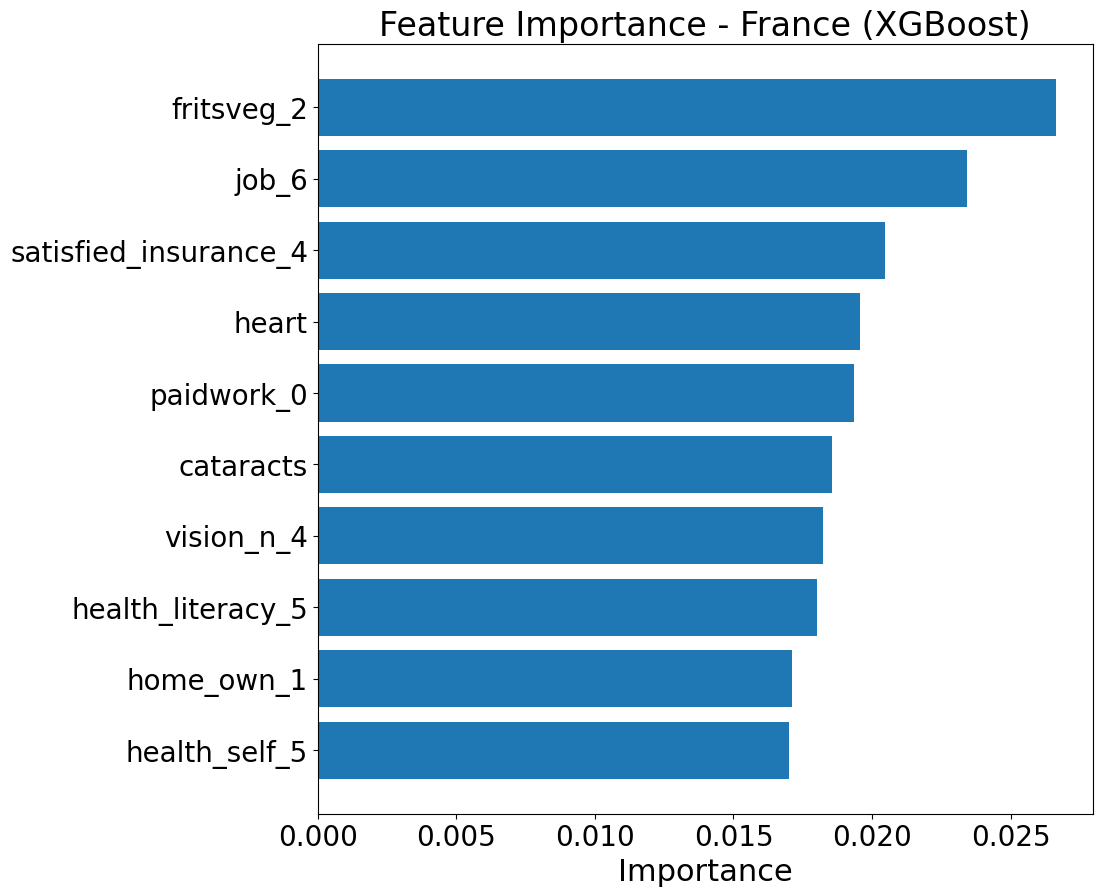

Training Gradient Boosting for France...
Feature importance table saved as: mammogram_feature_importance_France_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_France_Gradient Boosting.png


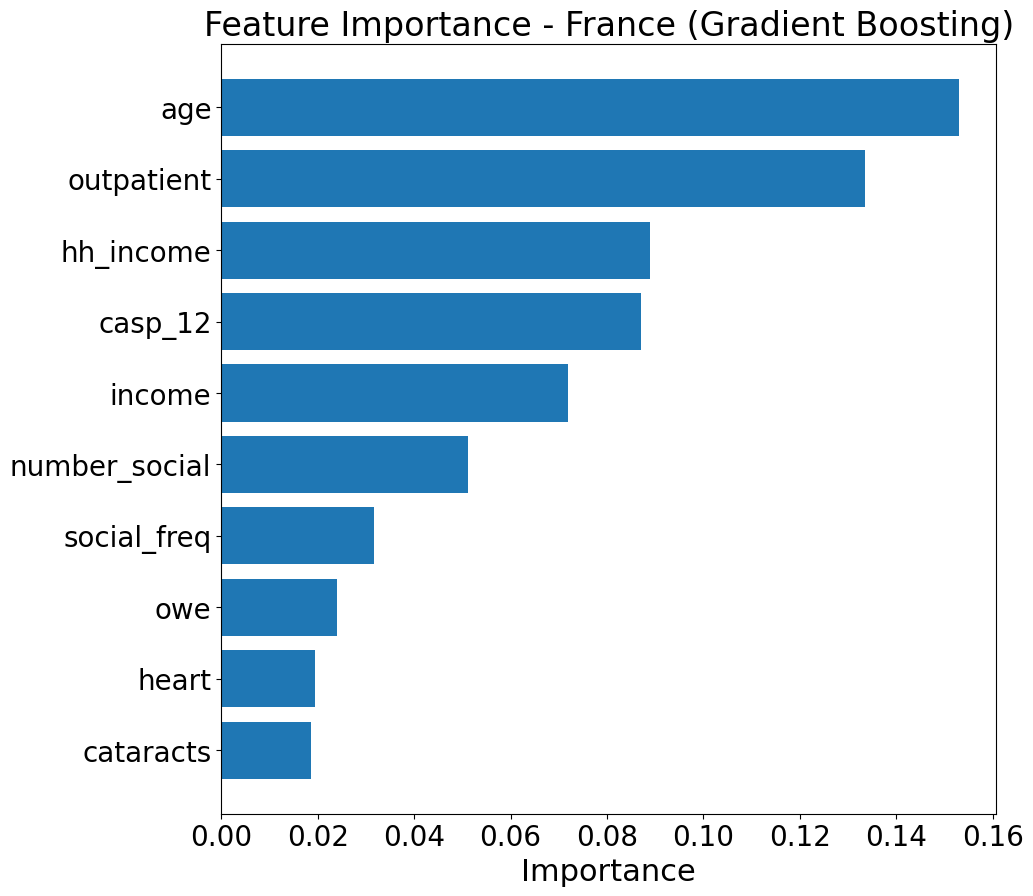

Training LightGBM for France...
Feature importance table saved as: mammogram_feature_importance_France_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_France_LightGBM.png


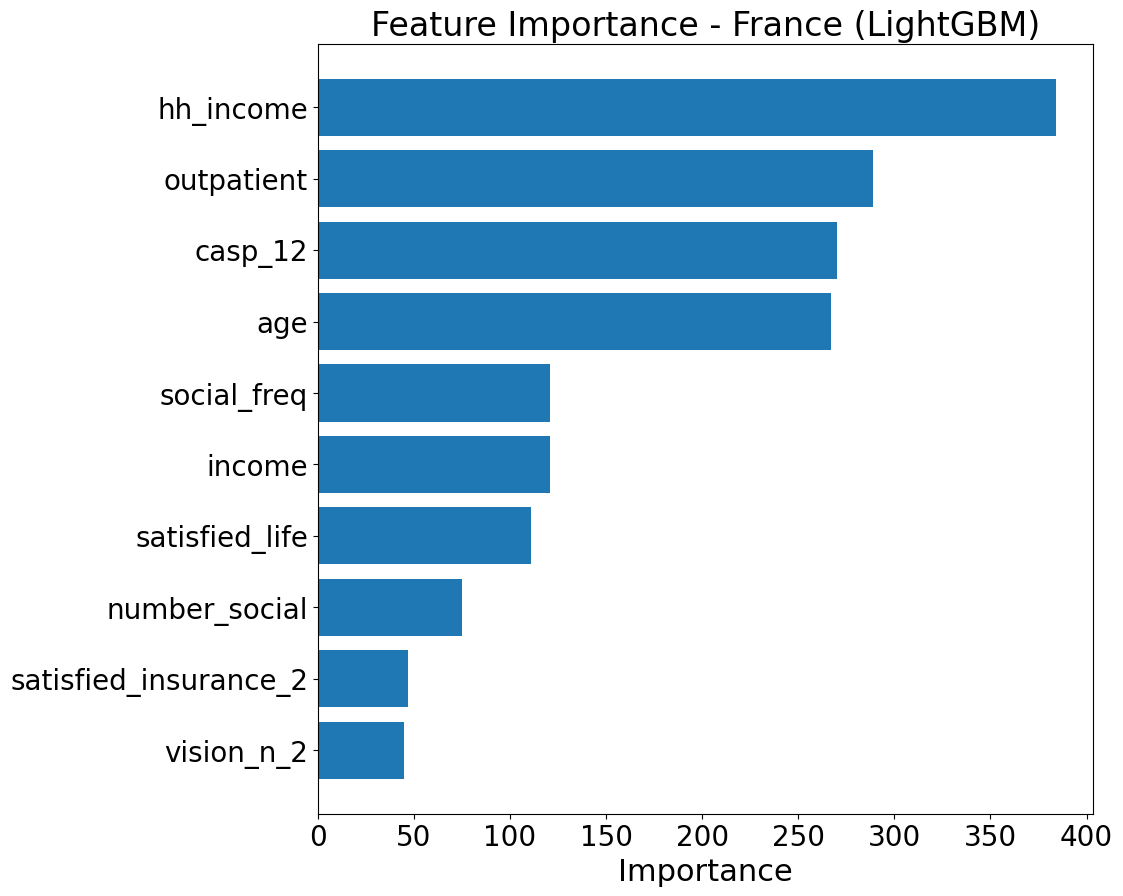

Processing Denmark...
Training Random Forest for Denmark...
Feature importance table saved as: mammogram_feature_importance_Denmark_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Denmark_Random Forest.png


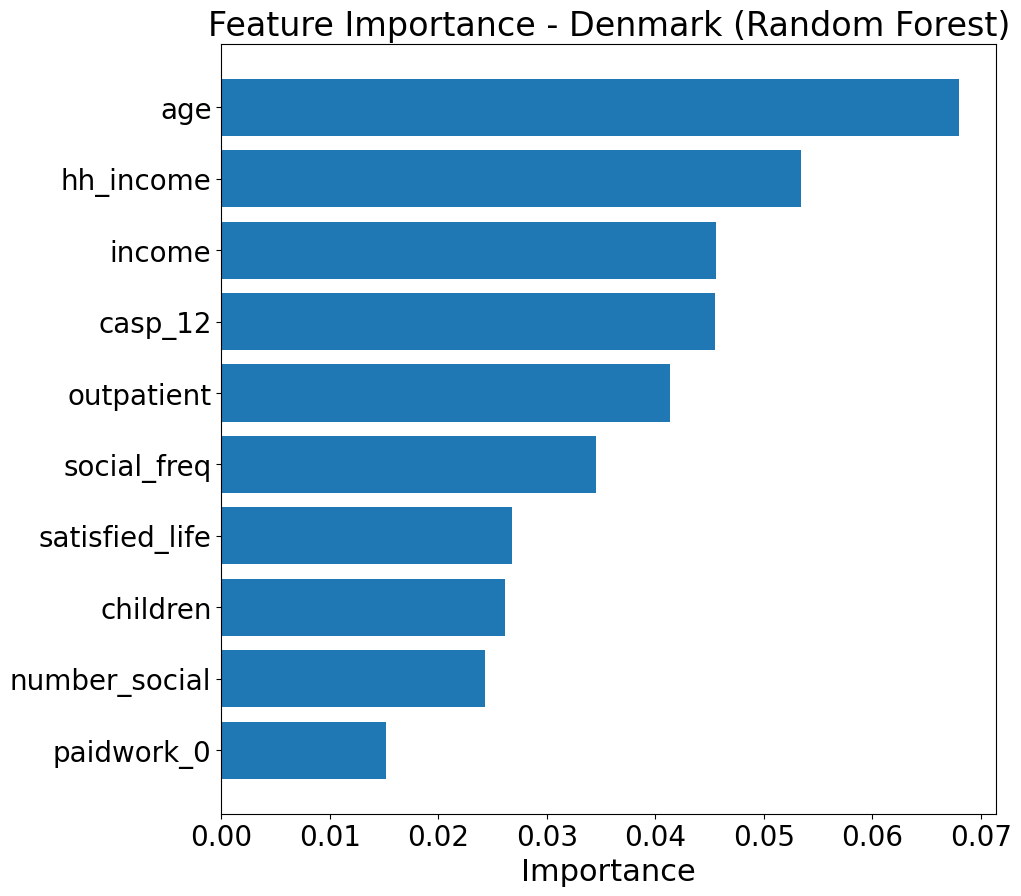

Training XGBoost for Denmark...
Feature importance table saved as: mammogram_feature_importance_Denmark_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Denmark_XGBoost.png


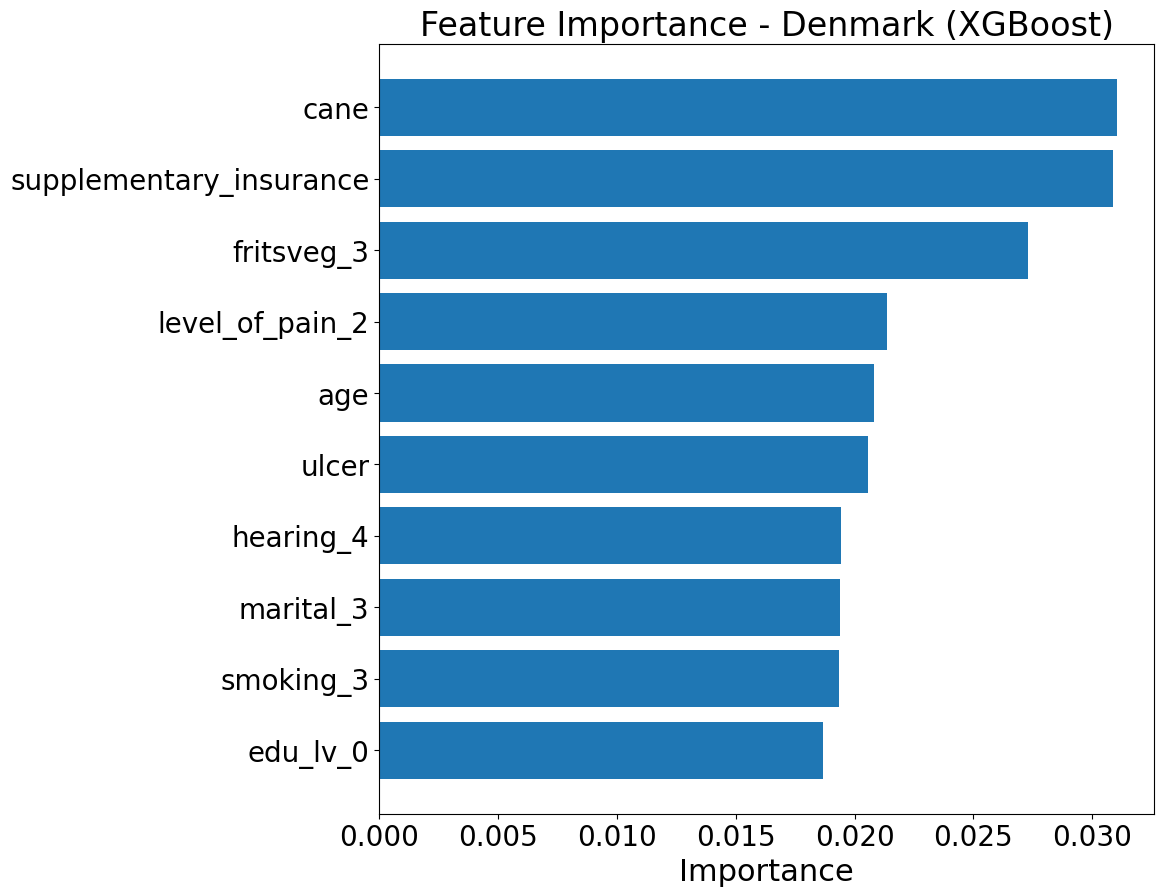

Training Gradient Boosting for Denmark...
Feature importance table saved as: mammogram_feature_importance_Denmark_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Denmark_Gradient Boosting.png


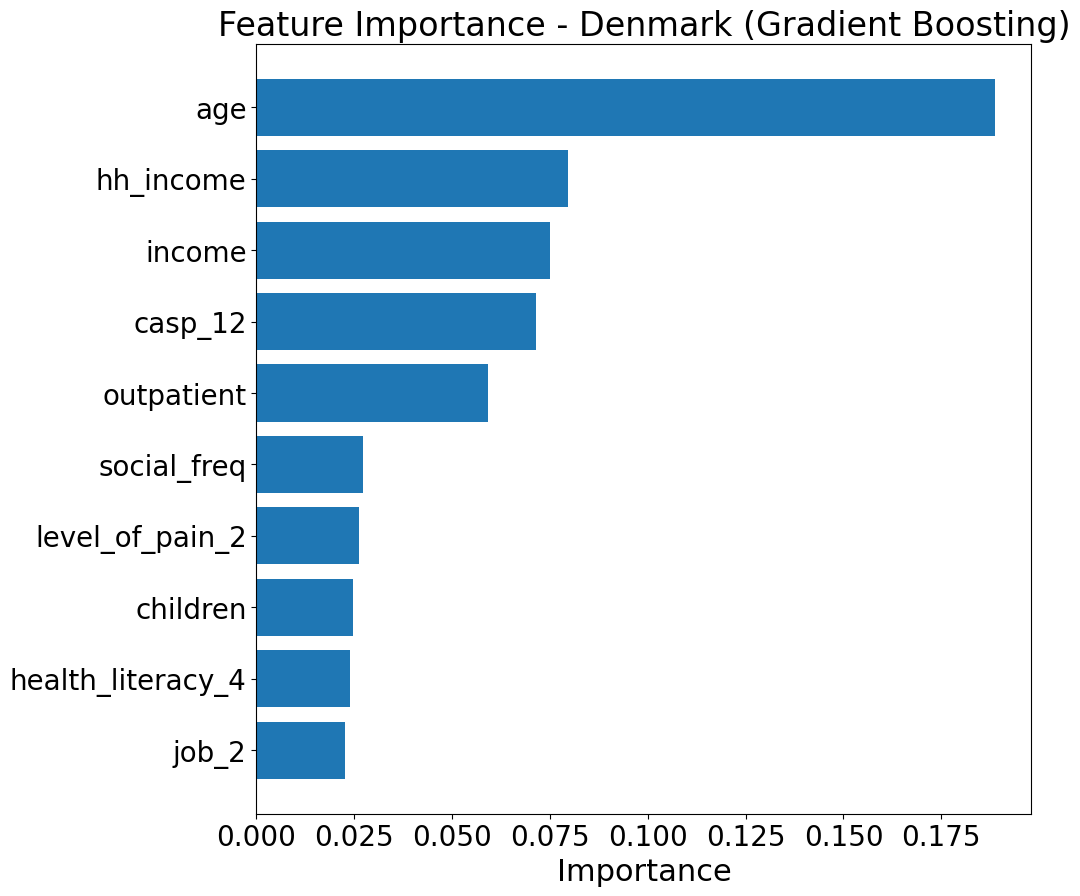

Training LightGBM for Denmark...
Feature importance table saved as: mammogram_feature_importance_Denmark_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Denmark_LightGBM.png


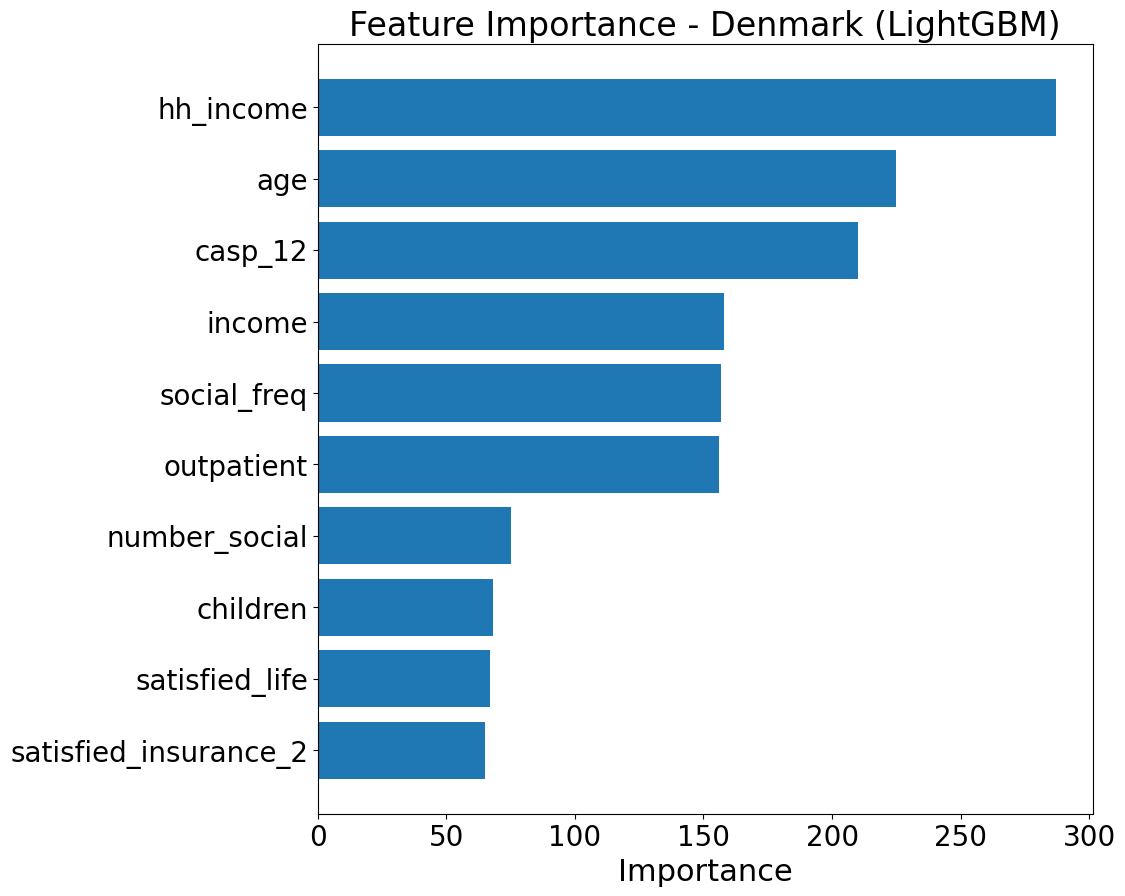

Processing Spain...
Training Random Forest for Spain...
Feature importance table saved as: mammogram_feature_importance_Spain_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Spain_Random Forest.png


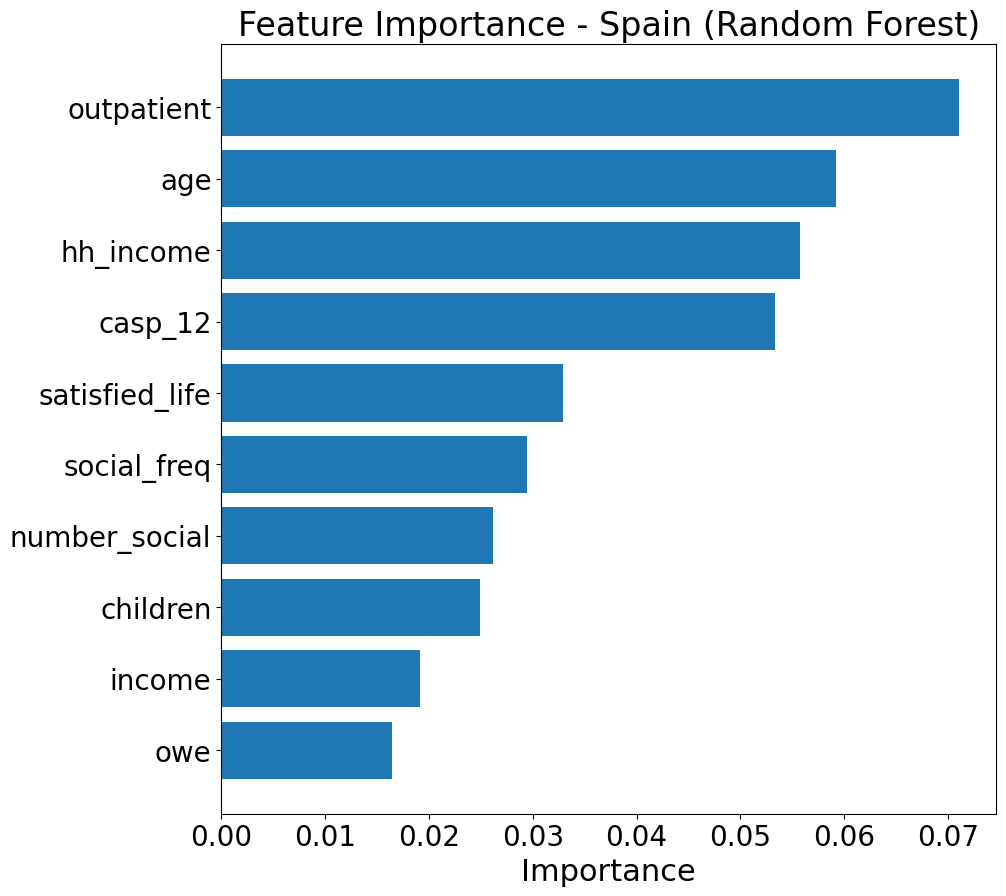

Training XGBoost for Spain...
Feature importance table saved as: mammogram_feature_importance_Spain_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Spain_XGBoost.png


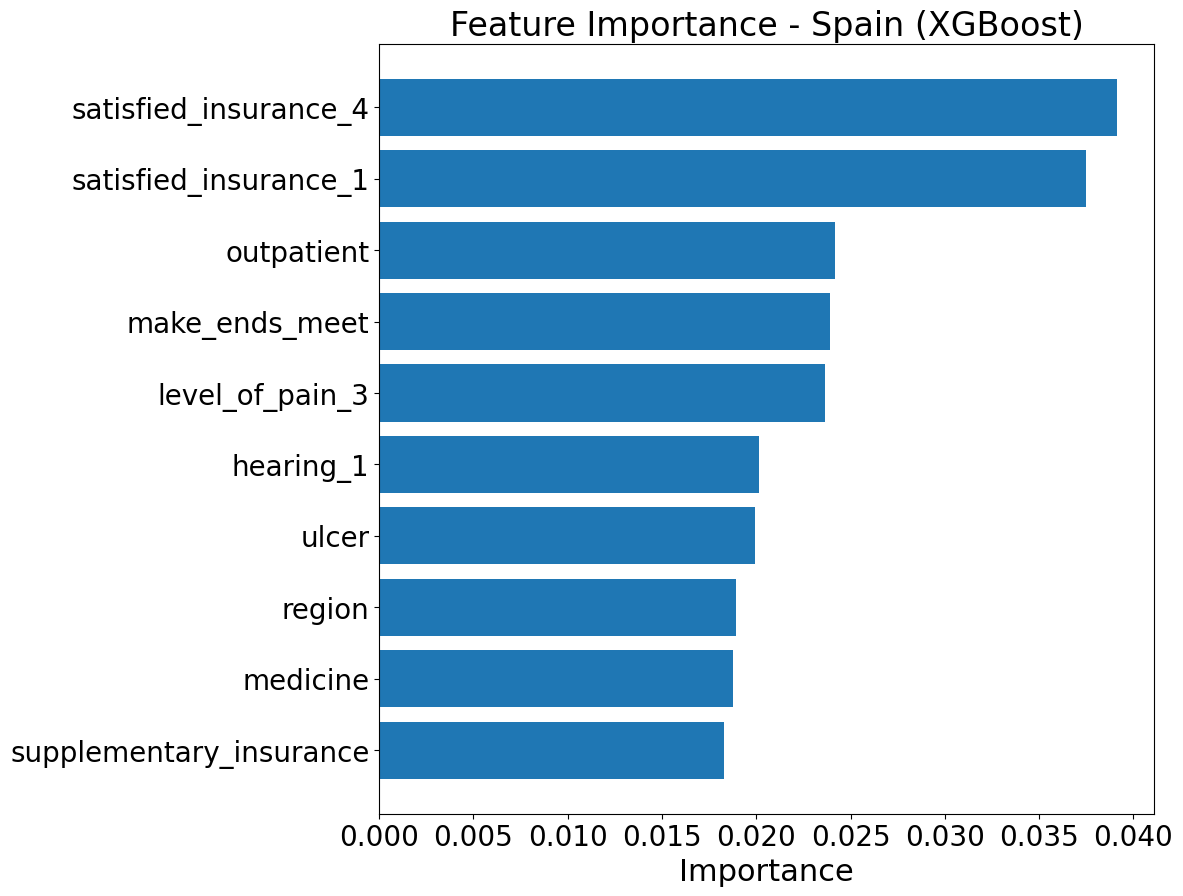

Training Gradient Boosting for Spain...
Feature importance table saved as: mammogram_feature_importance_Spain_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Spain_Gradient Boosting.png


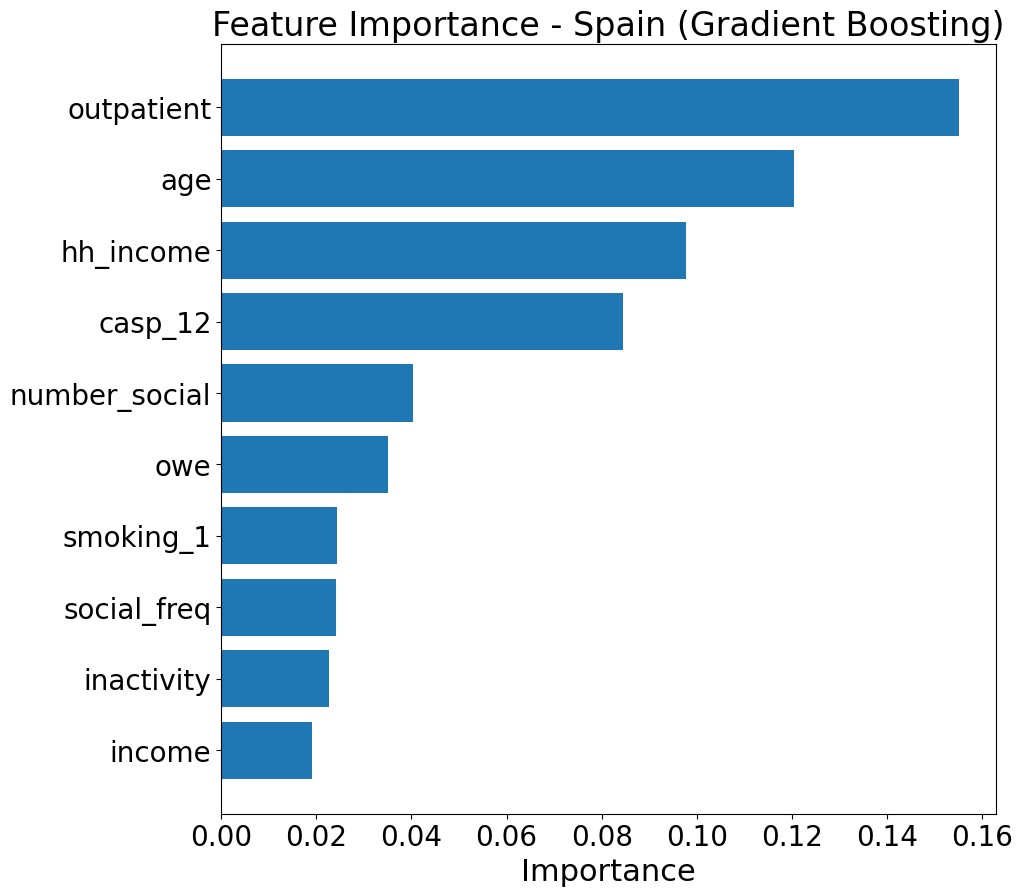

Training LightGBM for Spain...
Feature importance table saved as: mammogram_feature_importance_Spain_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Spain_LightGBM.png


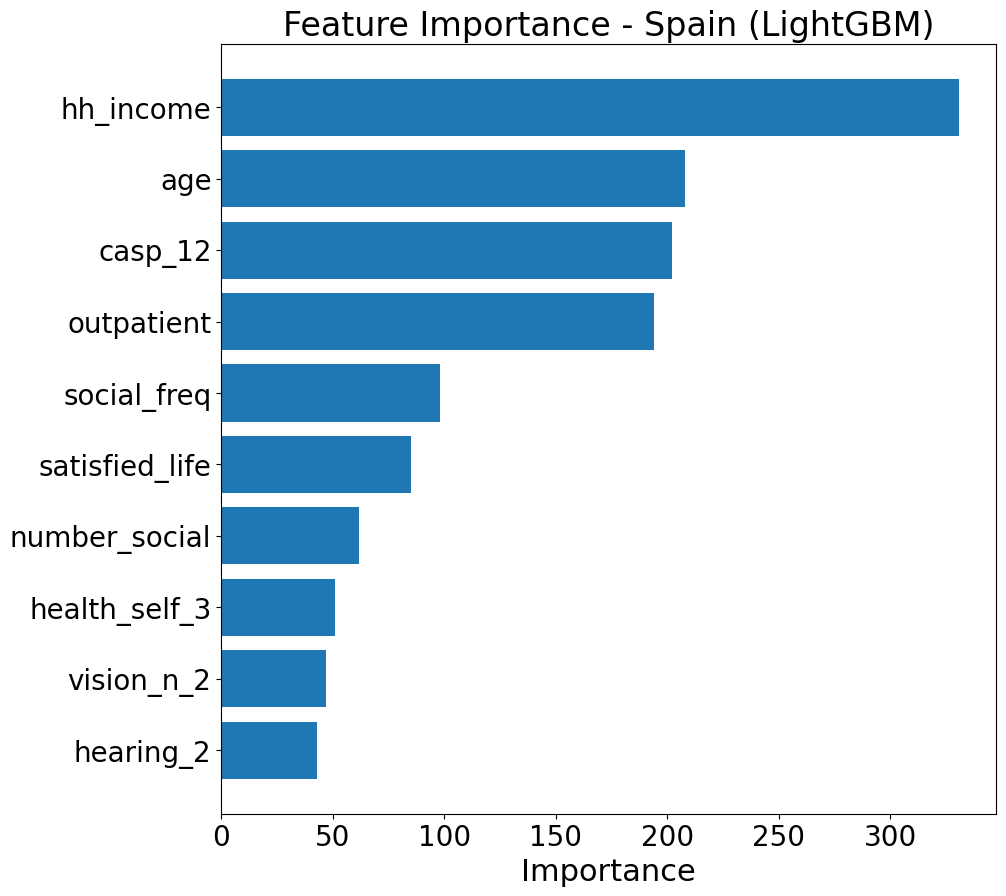

Processing Switzerland...
Training Random Forest for Switzerland...
Feature importance table saved as: mammogram_feature_importance_Switzerland_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Switzerland_Random Forest.png


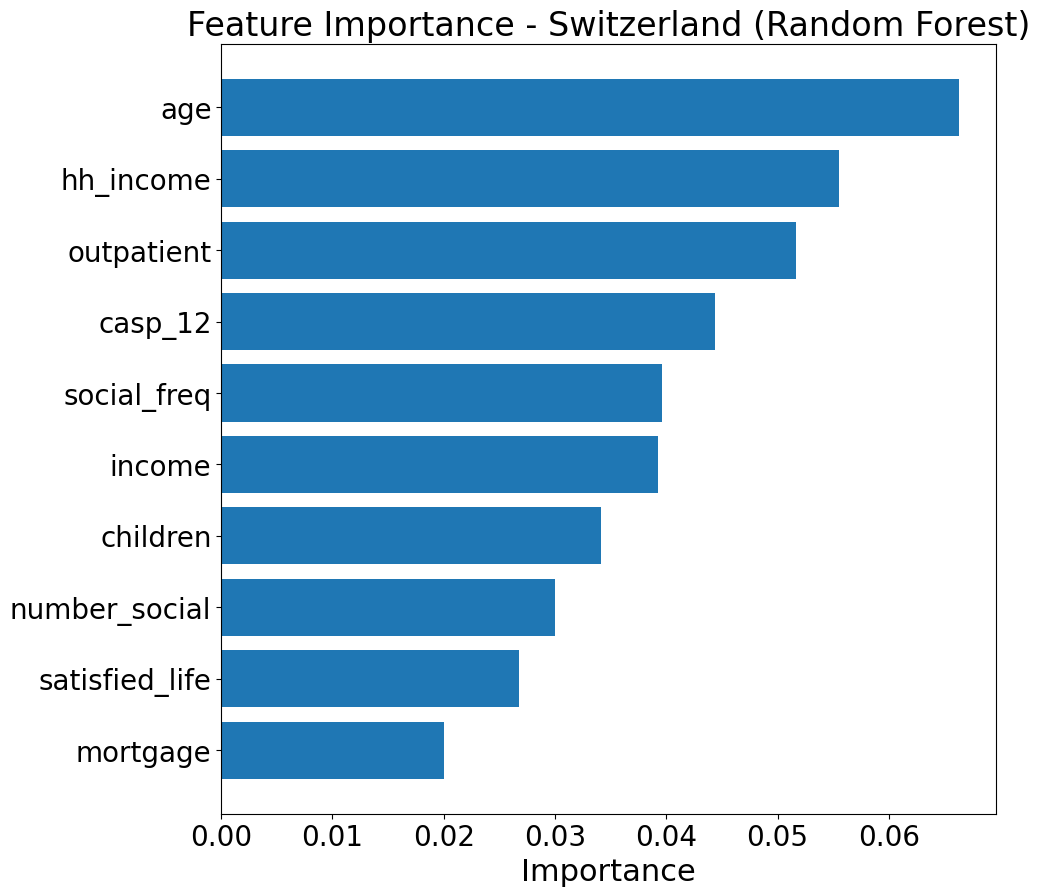

Training XGBoost for Switzerland...
Feature importance table saved as: mammogram_feature_importance_Switzerland_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Switzerland_XGBoost.png


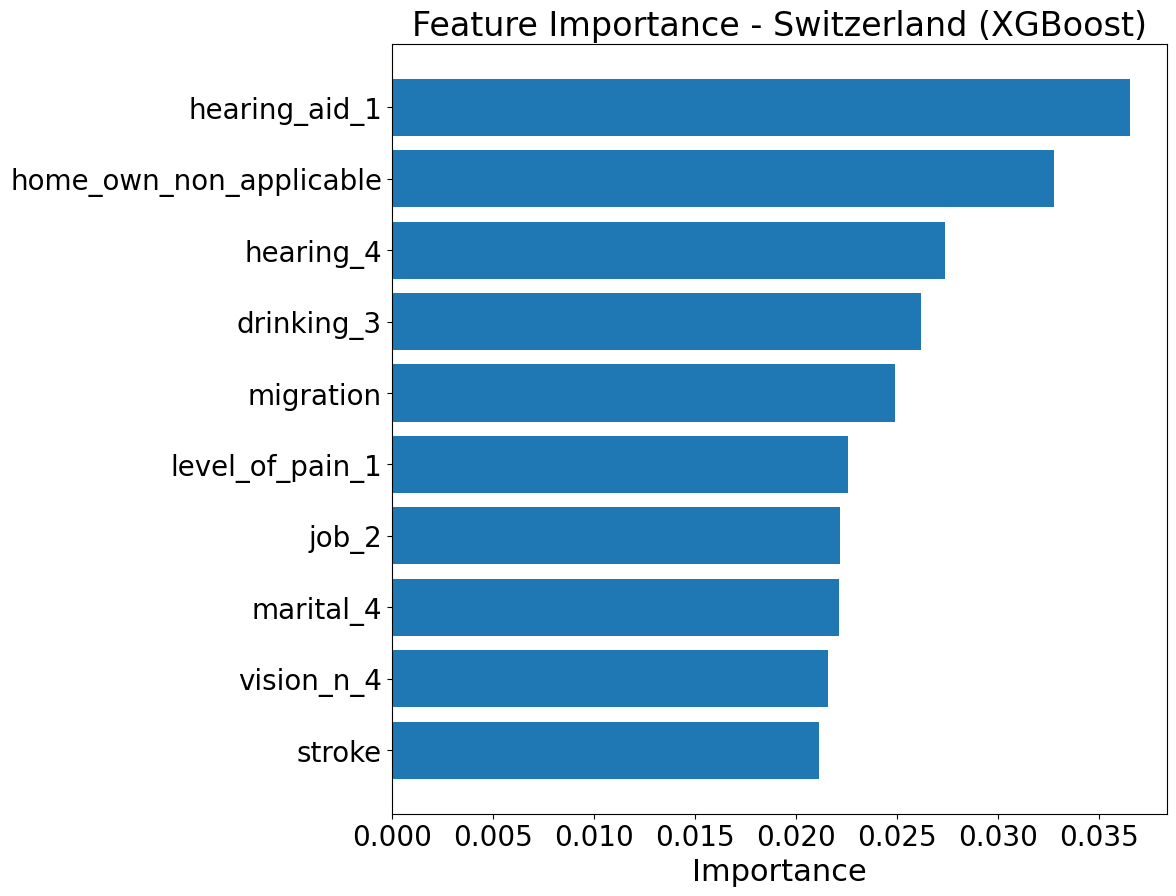

Training Gradient Boosting for Switzerland...
Feature importance table saved as: mammogram_feature_importance_Switzerland_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Switzerland_Gradient Boosting.png


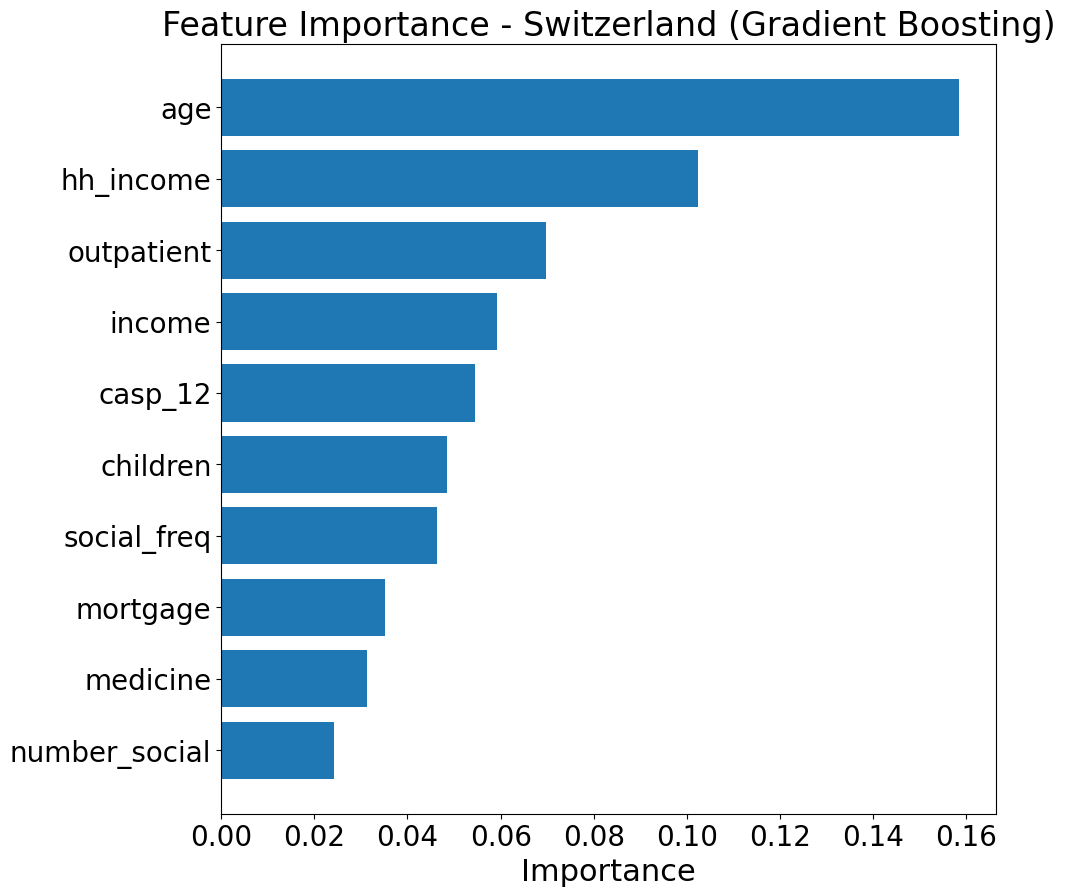

Training LightGBM for Switzerland...
Feature importance table saved as: mammogram_feature_importance_Switzerland_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Switzerland_LightGBM.png


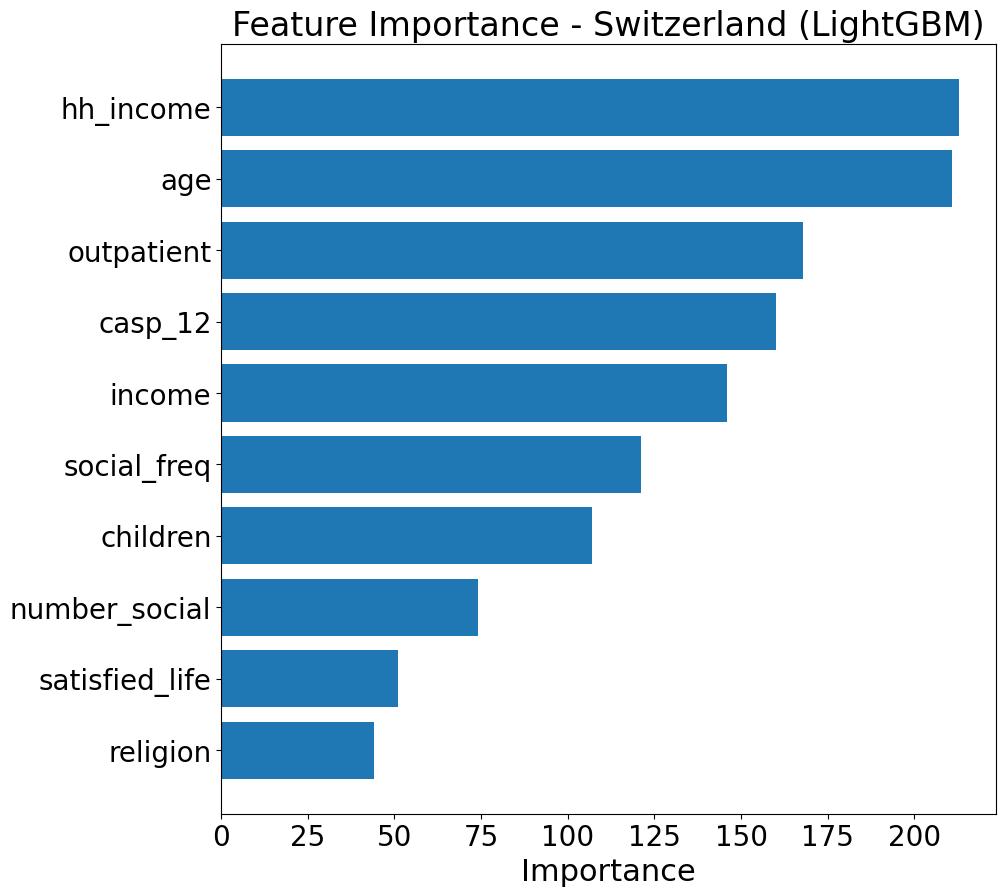

Processing Hungary...
Training Random Forest for Hungary...
Feature importance table saved as: mammogram_feature_importance_Hungary_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Hungary_Random Forest.png


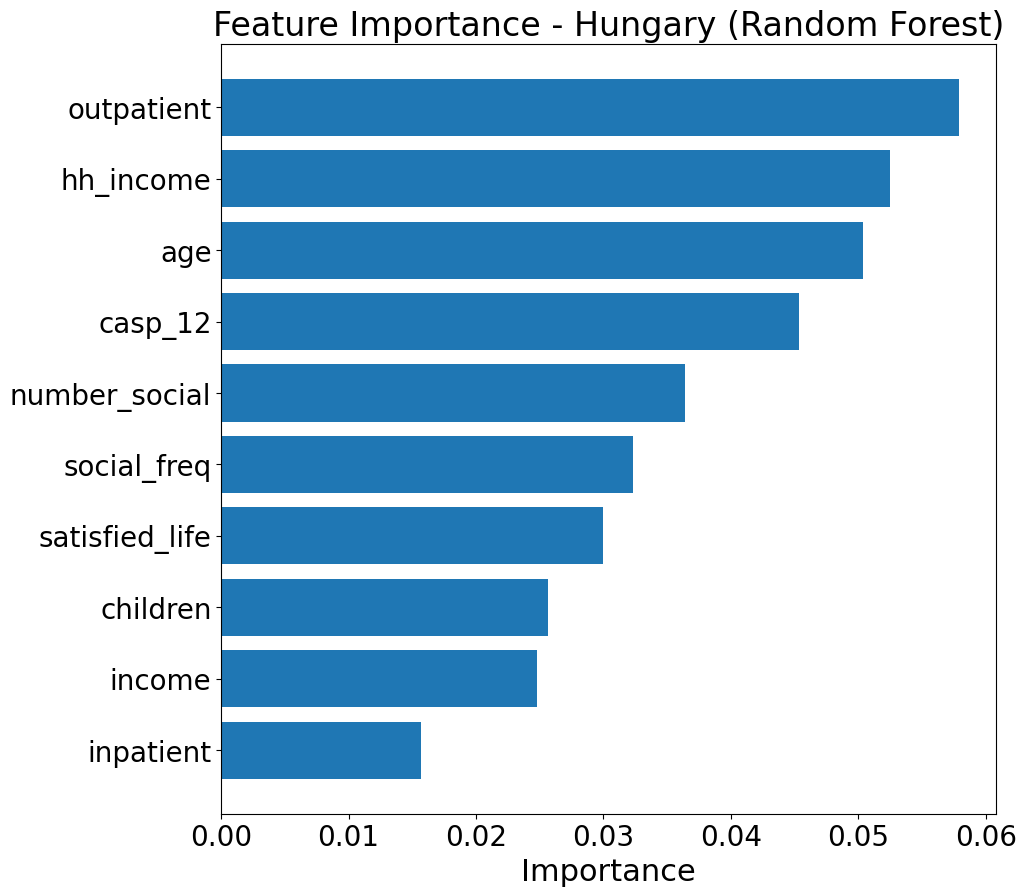

Training XGBoost for Hungary...
Feature importance table saved as: mammogram_feature_importance_Hungary_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Hungary_XGBoost.png


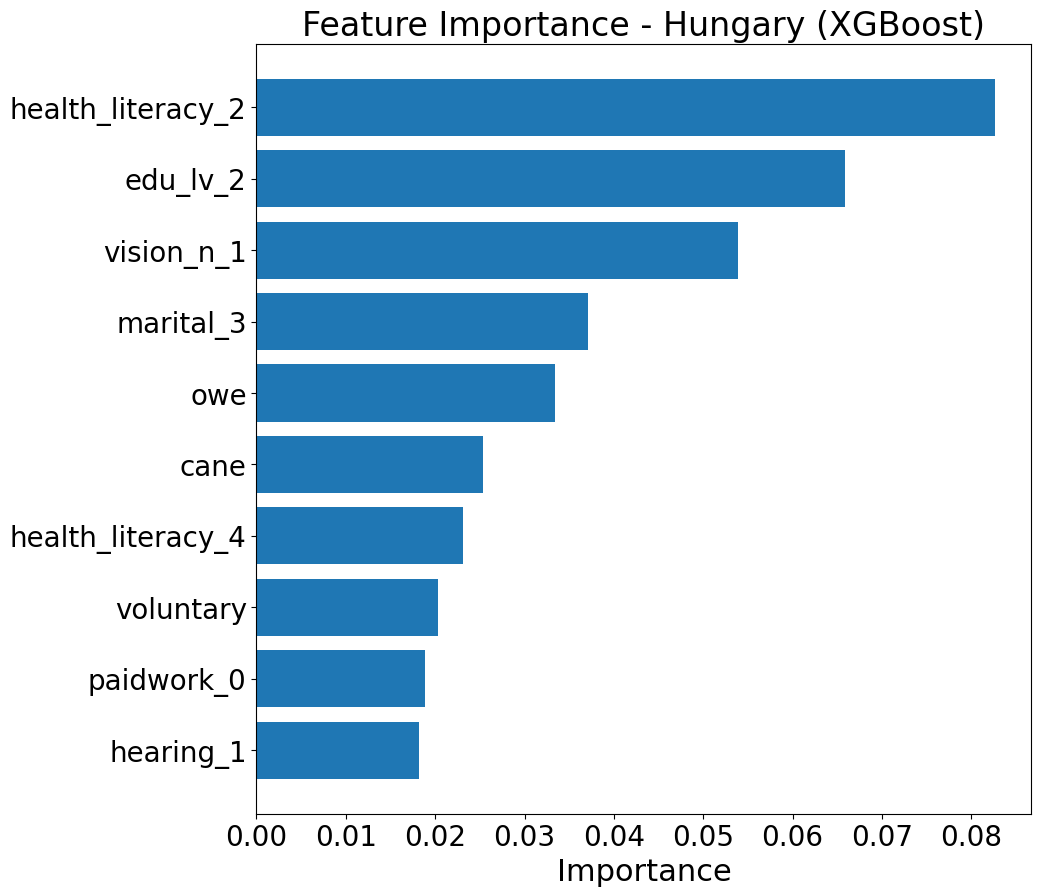

Training Gradient Boosting for Hungary...
Feature importance table saved as: mammogram_feature_importance_Hungary_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Hungary_Gradient Boosting.png


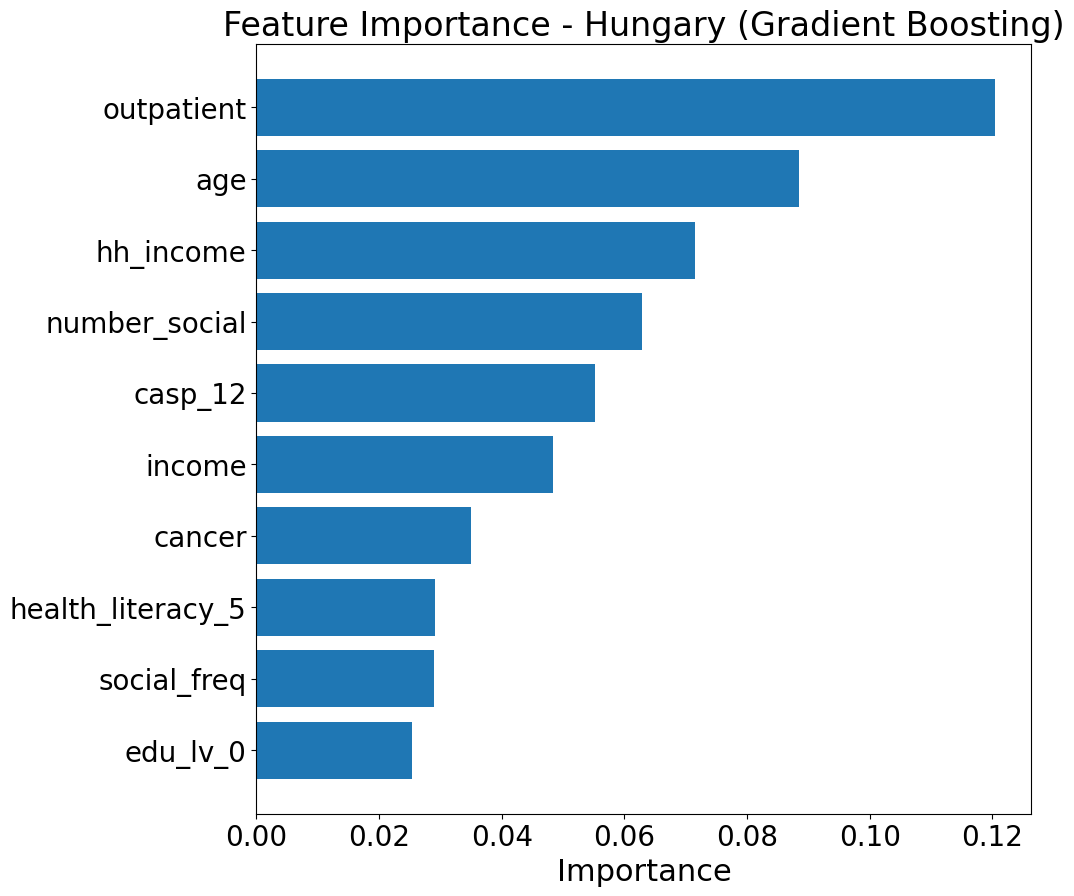

Training LightGBM for Hungary...
Feature importance table saved as: mammogram_feature_importance_Hungary_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Hungary_LightGBM.png


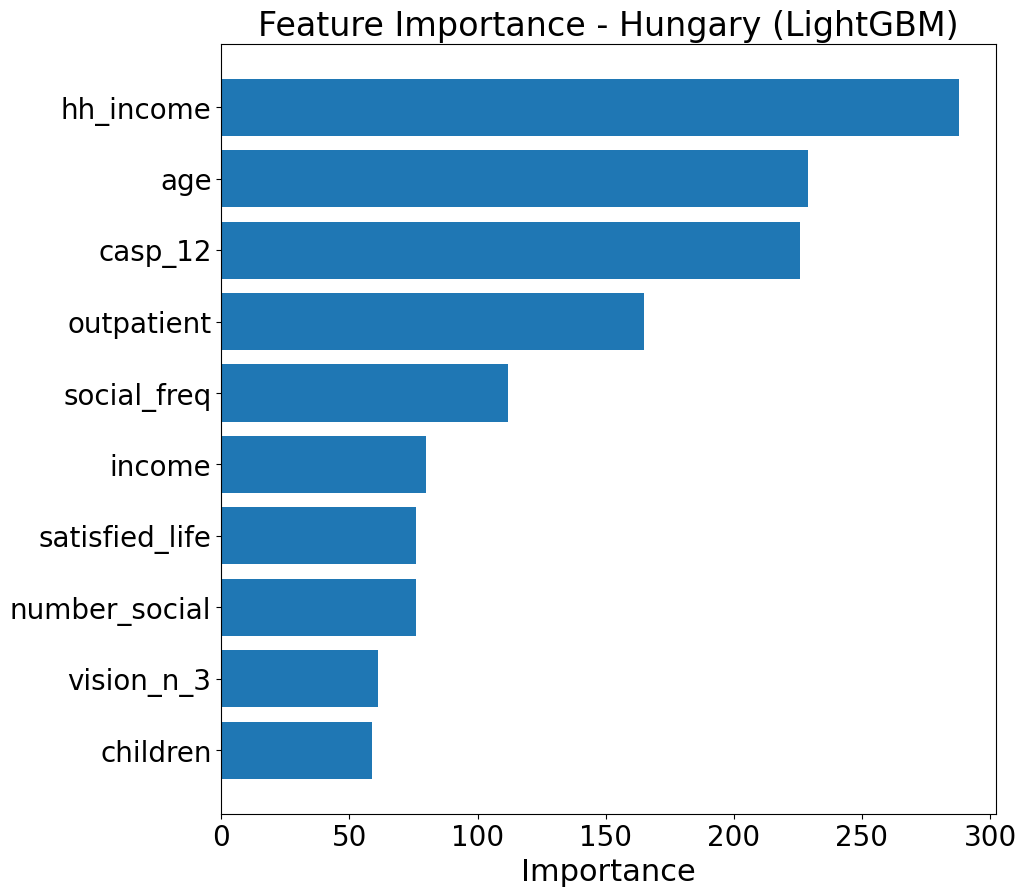

Processing Finland...
Training Random Forest for Finland...
Feature importance table saved as: mammogram_feature_importance_Finland_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Finland_Random Forest.png


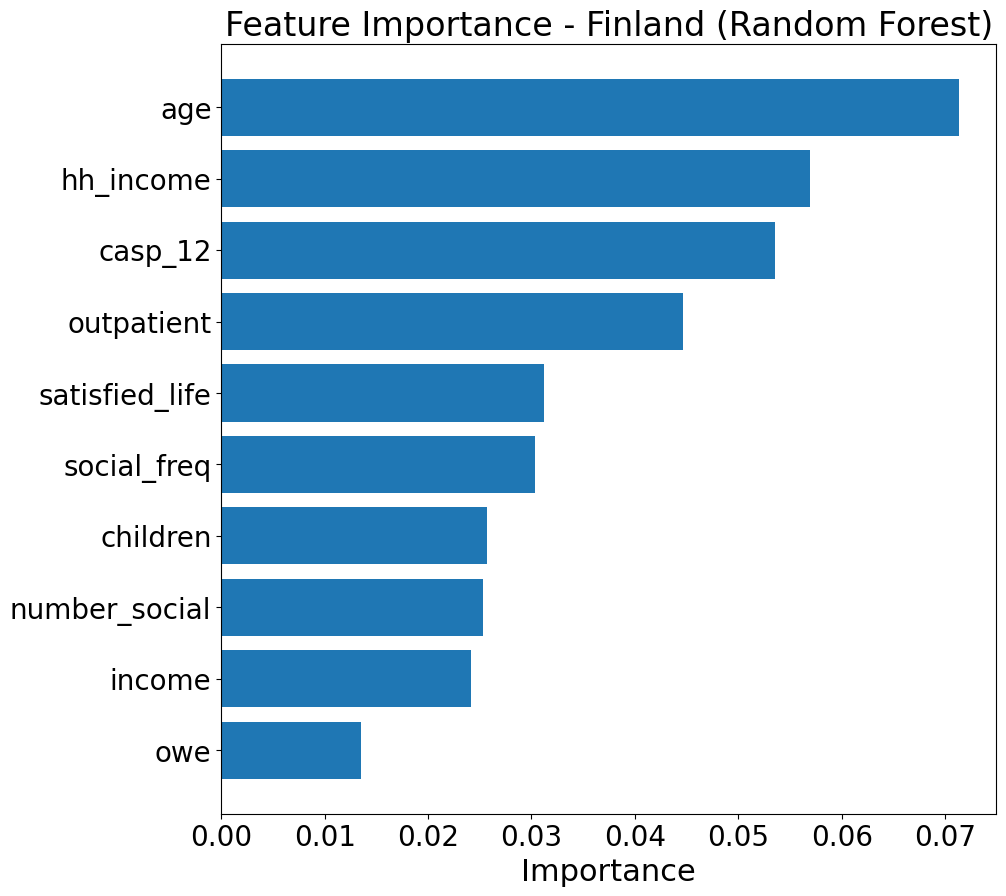

Training XGBoost for Finland...
Feature importance table saved as: mammogram_feature_importance_Finland_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Finland_XGBoost.png


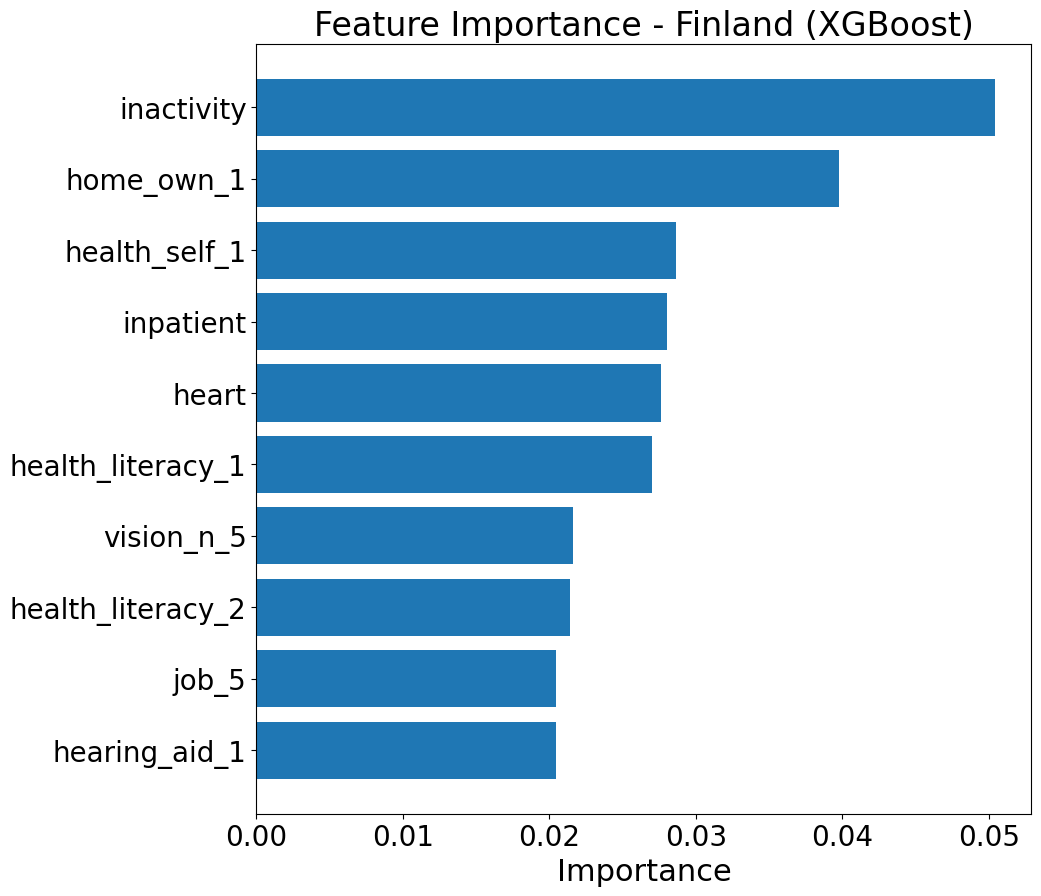

Training Gradient Boosting for Finland...
Feature importance table saved as: mammogram_feature_importance_Finland_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Finland_Gradient Boosting.png


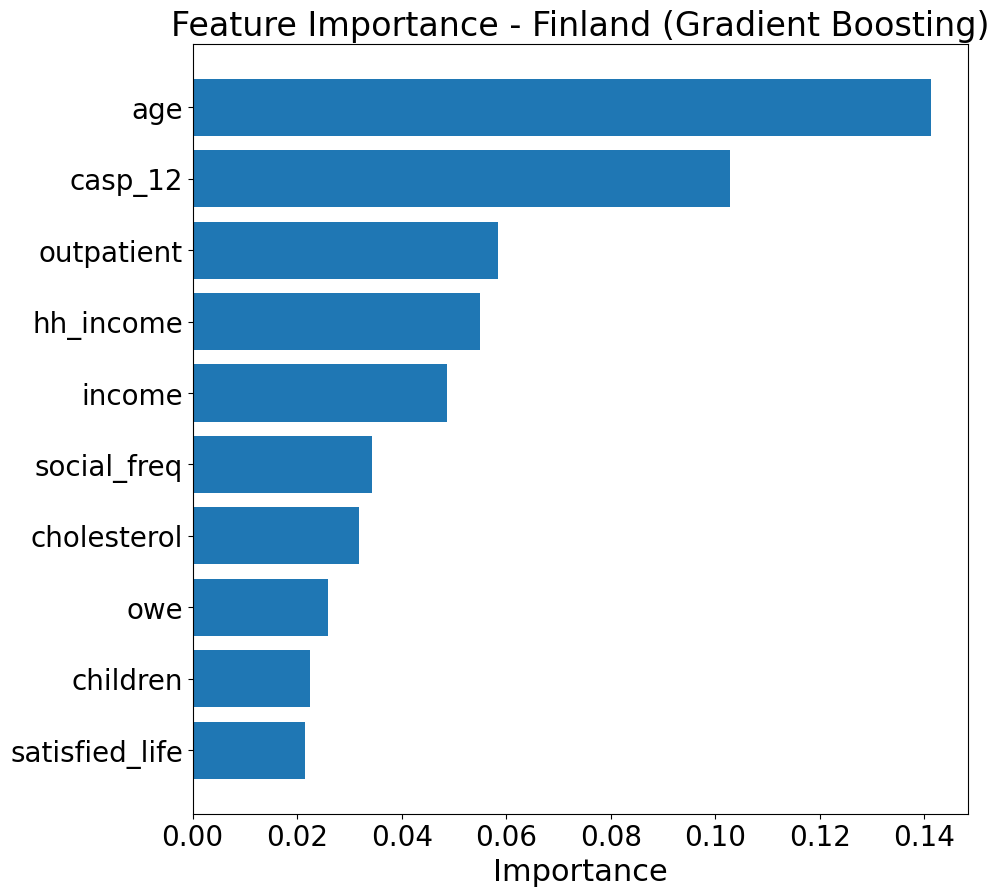

Training LightGBM for Finland...
Feature importance table saved as: mammogram_feature_importance_Finland_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Finland_LightGBM.png


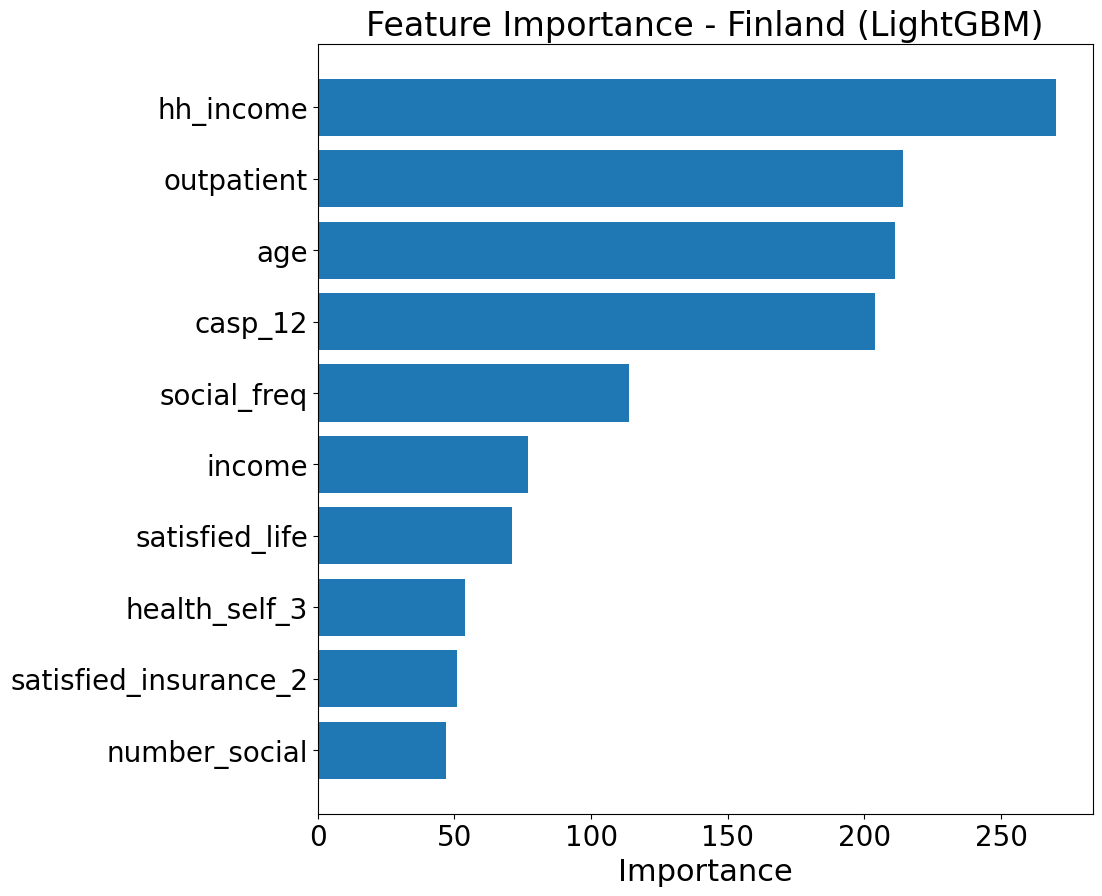

Processing Latvia...
Training Random Forest for Latvia...
Feature importance table saved as: mammogram_feature_importance_Latvia_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Latvia_Random Forest.png


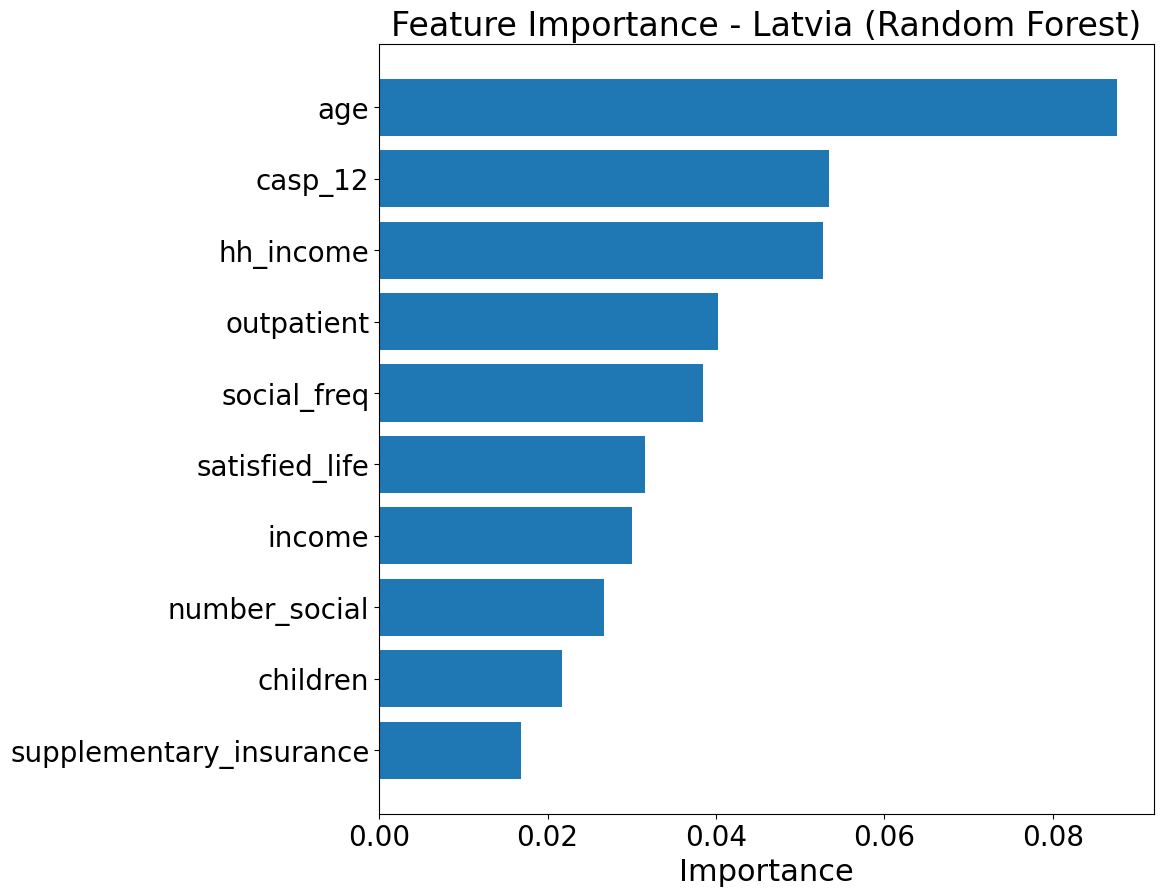

Training XGBoost for Latvia...
Feature importance table saved as: mammogram_feature_importance_Latvia_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Latvia_XGBoost.png


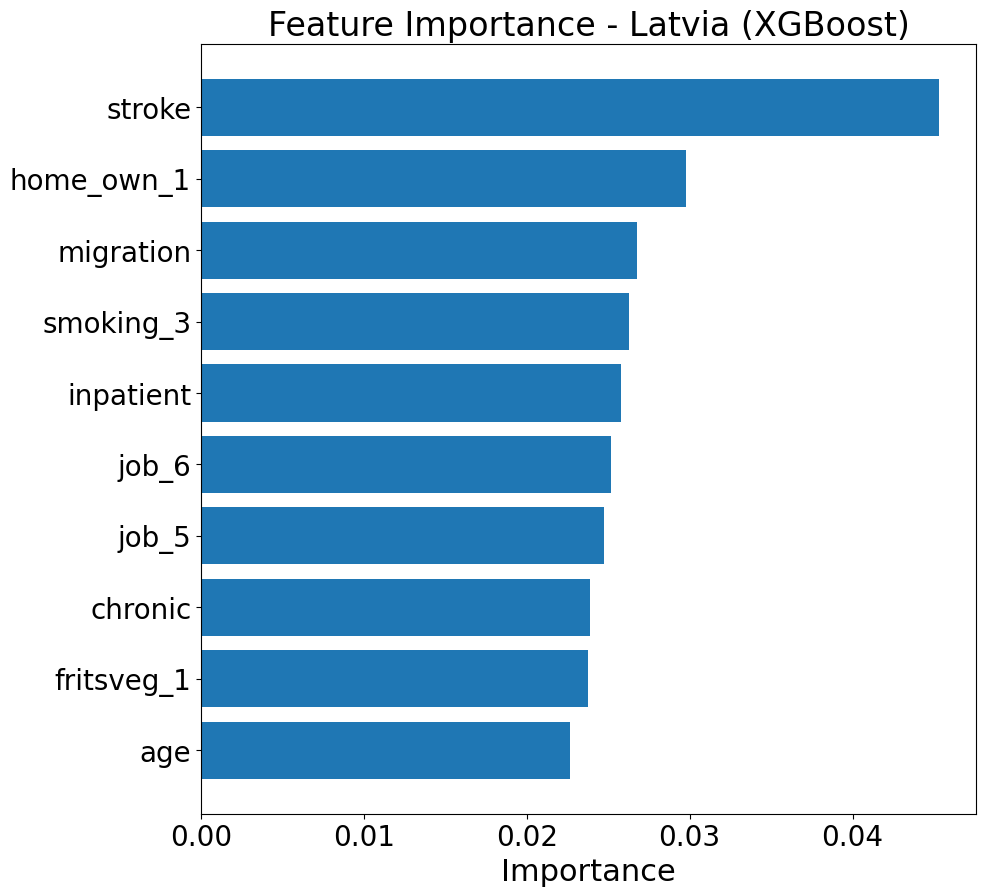

Training Gradient Boosting for Latvia...
Feature importance table saved as: mammogram_feature_importance_Latvia_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Latvia_Gradient Boosting.png


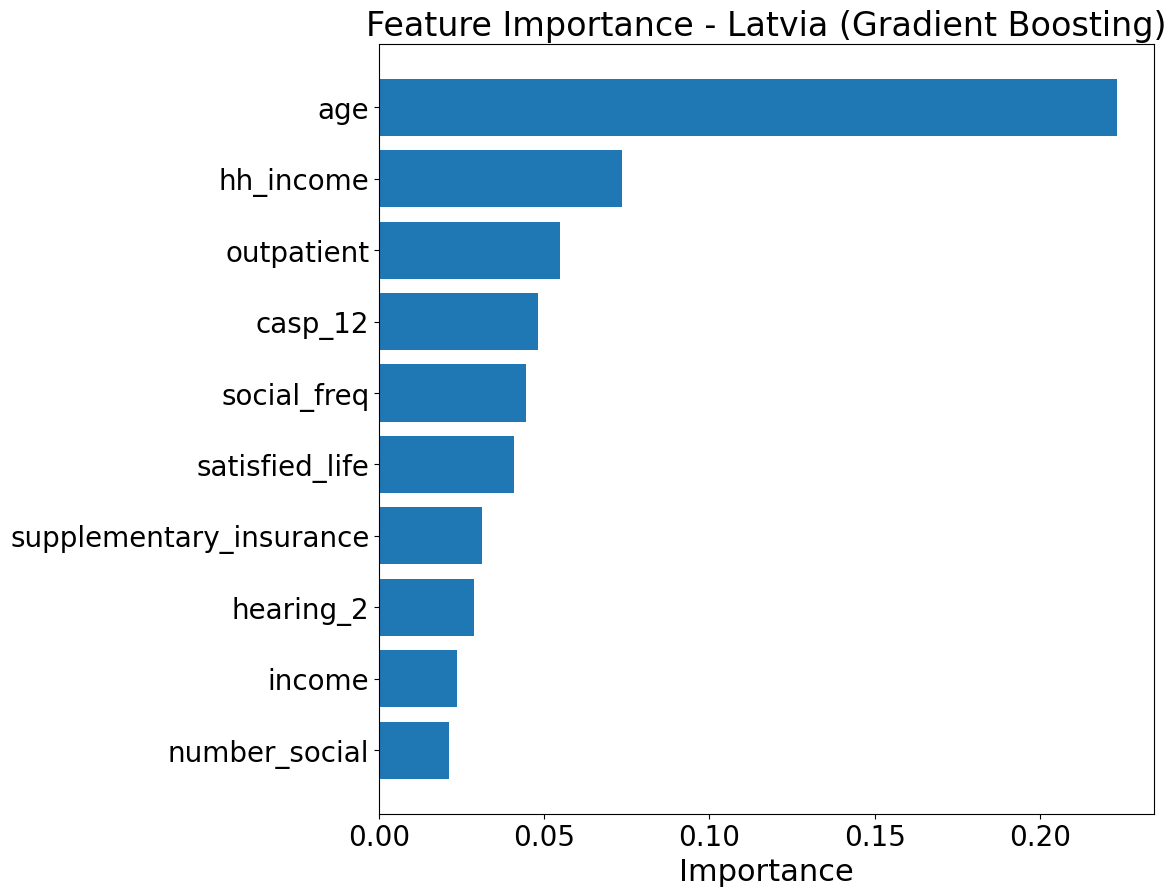

Training LightGBM for Latvia...
Feature importance table saved as: mammogram_feature_importance_Latvia_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Latvia_LightGBM.png


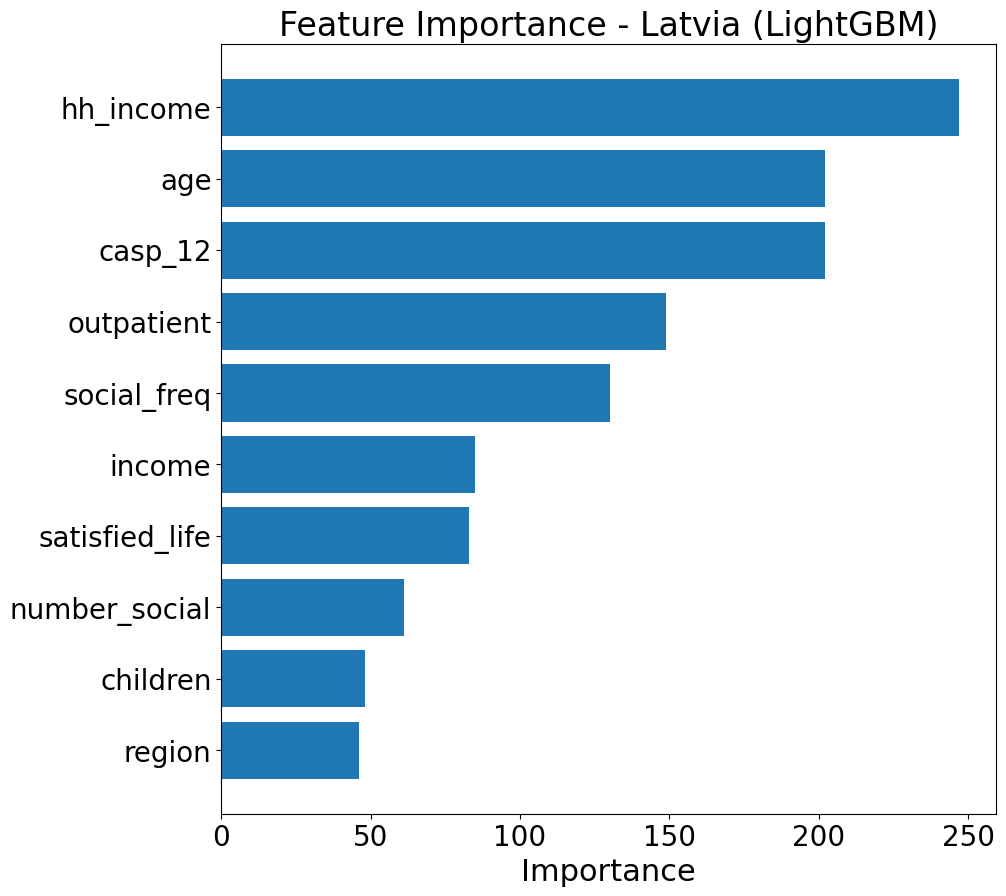

Processing Lithuania...
Training Random Forest for Lithuania...
Feature importance table saved as: mammogram_feature_importance_Lithuania_Random Forest.csv
Feature importance plot saved as: mammogram_feature_importance_Lithuania_Random Forest.png


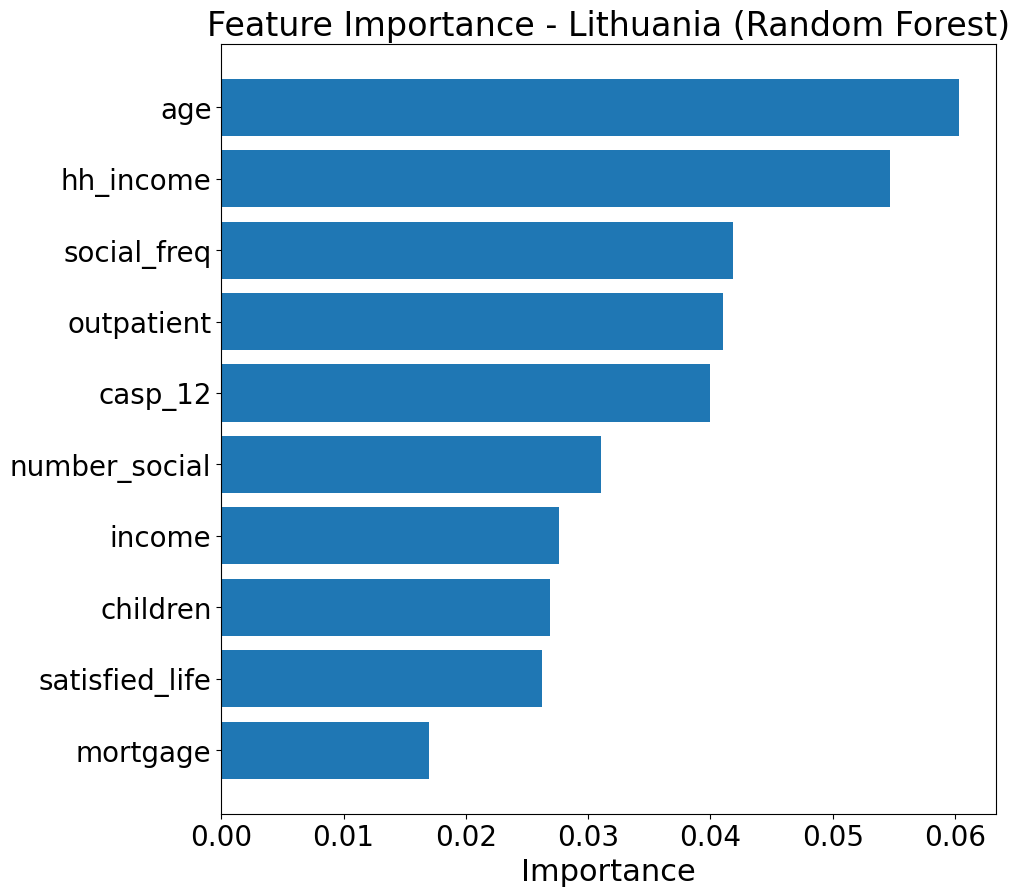

Training XGBoost for Lithuania...
Feature importance table saved as: mammogram_feature_importance_Lithuania_XGBoost.csv
Feature importance plot saved as: mammogram_feature_importance_Lithuania_XGBoost.png


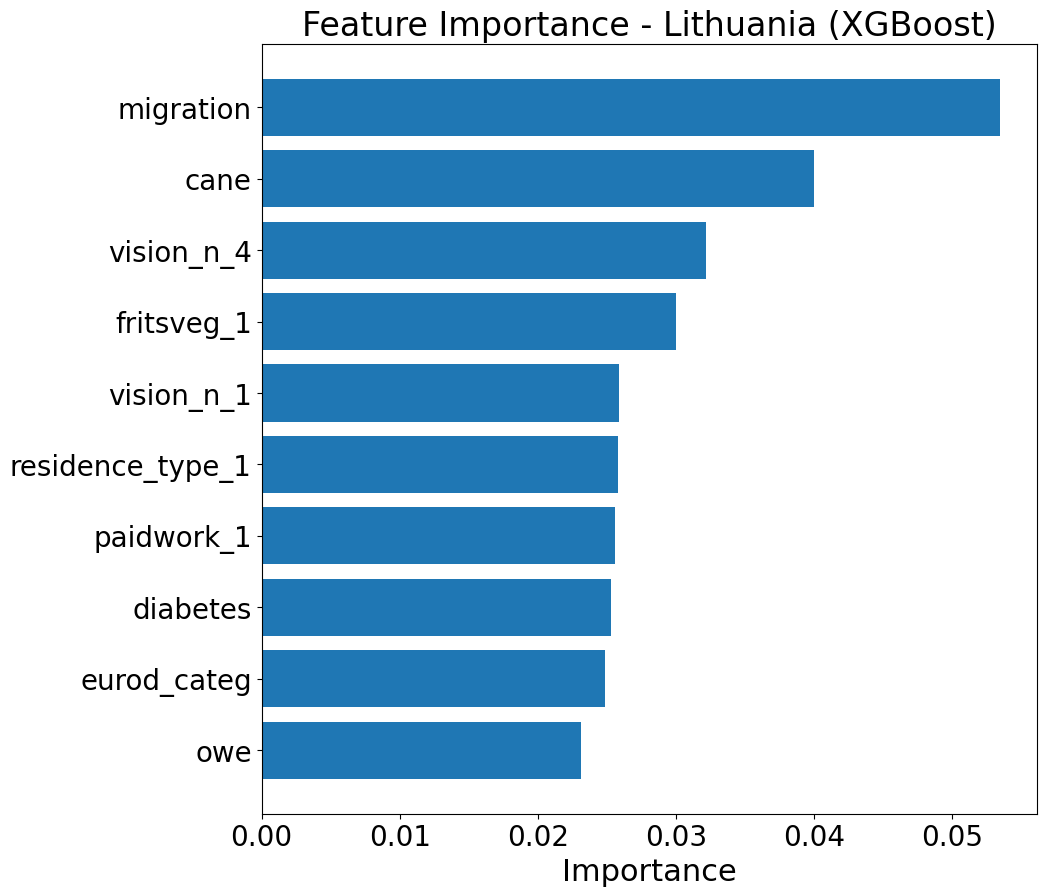

Training Gradient Boosting for Lithuania...
Feature importance table saved as: mammogram_feature_importance_Lithuania_Gradient Boosting.csv
Feature importance plot saved as: mammogram_feature_importance_Lithuania_Gradient Boosting.png


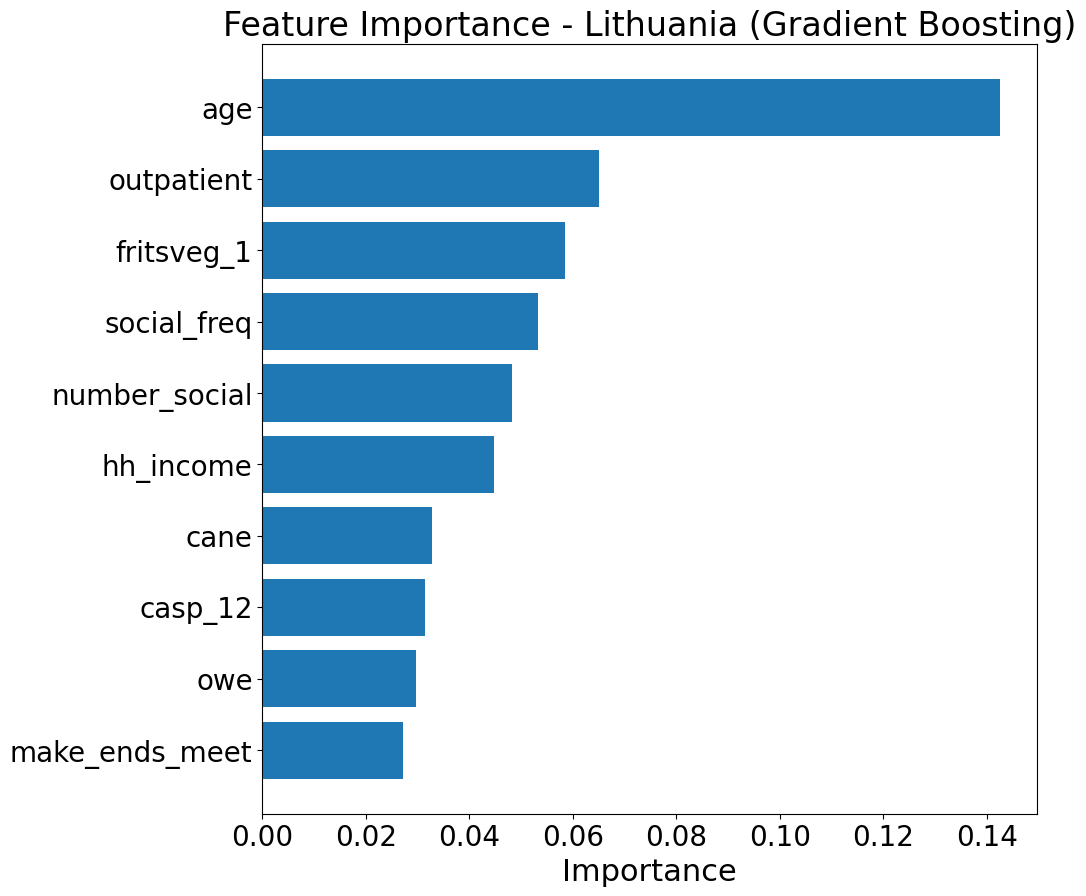

Training LightGBM for Lithuania...
Feature importance table saved as: mammogram_feature_importance_Lithuania_LightGBM.csv
Feature importance plot saved as: mammogram_feature_importance_Lithuania_LightGBM.png


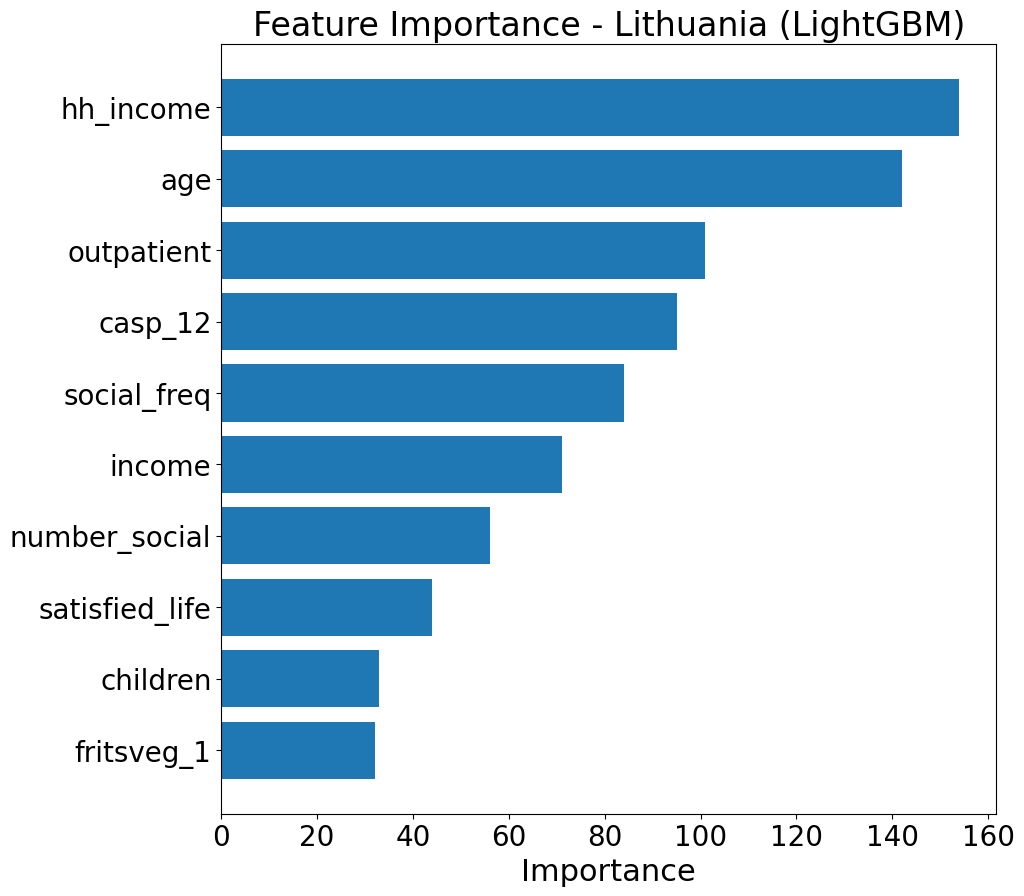

In [26]:
def plot_feature_importance(model, model_name, feature_names, country, target_var):
    # 檢查模型是否有 feature_importances_
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        print(f'{model_name} for {country} does not have feature_importances_ attribute')
        return

    # 建立 feature importance 的 DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # 取前 10 個重要特徵
    importance_df = importance_df.head(10)

    # 保存表格
    csv_filename = f'mammogram_feature_importance_{country}_{model_name}.csv'
    importance_df.to_csv(csv_filename, index=False)
    print(f"Feature importance table saved as: {csv_filename}")

    # 繪圖
    plt.figure(figsize=(10, 10))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance', fontsize=22)
    plt.title(f'Feature Importance - {country} ({model_name})', fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.gca().invert_yaxis()

    # 保存圖表
    img_filename = f'mammogram_feature_importance_{country}_{model_name}.png'
    plt.savefig(img_filename, pad_inches=0.1, bbox_inches='tight')
    print(f"Feature importance plot saved as: {img_filename}")
    plt.show()

    # 依照國家分別處理
for country, group_filter in country_groups.items():
    # 篩選每個國家的數據
    X_country = X[group_filter]
    y_country = y[group_filter]

    # 確保該國家有樣本
    if len(X_country) > 0:
        print(f"Processing {country}...")

        # 依照每個國家分別切割訓練集和測試集
        X_train, X_test, y_train, y_test = train_test_split(
            X_country, y_country, test_size=0.2, random_state=42, stratify=y_country
        )

        # 訓練每個國家的模型並繪製feature importance
        for model_name, model in models.items():
            print(f"Training {model_name} for {country}...")
            model.fit(X_train, y_train)
            plot_feature_importance(model, model_name, X_train.columns, country, target_var)